In [101]:
from tensorflow.keras.utils import normalize
import os
import cv2
from PIL import Image
import numpy as np
from matplotlib import pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.optimizers import Adam, AdamW
import glob

In [102]:
# image_directory = './data/choosed/img/'
# mask_directory = './data/choosed/mask/'
# test_directory = './data/0920_Unet_dataset/10_3_dent_more/0919dent_testing'
# test_directory2 = './data/0920_Unet_dataset/10_3_dent_more/0919dent_testing'

In [103]:

image_directory = './data/scratch_choosed/img'
mask_directory = './data/scratch_choosed/mask'
test_directory = './data/0920_Unet_dataset/09_07_scratch/testing'
test_directory2 = './data/0920_Unet_dataset/09_07_scratch/testing'

In [104]:
SIZE = 64
num_images = 40
img_width = 64
img_height = 64

## Load images and masks in order so they match

In [105]:
def resize_and_crop(image, target_width, target_height):
    h, w = image.shape[:2]
    
    # Calculate target aspect ratio and current aspect ratio
    target_aspect = target_width / target_height
    aspect = w / h
    
    # Resize image based on the aspect ratio differences
    if aspect > target_aspect:
        # Current image is wider than target, resize based on height
        new_h = target_height
        new_w = int(aspect * new_h)
        resized = cv2.resize(image, (new_w, new_h), interpolation=cv2.INTER_AREA)
        # Crop the width
        start_x = (new_w - target_width) // 2
        cropped = resized[:, start_x:start_x + target_width]
    else:
        # Current image is taller than target, resize based on width
        new_w = target_width
        new_h = int(new_w / aspect)
        resized = cv2.resize(image, (new_w, new_h), interpolation=cv2.INTER_AREA)
        # Crop the height
        start_y = (new_h - target_height) // 2
        cropped = resized[start_y:start_y + target_height, :]

    return cropped

In [106]:
def image_preprocessing(image_list, img_type, mask = False):
    processed_images = []
    display_count = 1
    for filename in image_list:
        if filename.endswith(img_type):  # Adjust the extension if needed
            img = cv2.imread(filename)
            if img is not None:
#                 processed_image = resize_and_crop(img, img_width, img_height)
                # Assuming you want to keep the images in grayscale
                processed_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
                if mask:
                    processed_image[processed_image != 0] = 255
#                     _, processed_image = cv2.threshold(processed_image, thresh=1, maxval=255, type=cv2.THRESH_BINARY)
#                 processed_image = np.tile(np.expand_dims(processed_image,axis=-1),(1,1,3))

                processed_images.append(processed_image)

                if display_count <= 3:
                    plt.figure(figsize=(16, 16))  # Adjust the figure size as needed
                    plt.subplot(2,5,display_count)
                    plt.imshow(processed_image, cmap='gray')  # Use cmap='gray' to display grayscale images
                    plt.title(f'Preprocessed Image {display_count+1}')
                    display_count += 1
    plt.show()
    return processed_images

In [107]:
defect_image_names = glob.glob(f"{image_directory}/*.png")
defect_image_names.sort()
print(defect_image_names)

['./data/scratch_choosed/img/NR02-P394-01-bv1.png_img_patch_1536_3008.png', './data/scratch_choosed/img/NR02-P394-01-bv1.png_img_patch_1600_3008.png', './data/scratch_choosed/img/NR02-P394-01-bv1.png_img_patch_1664_3008.png', './data/scratch_choosed/img/NR02-P394-01-bv1.png_img_patch_1728_3008.png', './data/scratch_choosed/img/NR02-P394-01-bv1.png_img_patch_2240_2176.png', './data/scratch_choosed/img/NR02-P394-01-bv1.png_img_patch_2304_2176.png', './data/scratch_choosed/img/NR02-P394-03-bv1.png_img_patch_1344_2304.png', './data/scratch_choosed/img/NR02-P394-03-bv1.png_img_patch_2240_2240.png', './data/scratch_choosed/img/NR02-P394-04-bv1.png_img_patch_1984_2304.png', './data/scratch_choosed/img/NR02-P394-04-bv1.png_img_patch_2048_2368.png', './data/scratch_choosed/img/NR02-P394-04-bv1.png_img_patch_2048_3008.png', './data/scratch_choosed/img/NR02-P394-04-bv1.png_img_patch_2048_3072.png', './data/scratch_choosed/img/NR02-P394-04-bv1.png_img_patch_2112_3392.png', './data/scratch_choosed/

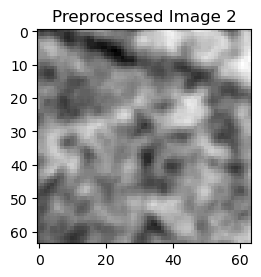

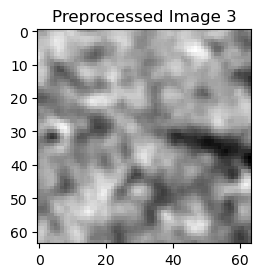

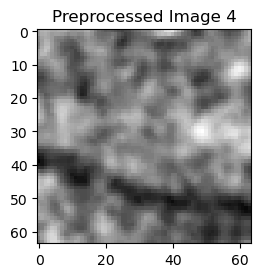

In [108]:
defect_images = image_preprocessing(defect_image_names, 'png')

In [109]:
defect_image_dataset = np.array(defect_images)
defect_image_dataset = np.expand_dims(defect_image_dataset, axis=3)
print(defect_image_dataset.shape)

(127, 64, 64, 1)


In [110]:
mask_image_names = glob.glob(f"{mask_directory}/*.png")
mask_image_names.sort()
print(mask_image_names)

['./data/scratch_choosed/mask/NR02-P394-01-bv1.png_binary_patch_1536_3008.png', './data/scratch_choosed/mask/NR02-P394-01-bv1.png_binary_patch_1600_3008.png', './data/scratch_choosed/mask/NR02-P394-01-bv1.png_binary_patch_1664_3008.png', './data/scratch_choosed/mask/NR02-P394-01-bv1.png_binary_patch_1728_3008.png', './data/scratch_choosed/mask/NR02-P394-01-bv1.png_binary_patch_2240_2176.png', './data/scratch_choosed/mask/NR02-P394-01-bv1.png_binary_patch_2304_2176.png', './data/scratch_choosed/mask/NR02-P394-03-bv1.png_binary_patch_1344_2304.png', './data/scratch_choosed/mask/NR02-P394-03-bv1.png_binary_patch_2240_2240.png', './data/scratch_choosed/mask/NR02-P394-04-bv1.png_binary_patch_1984_2304.png', './data/scratch_choosed/mask/NR02-P394-04-bv1.png_binary_patch_2048_2368.png', './data/scratch_choosed/mask/NR02-P394-04-bv1.png_binary_patch_2048_3008.png', './data/scratch_choosed/mask/NR02-P394-04-bv1.png_binary_patch_2048_3072.png', './data/scratch_choosed/mask/NR02-P394-04-bv1.png_b

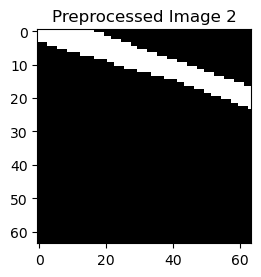

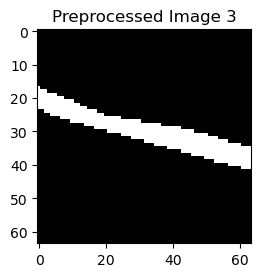

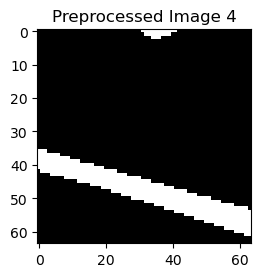

In [111]:
masked_images = image_preprocessing(mask_image_names, 'png', mask = True)

In [112]:
# _, binary_mask = cv2.threshold(masked_images[0], thresh=1, maxval=255, type=cv2.THRESH_BINARY)
# print(binary_mask)

In [113]:
# plt.imshow(binary_mask, cmap='gray')  # Use cm

In [114]:
masked_images_dataset = np.array(masked_images)
masked_images_dataset = np.expand_dims(masked_images_dataset, axis=3)
print(masked_images_dataset.shape)

(127, 64, 64, 1)


## Read masks the same way. 

In [115]:
print("Image data shape is: ", defect_image_dataset.shape)
print("Mask data shape is: ", masked_images_dataset.shape)
print("Max pixel value in image is: ", defect_image_dataset.max())
print("Labels in the mask are : ", np.unique(masked_images_dataset))

Image data shape is:  (127, 64, 64, 1)
Mask data shape is:  (127, 64, 64, 1)
Max pixel value in image is:  234
Labels in the mask are :  [  0 255]


In [116]:
#scaler = MinMaxScaler()

In [117]:
#test_image_data=scaler.fit_transform(tst_tst_image_dataset_uint8.reshape(-1, image_dataset_uint8.shape[-1])).reshape(image_dataset_uint8.shape)

In [118]:
#Normalize images
image_dataset = defect_image_dataset /255.  #Can also normalize or scale using MinMax scaler
#Do not normalize masks, just rescale to 0 to 1.
mask_dataset = masked_images_dataset /255.  #PIxel values will be 0 or 1

print("Image dataset range:", image_dataset.min(), image_dataset.max())
print("Labels in the mask are : ", np.unique(mask_dataset))

Image dataset range: 0.1411764705882353 0.9176470588235294
Labels in the mask are :  [0. 1.]


In [119]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(image_dataset, mask_dataset, test_size = 0.2, random_state = 30, shuffle=True)
print(X_test.shape)

(26, 64, 64, 1)


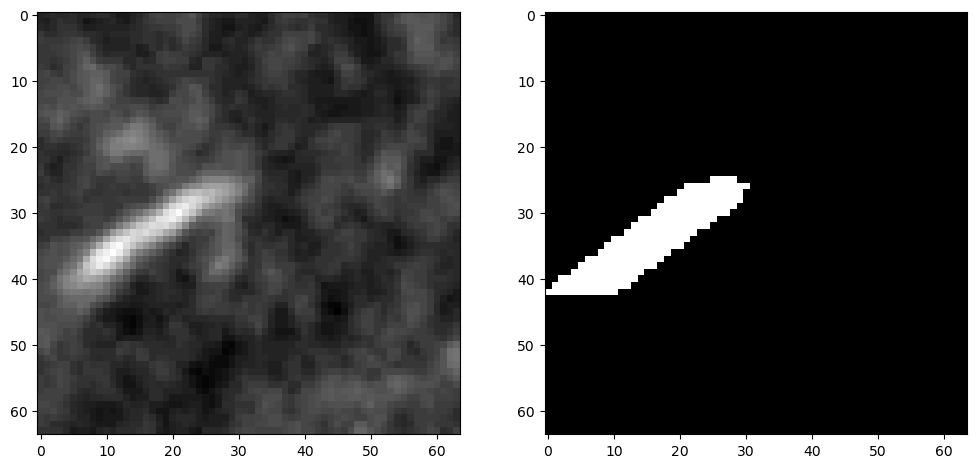

In [120]:
#Sanity check, view few mages
import random

image_number = random.randint(0, len(X_train)-1)
plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.imshow(X_train[image_number,:,:,0], cmap='gray')
plt.subplot(122)
plt.imshow(y_train[image_number,:,:,0], cmap='gray')
plt.show()

In [121]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

def binarize_mask(mask):
    _, binary_mask = cv2.threshold(mask, thresh=0.5, maxval=1, type=cv2.THRESH_BINARY)
    binary_mask = binary_mask.reshape(mask.shape)  # 保持原始形状
    return binary_mask
def adjust_brightness(image, brightness_factor):
    return np.clip(image * brightness_factor, 0, 1)  # 确保图像值仍然在 0~1 范围内

data_gen_args = dict(rotation_range=90.,
                     width_shift_range=0.1,
                     height_shift_range=0.1,
                     shear_range=0.5,
                     zoom_range=0.2,
                     horizontal_flip=True,
                     vertical_flip=True,
                     fill_mode='reflect')

image_datagen = ImageDataGenerator(**data_gen_args)#,  rescale=1./255)
mask_datagen = ImageDataGenerator(**data_gen_args, preprocessing_function=binarize_mask)

# 使用相同的种子和批量大小来生成图像和掩码
seed = 1
image_datagen.fit(X_train, augment=True, seed=seed)
mask_datagen.fit(y_train, augment=True, seed=seed)

image_generator = image_datagen.flow(X_train, batch_size=4, seed=seed)
mask_generator = mask_datagen.flow(y_train, batch_size=4, seed=seed)
def combine_generators(image_gen, mask_gen, brightness_factor_range=(0.8, 1.2)):
    while True:
        x = next(image_gen)
        y = next(mask_gen)
        # 随机生成亮度调整因子
        brightness_factor = np.random.uniform(brightness_factor_range[0], brightness_factor_range[1])

        # 对图像批次应用亮度调整
        x = np.array([adjust_brightness(img, brightness_factor) for img in x])

        # 返回亮度调整后的图像和同步的 mask batch
        yield x, y
        
        # yield x, y
print("Labels in the mask are : ", np.unique(y_train))
train_generator = combine_generators(image_generator, mask_generator)


Labels in the mask are :  [0. 1.]


Labels in the mask are :  [0. 1.]
img unique values:  [0.42830437 0.42856494 0.43018627 ... 0.86503536 0.8663442  0.86719805]


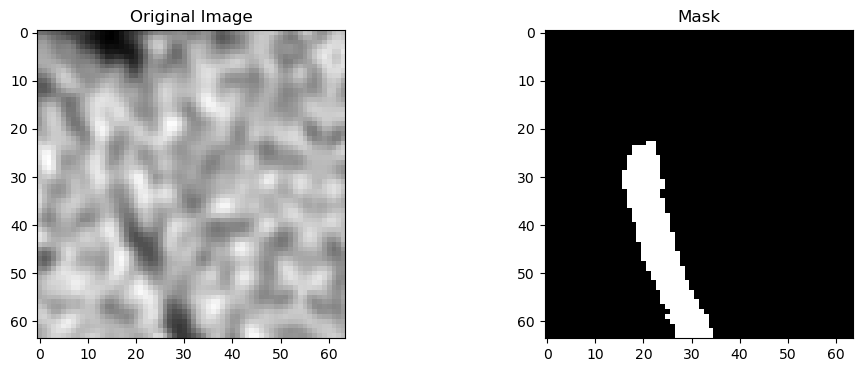

Labels in the mask are :  [0. 1.]
img unique values:  [0.4796951  0.48268148 0.488119   ... 0.8833073  0.8915072  0.8952556 ]


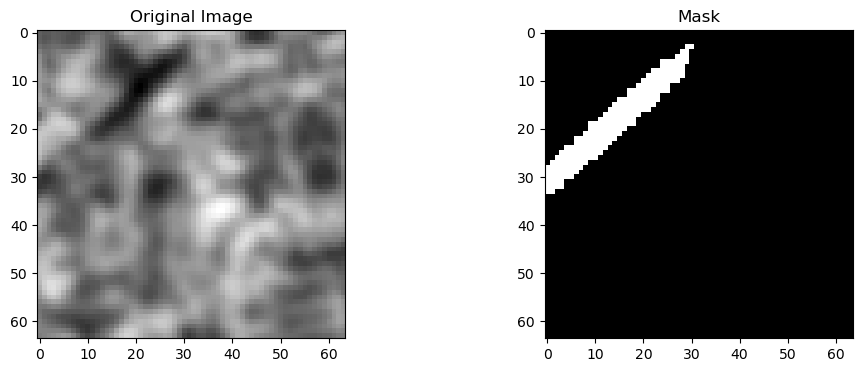

Labels in the mask are :  [0. 1.]
img unique values:  [0.49697596 0.49725366 0.5067479  ... 0.9996729  0.9998364  1.        ]


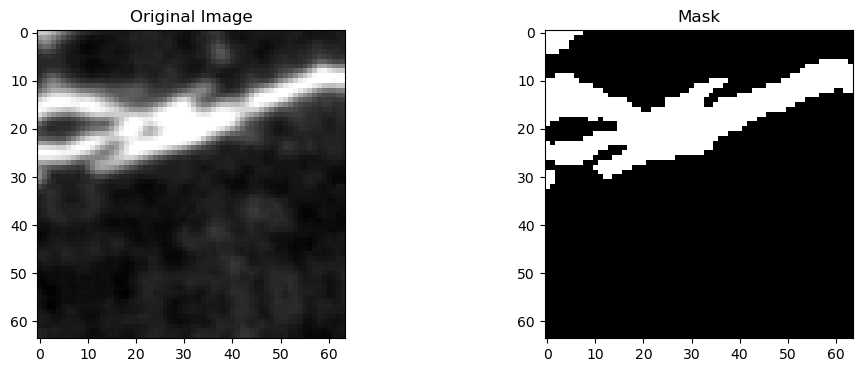

In [122]:
for i in range(3):
    img, msk = next(train_generator)
    print("Labels in the mask are : ", np.unique(msk))
    print("img unique values: ", np.unique(img))
    # 可视化第一张图像和掩码
    plt.figure(figsize=(12, 4))

    # 显示原始图像
    plt.subplot(1, 2, 1)
    plt.title('Original Image')
    plt.imshow(img[0].squeeze(), cmap='gray')

    # 显示真实掩码
    plt.subplot(1, 2, 2)
    plt.title('Mask')
    plt.imshow(msk[0].squeeze(), cmap='gray')

    plt.show()


In [123]:
# Building Unet by dividing encoder and decoder into blocks

from keras.models import Model
from keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, concatenate, Conv2DTranspose, BatchNormalization, Dropout, Lambda, Add, Multiply
from keras.optimizers import Adam
from keras.layers import Activation, MaxPool2D, Concatenate


def conv_block(input, num_filters):
    x = Conv2D(num_filters, 3, padding="same")(input)
    x = BatchNormalization()(x)   #Not in the original network. 
    x = Activation("relu")(x)

    x = Conv2D(num_filters, 3, padding="same")(x)
    x = BatchNormalization()(x)  #Not in the original network
    x = Activation("relu")(x)

    return x

#Encoder block: Conv block followed by maxpooling


def encoder_block(input, num_filters):
    x = conv_block(input, num_filters)
    p = MaxPool2D((2, 2))(x)
    return x, p   

#Decoder block
#skip features gets input from encoder for concatenation

def decoder_block(input, skip_features, num_filters):
    x = Conv2D
    Conv2DTranspose(num_filters, (2, 2), strides=2, padding="same")(input)
    x = Concatenate()([x, skip_features])
    x = conv_block(x, num_filters)
    return x

#Build Unet using the blocks
def build_unet(input_shape, n_classes):
    inputs = Input(input_shape)

    s1, p1 = encoder_block(inputs, 64)
    s2, p2 = encoder_block(p1, 128)
    s3, p3 = encoder_block(p2, 256)
    s4, p4 = encoder_block(p3, 512)
    

    b1 = conv_block(p4, 1024) #Bridge

    d1 = decoder_block(b1, s4, 512)
    d2 = decoder_block(d1, s3, 256)
    d3 = decoder_block(d2, s2, 128)
    d4 = decoder_block(d3, s1, 64)

    if n_classes == 1:  #Binary
        activation = 'sigmoid'
    else:
        activation = 'softmax'

    outputs = Conv2D(n_classes, 1, padding="same", activation=activation)(d4)  #Change the activation based on n_classes
    print(activation)

    model = Model(inputs, outputs, name="U-Net")
    return model

### Trying Attention Unet

In [124]:
def attention_gate(f_g, f_l, inter_channels):
    # Gating signal processing
    g = Conv2D(inter_channels, (1, 1), padding='same', activation='relu')(f_g)
    # Skip connection processing
    x = Conv2D(inter_channels, (1, 1), padding='same', activation='relu')(f_l)
    # Combining the gating and skip connection
    combined = Add()([g, x])
    combined = Activation('relu')(combined)
    # Output attention coefficients
    psi = Conv2D(1, (1, 1), padding='same', activation='sigmoid')(combined)
    # Applying attention coefficients
    return Multiply()([f_l, psi])

In [125]:
def conv_block(input, num_filters):
    x = Conv2D(num_filters, 3, padding="same")(input)
    x = BatchNormalization()(x)   #Not in the original network. 
    x = Activation("relu")(x)

    x = Conv2D(num_filters, 3, padding="same")(x)
    x = BatchNormalization()(x)  #Not in the original network
    x = Activation("relu")(x)

    return x

def encoder_block(input, num_filters):
    x = conv_block(input, num_filters)
    p = MaxPool2D((2, 2))(x)
    return x, p   

def decoder_block(input, skip_features, num_filters):
    x = Conv2DTranspose(num_filters, (2, 2), strides=2, padding="same")(input)
    # replace Conv2DTranspose with UpSampling2D and Conv2D
    # x = UpSampling2D(size=(2, 2))(input)
    # x = Conv2D(num_filters, 2, padding="same")(x)
    
    # Apply attention gate on skip connection features
    attention_features = attention_gate(x, skip_features, num_filters)
    x = Concatenate()([x, attention_features])
    x = conv_block(x, num_filters)
    return x

In [126]:
def build_attention_unet(input_shape, n_classes):
    inputs = Input(input_shape)

    # Encoder
    s1, p1 = encoder_block(inputs, 16)
    s2, p2 = encoder_block(p1, 32)
    s3, p3 = encoder_block(p2, 64)
    s4, p4 = encoder_block(p3, 128)
    # s5, p5 = encoder_block(p4, 256)

    # Bridge
    b1 = conv_block(p4, 256)

    # Decoder with 
    # d5 = decoder_block(b1, s5, 256)
    d1 = decoder_block(b1, s4, 128)
    d2 = decoder_block(d1, s3, 64)
    d3 = decoder_block(d2, s2, 32)
    d4 = decoder_block(d3, s1, 16)

    if n_classes == 1:  # Binary segmentation
        activation = 'sigmoid'
    else:
        activation = 'softmax'

    outputs = Conv2D(n_classes, 1, padding="same", activation=activation)(d4)
    model = Model(inputs, outputs, name="Attention_U-Net")
    return model


In [127]:
IMG_HEIGHT = image_dataset.shape[1]
IMG_WIDTH  = image_dataset.shape[2]
IMG_CHANNELS = image_dataset.shape[3]

input_shape = (IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS)

In [128]:
import tensorflow as tf
def weighted_binary_crossentropy(y_true, y_pred):
    epsilon = 1e-7
    y_pred = tf.clip_by_value(y_pred, epsilon, 1 - epsilon)
    y_true = tf.cast(y_true, tf.float32)
    weights = tf.where(tf.equal(y_true, 1), 10., 1.)
    bce = - (y_true * tf.math.log(y_pred) + (1 - y_true) * tf.math.log(1 - y_pred))
    weighted_bce = tf.reduce_mean(bce * weights)
    return weighted_bce


In [129]:
def dice_loss(y_true, y_pred):
    epsilon = 1e-7
    y_pred = tf.clip_by_value(y_pred, epsilon, 1 - epsilon)
    intersection = tf.reduce_sum(y_true * y_pred)
    dice_coeff = (2 * intersection + epsilon) / (tf.reduce_sum(y_true) + tf.reduce_sum(y_pred) + epsilon)
    return 1 - dice_coeff


In [130]:
# model = build_unet(input_shape, n_classes=1)
model = build_attention_unet(input_shape, n_classes=1)
# model.compile(optimizer=Adam(learning_rate = 1e-4), loss=weighted_binary_crossentropy, metrics=['accuracy'])
model.compile(optimizer=Adam(learning_rate = 1e-4), loss=dice_loss, metrics=['accuracy'])
model.summary()

Model: "Attention_U-Net"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_3 (InputLayer)        [(None, 64, 64, 1)]          0         []                            
                                                                                                  
 conv2d_62 (Conv2D)          (None, 64, 64, 16)           160       ['input_3[0][0]']             
                                                                                                  
 batch_normalization_32 (Ba  (None, 64, 64, 16)           64        ['conv2d_62[0][0]']           
 tchNormalization)                                                                                
                                                                                                  
 activation_39 (Activation)  (None, 64, 64, 16)           0         ['batch_normaliz

In [131]:
import matplotlib.pyplot as plt
from keras.callbacks import Callback

class VisualizationCallback(Callback):
    def __init__(self, X_train, y_train, num_samples=2):
        self.X_train = X_train
        self.y_train = y_train
        self.num_samples = num_samples

    def on_epoch_end(self, epoch, logs=None):
        predictions = self.model.predict(self.X_train[:self.num_samples])
        y_pred_thresholded = (predictions > 0.5).astype(np.uint8)

        for i in range(self.num_samples):
            if epoch%10==0:
                plt.figure(figsize=(12, 4))

                # 显示原始图像
                plt.subplot(1, 3, 1)
                plt.title('Original Image')
                plt.imshow(self.X_train[i].squeeze(), cmap='gray')

                # 显示真实掩码
                plt.subplot(1, 3, 2)
                plt.title('Ground Truth')
                plt.imshow(self.y_train[i].squeeze(), cmap='gray')

                # 显示预测的二值化图像
                plt.subplot(1, 3, 3)
                plt.title('Predicted Binary Image')
                plt.imshow(y_pred_thresholded[i].squeeze(), cmap='gray')

                plt.show()

In [132]:
class IoUCallback(Callback):
    def __init__(self, X_test, y_test, threshold=0.5):
        super().__init__()
        self.X_test = X_test
        self.y_test = y_test
        self.threshold = threshold
    
    def calculate_iou(self, pred_mask, true_mask):
        intersection = np.logical_and(pred_mask, true_mask).sum()
        union = np.logical_or(pred_mask, true_mask).sum()
        iou = intersection / union if union != 0 else 0
        return iou
    
    def on_epoch_end(self, epoch, logs=None):
        pred_masks = self.model.predict(self.X_test)
        pred_masks = (pred_masks > self.threshold).astype(np.uint8)
        
        ious = []
        for pred_mask, true_mask in zip(pred_masks, self.y_test):
            iou = self.calculate_iou(pred_mask, true_mask)
            ious.append(iou)
        
        mean_iou = np.mean(ious)
        print(f"Epoch {epoch+1}: Mean IoU on validation data = {mean_iou:.4f}")
        logs['val_iou'] = mean_iou  # Optionally log it for history


Epoch 1/1000
1/1 [==============================] - 0s 384ms/steposs: 0.8115 - accuracy: 0.43


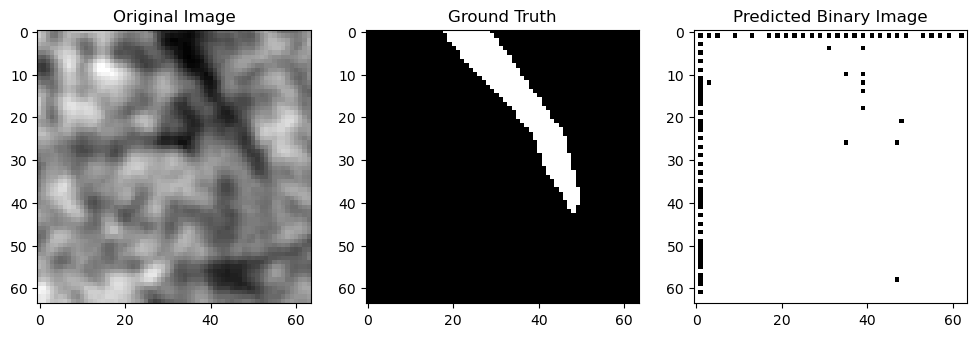

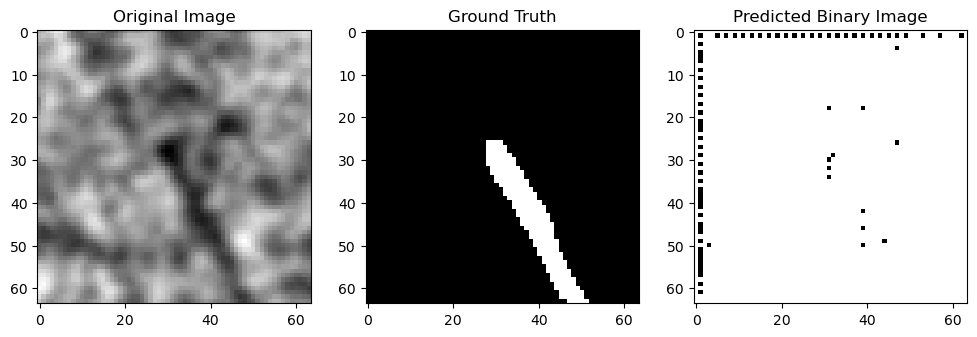

1/1 [==============================] - 0s 10ms/step
Epoch 1: Mean IoU on validation data = 0.0908
25/25 [==============================] - 5s 58ms/step - loss: 0.8100 - accuracy: 0.4366 - val_loss: 0.8477 - val_accuracy: 0.1187 - lr: 1.0000e-04 - val_iou: 0.0908
Epoch 2/1000
1/1 [==============================] - 0s 9ms/step
Epoch 2: Mean IoU on validation data = 0.0792
25/25 [==============================] - 0s 7ms/step - loss: 0.7900 - accuracy: 0.5011 - val_loss: 0.8480 - val_accuracy: 0.5520 - lr: 1.0000e-04 - val_iou: 0.0792
Epoch 3/1000
1/1 [==============================] - 0s 9ms/step
Epoch 3: Mean IoU on validation data = 0.0464
25/25 [==============================] - 0s 7ms/step - loss: 0.7622 - accuracy: 0.5934 - val_loss: 0.8488 - val_accuracy: 0.8677 - lr: 1.0000e-04 - val_iou: 0.0464
Epoch 4/1000
1/1 [==============================] - 0s 9ms/step
Epoch 4: Mean IoU on validation data = 0.0000
25/25 [==============================] - 0s 7ms/step - loss: 0.7288 - accuracy:

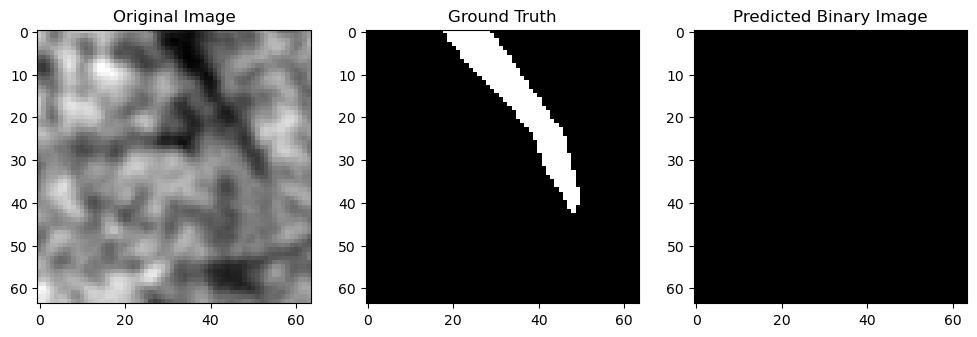

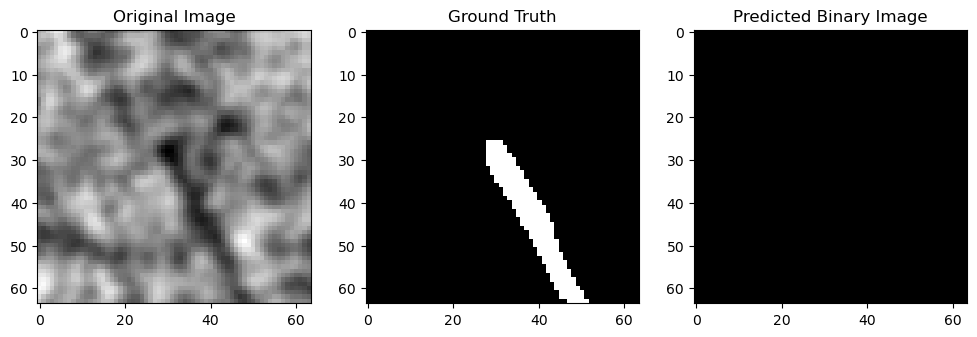

1/1 [==============================] - 0s 10ms/step
Epoch 11: Mean IoU on validation data = 0.0000
25/25 [==============================] - 0s 16ms/step - loss: 0.6432 - accuracy: 0.8023 - val_loss: 0.8815 - val_accuracy: 0.9103 - lr: 1.0000e-04 - val_iou: 0.0000e+00
Epoch 12/1000
1/1 [==============================] - 0s 9ms/step
Epoch 12: Mean IoU on validation data = 0.0000
25/25 [==============================] - 0s 7ms/step - loss: 0.6246 - accuracy: 0.8040 - val_loss: 0.8820 - val_accuracy: 0.9103 - lr: 1.0000e-04 - val_iou: 0.0000e+00
Epoch 13/1000
1/1 [==============================] - 0s 9ms/step
Epoch 13: Mean IoU on validation data = 0.0384
25/25 [==============================] - 0s 7ms/step - loss: 0.6395 - accuracy: 0.8108 - val_loss: 0.8575 - val_accuracy: 0.9114 - lr: 1.0000e-04 - val_iou: 0.0384
Epoch 14/1000
1/1 [==============================] - 0s 9ms/step
Epoch 14: Mean IoU on validation data = 0.0186
25/25 [==============================] - 0s 7ms/step - loss: 0.6

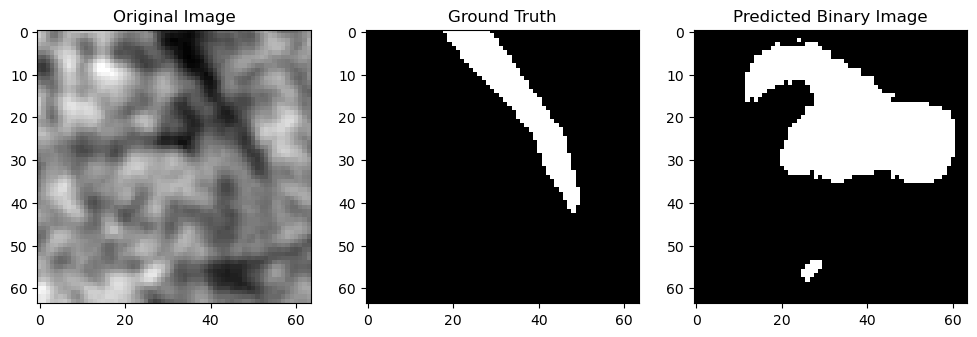

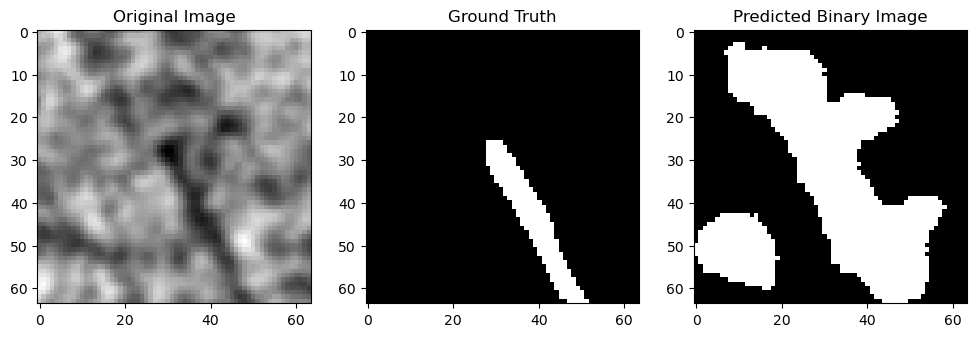

1/1 [==============================] - 0s 11ms/step
Epoch 21: Mean IoU on validation data = 0.3375
25/25 [==============================] - 1s 52ms/step - loss: 0.6198 - accuracy: 0.8494 - val_loss: 0.6381 - val_accuracy: 0.8745 - lr: 1.0000e-04 - val_iou: 0.3375
Epoch 22/1000
1/1 [==============================] - 0s 10ms/step
Epoch 22: Mean IoU on validation data = 0.3578
25/25 [==============================] - 0s 12ms/step - loss: 0.5939 - accuracy: 0.8585 - val_loss: 0.6161 - val_accuracy: 0.9048 - lr: 1.0000e-04 - val_iou: 0.3578
Epoch 23/1000
1/1 [==============================] - 0s 10ms/step
Epoch 23: Mean IoU on validation data = 0.3804
25/25 [==============================] - 0s 8ms/step - loss: 0.5883 - accuracy: 0.8565 - val_loss: 0.6175 - val_accuracy: 0.8831 - lr: 1.0000e-04 - val_iou: 0.3804
Epoch 24/1000
1/1 [==============================] - 0s 10ms/step
Epoch 24: Mean IoU on validation data = 0.3717
25/25 [==============================] - 0s 12ms/step - loss: 0.5992

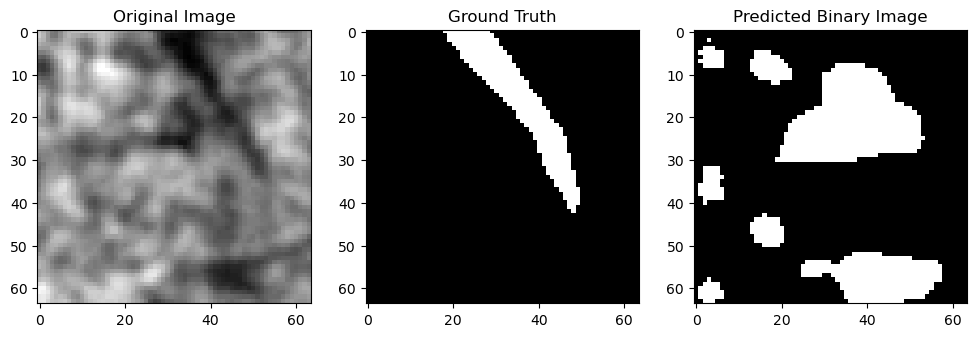

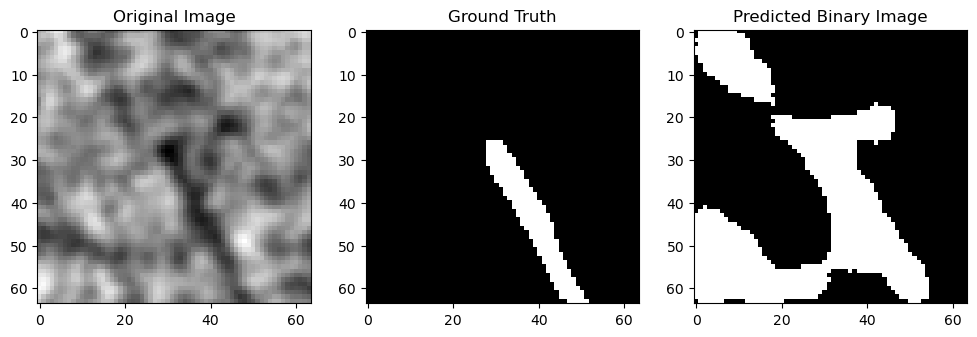

1/1 [==============================] - 0s 11ms/step
Epoch 31: Mean IoU on validation data = 0.3832
25/25 [==============================] - 0s 20ms/step - loss: 0.5620 - accuracy: 0.8834 - val_loss: 0.5795 - val_accuracy: 0.8792 - lr: 1.0000e-04 - val_iou: 0.3832
Epoch 32/1000
1/1 [==============================] - 0s 10ms/step
Epoch 32: Mean IoU on validation data = 0.4052
25/25 [==============================] - 0s 12ms/step - loss: 0.5557 - accuracy: 0.8884 - val_loss: 0.5531 - val_accuracy: 0.8963 - lr: 1.0000e-04 - val_iou: 0.4052
Epoch 33/1000
1/1 [==============================] - 0s 11ms/step
Epoch 33: Mean IoU on validation data = 0.4229
25/25 [==============================] - 0s 12ms/step - loss: 0.5415 - accuracy: 0.8931 - val_loss: 0.5485 - val_accuracy: 0.9072 - lr: 1.0000e-04 - val_iou: 0.4229
Epoch 34/1000
1/1 [==============================] - 0s 11ms/step
Epoch 34: Mean IoU on validation data = 0.4172
25/25 [==============================] - 0s 12ms/step - loss: 0.531

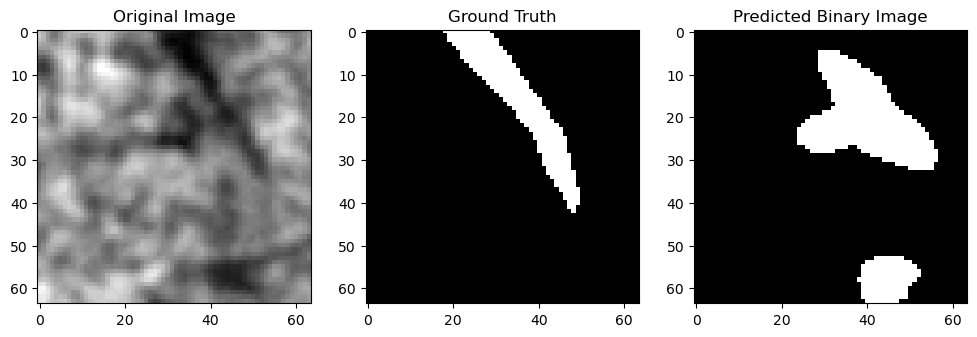

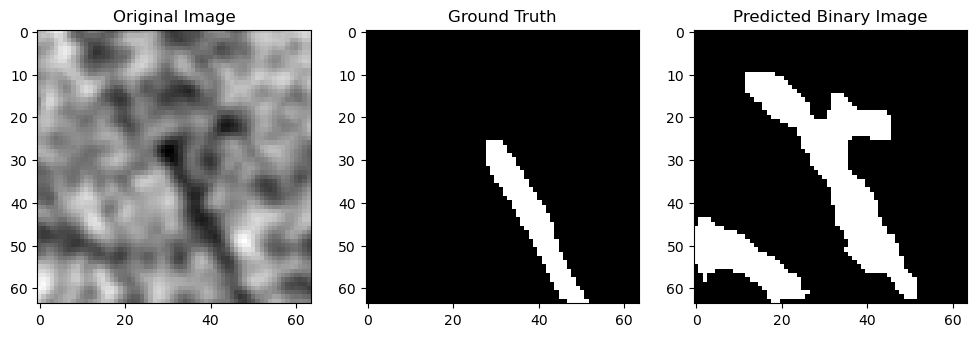

1/1 [==============================] - 0s 11ms/step
Epoch 41: Mean IoU on validation data = 0.4659
25/25 [==============================] - 0s 20ms/step - loss: 0.4882 - accuracy: 0.9086 - val_loss: 0.5066 - val_accuracy: 0.9260 - lr: 1.0000e-04 - val_iou: 0.4659
Epoch 42/1000
1/1 [==============================] - 0s 10ms/step
Epoch 42: Mean IoU on validation data = 0.4413
25/25 [==============================] - 0s 8ms/step - loss: 0.5218 - accuracy: 0.9072 - val_loss: 0.5238 - val_accuracy: 0.9160 - lr: 1.0000e-04 - val_iou: 0.4413
Epoch 43/1000
1/1 [==============================] - 0s 10ms/step
Epoch 43: Mean IoU on validation data = 0.4656
25/25 [==============================] - 0s 12ms/step - loss: 0.4885 - accuracy: 0.9145 - val_loss: 0.5027 - val_accuracy: 0.9288 - lr: 1.0000e-04 - val_iou: 0.4656
Epoch 44/1000
1/1 [==============================] - 0s 10ms/step
Epoch 44: Mean IoU on validation data = 0.4876
25/25 [==============================] - 0s 12ms/step - loss: 0.5178

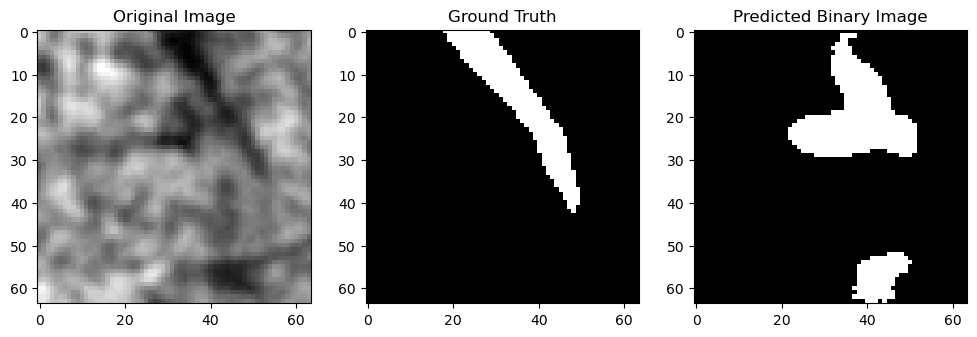

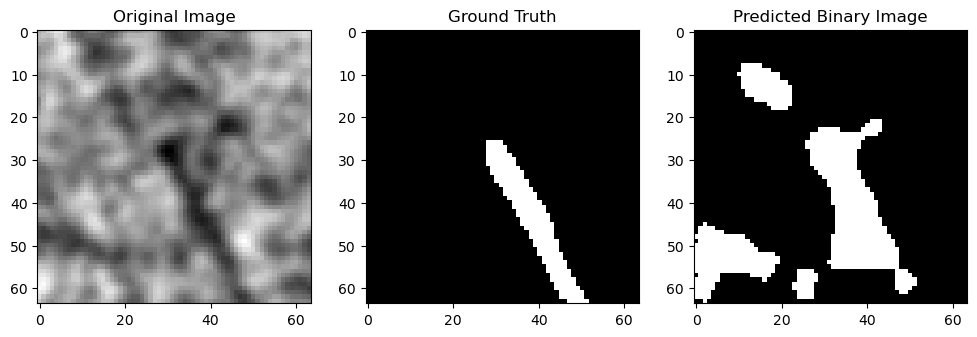

1/1 [==============================] - 0s 11ms/step
Epoch 51: Mean IoU on validation data = 0.4845
25/25 [==============================] - 0s 20ms/step - loss: 0.4905 - accuracy: 0.9078 - val_loss: 0.4703 - val_accuracy: 0.9266 - lr: 1.0000e-04 - val_iou: 0.4845
Epoch 52/1000
1/1 [==============================] - 0s 10ms/step
Epoch 52: Mean IoU on validation data = 0.4832
25/25 [==============================] - 0s 8ms/step - loss: 0.4455 - accuracy: 0.9291 - val_loss: 0.4757 - val_accuracy: 0.9222 - lr: 1.0000e-04 - val_iou: 0.4832
Epoch 53/1000
1/1 [==============================] - 0s 10ms/step
Epoch 53: Mean IoU on validation data = 0.5371
25/25 [==============================] - 0s 12ms/step - loss: 0.4622 - accuracy: 0.9251 - val_loss: 0.4455 - val_accuracy: 0.9430 - lr: 1.0000e-04 - val_iou: 0.5371
Epoch 54/1000
1/1 [==============================] - 0s 10ms/step
Epoch 54: Mean IoU on validation data = 0.4982
25/25 [==============================] - 0s 8ms/step - loss: 0.4515 

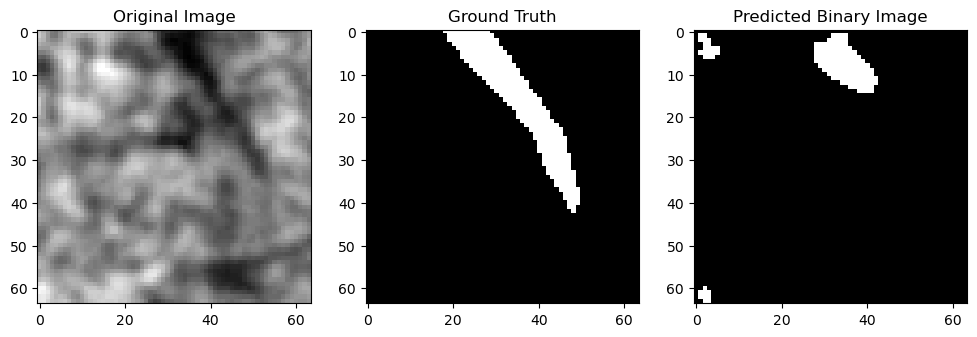

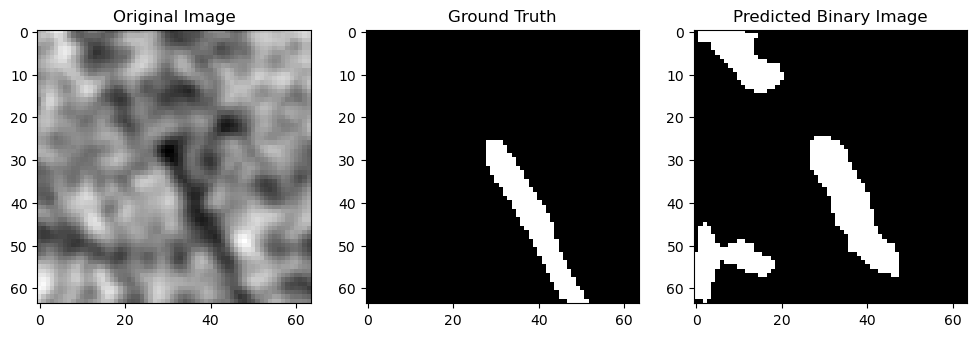

1/1 [==============================] - 0s 11ms/step
Epoch 61: Mean IoU on validation data = 0.4795
25/25 [==============================] - 0s 16ms/step - loss: 0.4323 - accuracy: 0.9295 - val_loss: 0.4561 - val_accuracy: 0.9225 - lr: 1.0000e-04 - val_iou: 0.4795
Epoch 62/1000
1/1 [==============================] - 0s 10ms/step
Epoch 62: Mean IoU on validation data = 0.5384
25/25 [==============================] - 0s 12ms/step - loss: 0.4574 - accuracy: 0.9205 - val_loss: 0.4226 - val_accuracy: 0.9448 - lr: 1.0000e-04 - val_iou: 0.5384
Epoch 63/1000
1/1 [==============================] - 0s 10ms/step
Epoch 63: Mean IoU on validation data = 0.5012
25/25 [==============================] - 0s 8ms/step - loss: 0.4246 - accuracy: 0.9305 - val_loss: 0.4392 - val_accuracy: 0.9336 - lr: 1.0000e-04 - val_iou: 0.5012
Epoch 64/1000
1/1 [==============================] - 0s 10ms/step
Epoch 64: Mean IoU on validation data = 0.5582
25/25 [==============================] - 0s 12ms/step - loss: 0.4422

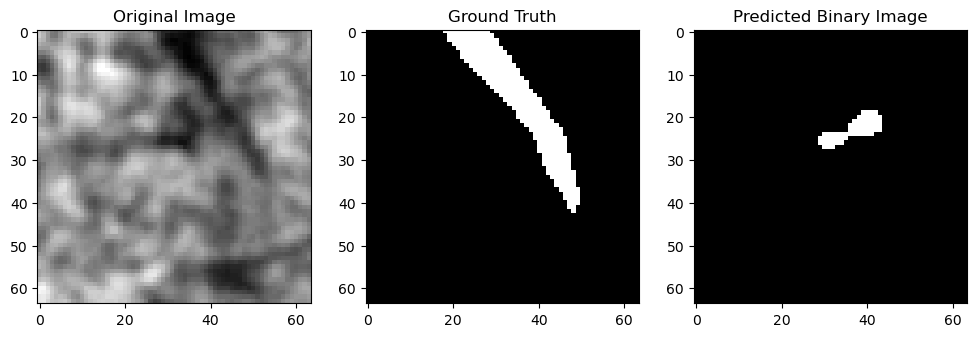

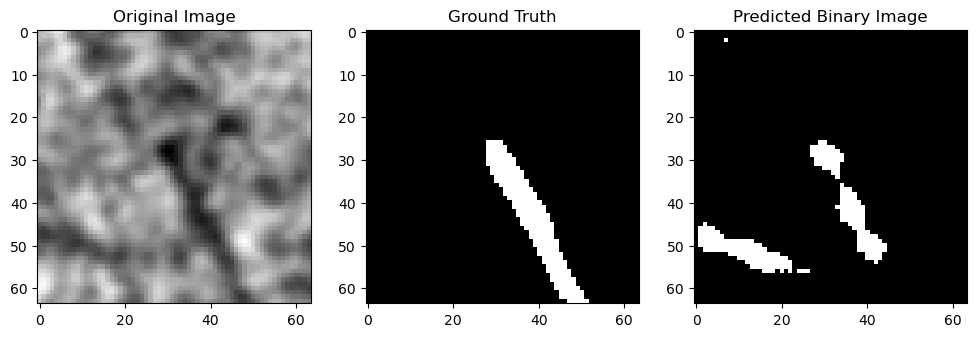

1/1 [==============================] - 0s 11ms/step
Epoch 71: Mean IoU on validation data = 0.4595
25/25 [==============================] - 0s 16ms/step - loss: 0.4143 - accuracy: 0.9328 - val_loss: 0.4543 - val_accuracy: 0.9332 - lr: 1.0000e-04 - val_iou: 0.4595
Epoch 72/1000
1/1 [==============================] - 0s 10ms/step
Epoch 72: Mean IoU on validation data = 0.5095
25/25 [==============================] - 0s 12ms/step - loss: 0.3988 - accuracy: 0.9343 - val_loss: 0.4079 - val_accuracy: 0.9371 - lr: 1.0000e-04 - val_iou: 0.5095
Epoch 73/1000
1/1 [==============================] - 0s 10ms/step
Epoch 73: Mean IoU on validation data = 0.5353
25/25 [==============================] - 0s 12ms/step - loss: 0.4063 - accuracy: 0.9290 - val_loss: 0.3852 - val_accuracy: 0.9401 - lr: 1.0000e-04 - val_iou: 0.5353
Epoch 74/1000
1/1 [==============================] - 0s 10ms/step
Epoch 74: Mean IoU on validation data = 0.5011
25/25 [==============================] - 0s 8ms/step - loss: 0.3862

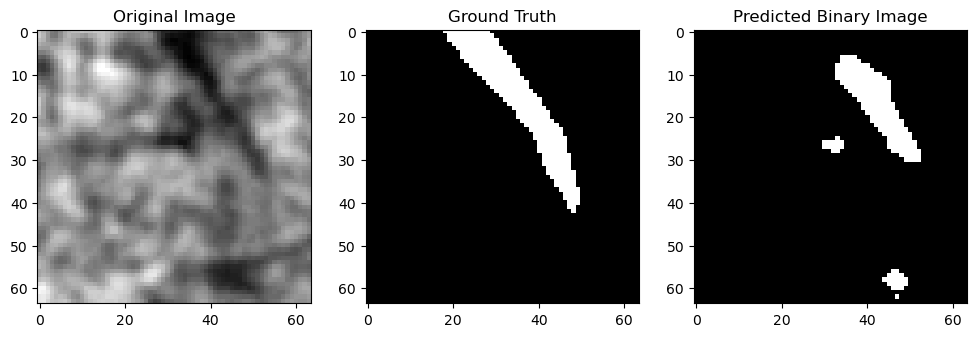

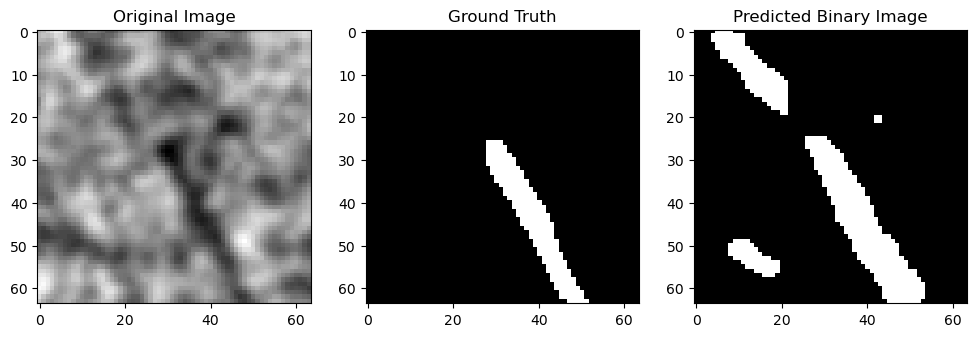

1/1 [==============================] - 0s 10ms/step
Epoch 81: Mean IoU on validation data = 0.5105
25/25 [==============================] - 0s 16ms/step - loss: 0.3722 - accuracy: 0.9370 - val_loss: 0.3981 - val_accuracy: 0.9401 - lr: 1.0000e-04 - val_iou: 0.5105
Epoch 82/1000
1/1 [==============================] - 0s 11ms/step
Epoch 82: Mean IoU on validation data = 0.5183
25/25 [==============================] - 0s 17ms/step - loss: 0.3642 - accuracy: 0.9401 - val_loss: 0.3962 - val_accuracy: 0.9358 - lr: 1.0000e-04 - val_iou: 0.5183
Epoch 83/1000
1/1 [==============================] - 0s 10ms/step
Epoch 83: Mean IoU on validation data = 0.5336
25/25 [==============================] - 0s 8ms/step - loss: 0.3742 - accuracy: 0.9384 - val_loss: 0.3797 - val_accuracy: 0.9431 - lr: 1.0000e-04 - val_iou: 0.5336
Epoch 84/1000
1/1 [==============================] - 0s 11ms/step
Epoch 84: Mean IoU on validation data = 0.4664
25/25 [==============================] - 0s 8ms/step - loss: 0.3683 

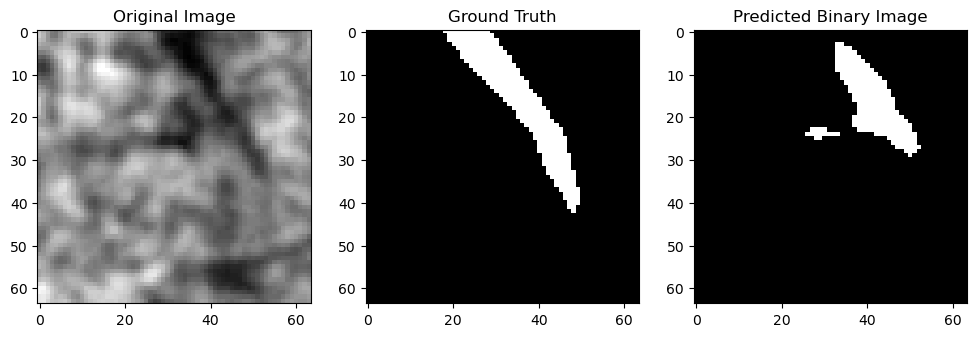

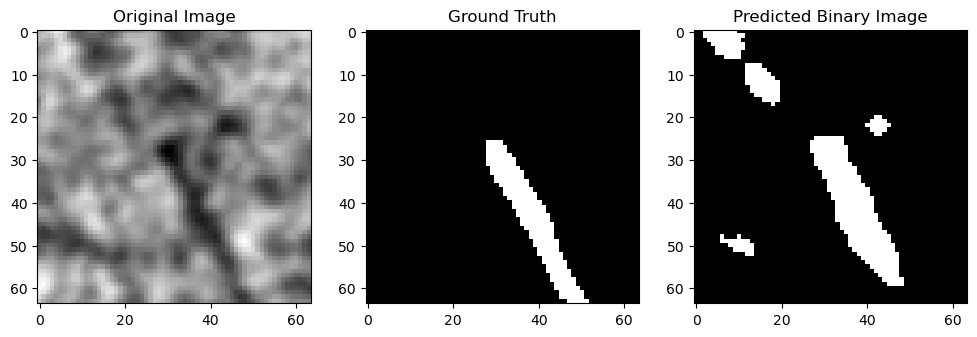

1/1 [==============================] - 0s 11ms/step
Epoch 91: Mean IoU on validation data = 0.5672
25/25 [==============================] - 0s 20ms/step - loss: 0.3742 - accuracy: 0.9313 - val_loss: 0.3421 - val_accuracy: 0.9506 - lr: 1.0000e-04 - val_iou: 0.5672
Epoch 92/1000
1/1 [==============================] - 0s 10ms/step
Epoch 92: Mean IoU on validation data = 0.5046
25/25 [==============================] - 0s 8ms/step - loss: 0.3704 - accuracy: 0.9375 - val_loss: 0.3893 - val_accuracy: 0.9364 - lr: 1.0000e-04 - val_iou: 0.5046
Epoch 93/1000
1/1 [==============================] - 0s 11ms/step
Epoch 93: Mean IoU on validation data = 0.5407
25/25 [==============================] - 0s 8ms/step - loss: 0.3322 - accuracy: 0.9481 - val_loss: 0.3654 - val_accuracy: 0.9477 - lr: 1.0000e-04 - val_iou: 0.5407
Epoch 94/1000
1/1 [==============================] - 0s 10ms/step
Epoch 94: Mean IoU on validation data = 0.5651
25/25 [==============================] - 0s 8ms/step - loss: 0.3742 -

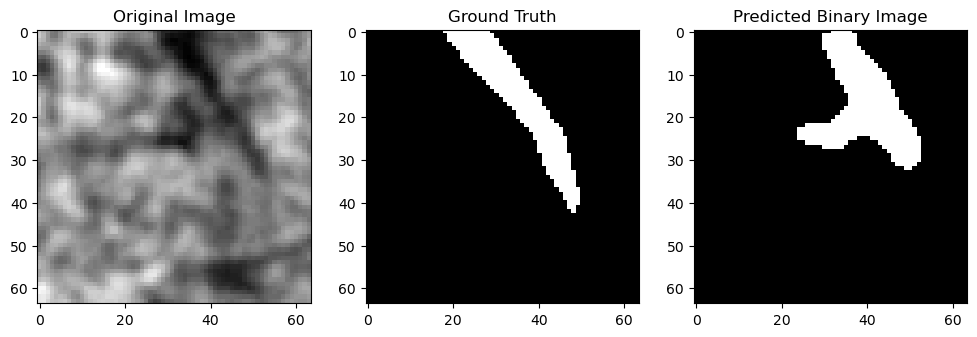

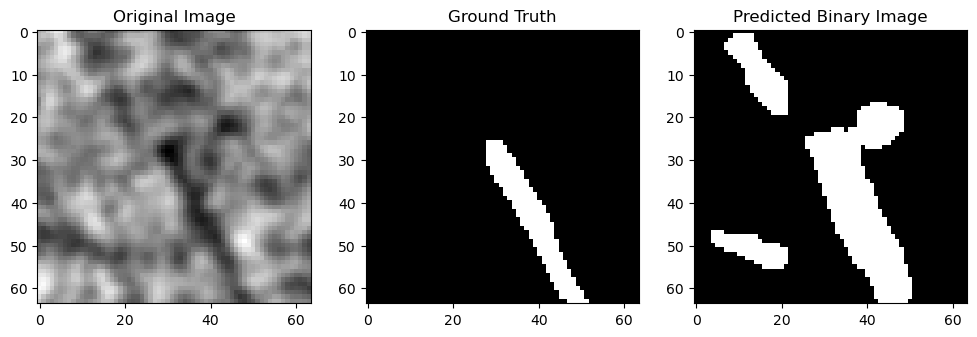

1/1 [==============================] - 0s 11ms/step
Epoch 101: Mean IoU on validation data = 0.5553
25/25 [==============================] - 0s 17ms/step - loss: 0.3432 - accuracy: 0.9412 - val_loss: 0.3493 - val_accuracy: 0.9458 - lr: 1.0000e-04 - val_iou: 0.5553
Epoch 102/1000
1/1 [==============================] - 0s 10ms/step
Epoch 102: Mean IoU on validation data = 0.5626
25/25 [==============================] - 0s 12ms/step - loss: 0.3280 - accuracy: 0.9447 - val_loss: 0.3376 - val_accuracy: 0.9503 - lr: 1.0000e-04 - val_iou: 0.5626
Epoch 103/1000
1/1 [==============================] - 0s 10ms/step
Epoch 103: Mean IoU on validation data = 0.5531
25/25 [==============================] - 0s 8ms/step - loss: 0.3663 - accuracy: 0.9391 - val_loss: 0.3376 - val_accuracy: 0.9480 - lr: 1.0000e-04 - val_iou: 0.5531
Epoch 104/1000
1/1 [==============================] - 0s 10ms/step
Epoch 104: Mean IoU on validation data = 0.5516
25/25 [==============================] - 0s 8ms/step - loss: 

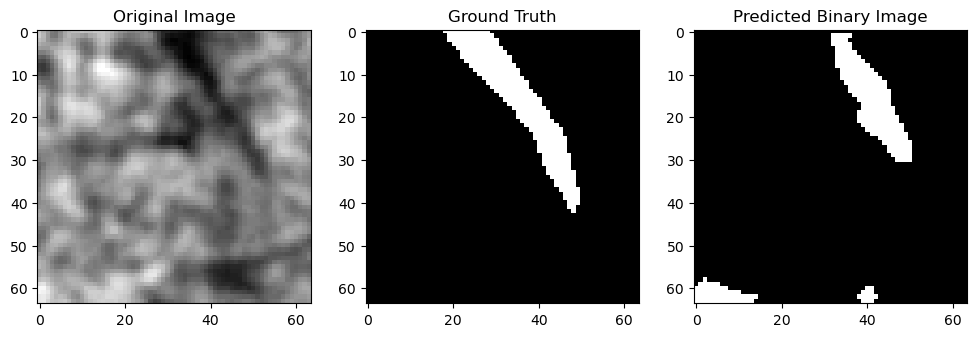

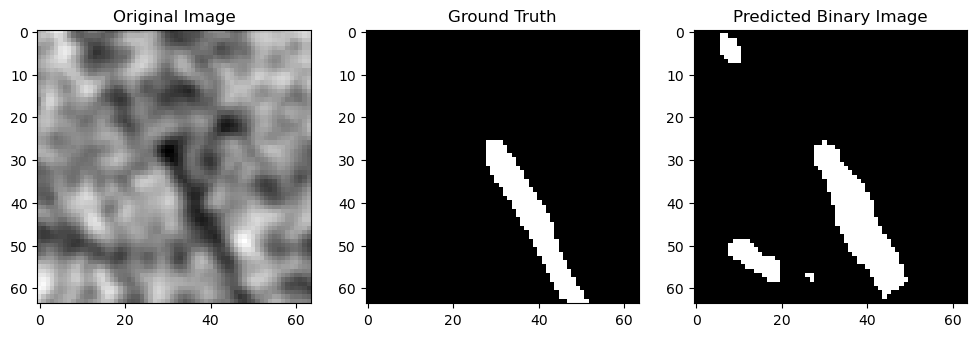

1/1 [==============================] - 0s 11ms/step
Epoch 111: Mean IoU on validation data = 0.5492
25/25 [==============================] - 0s 16ms/step - loss: 0.3299 - accuracy: 0.9418 - val_loss: 0.3294 - val_accuracy: 0.9461 - lr: 1.0000e-04 - val_iou: 0.5492
Epoch 112/1000
1/1 [==============================] - 0s 10ms/step
Epoch 112: Mean IoU on validation data = 0.5907
25/25 [==============================] - 0s 12ms/step - loss: 0.3220 - accuracy: 0.9433 - val_loss: 0.3037 - val_accuracy: 0.9542 - lr: 1.0000e-04 - val_iou: 0.5907
Epoch 113/1000
1/1 [==============================] - 0s 10ms/step
Epoch 113: Mean IoU on validation data = 0.5780
25/25 [==============================] - 0s 8ms/step - loss: 0.3016 - accuracy: 0.9492 - val_loss: 0.3109 - val_accuracy: 0.9530 - lr: 1.0000e-04 - val_iou: 0.5780
Epoch 114/1000
1/1 [==============================] - 0s 10ms/step
Epoch 114: Mean IoU on validation data = 0.5807
25/25 [==============================] - 0s 8ms/step - loss: 

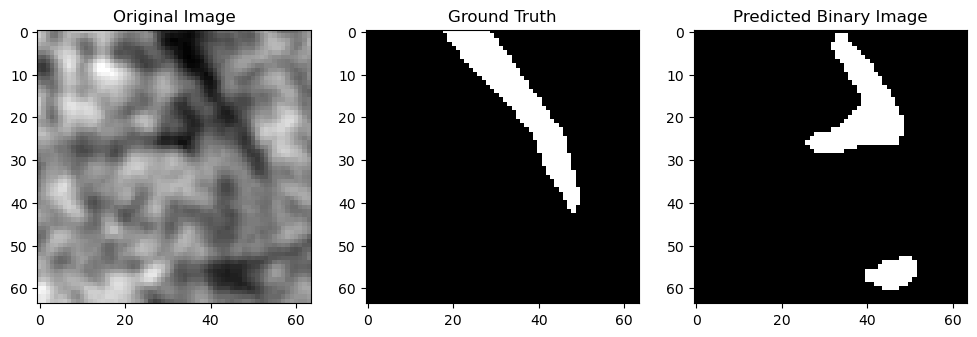

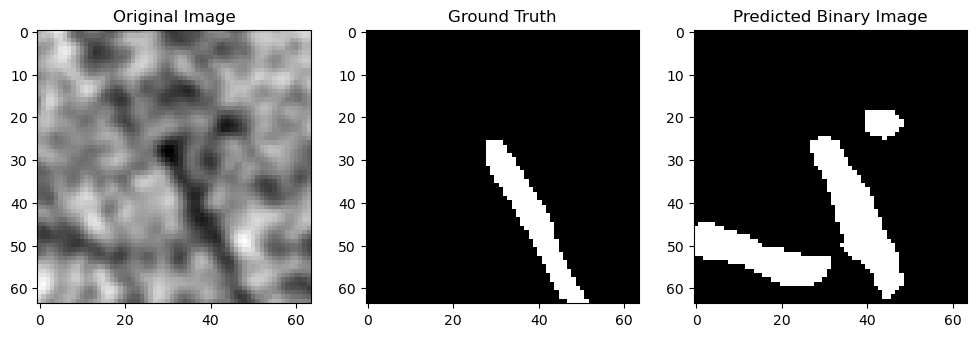

1/1 [==============================] - 0s 10ms/step
Epoch 121: Mean IoU on validation data = 0.5463
25/25 [==============================] - 0s 15ms/step - loss: 0.3222 - accuracy: 0.9410 - val_loss: 0.3291 - val_accuracy: 0.9477 - lr: 1.0000e-04 - val_iou: 0.5463
Epoch 122/1000
1/1 [==============================] - 0s 9ms/step
Epoch 122: Mean IoU on validation data = 0.5479
25/25 [==============================] - 0s 8ms/step - loss: 0.2933 - accuracy: 0.9511 - val_loss: 0.3197 - val_accuracy: 0.9484 - lr: 1.0000e-04 - val_iou: 0.5479
Epoch 123/1000
1/1 [==============================] - 0s 9ms/step
Epoch 123: Mean IoU on validation data = 0.5877
25/25 [==============================] - 0s 8ms/step - loss: 0.3312 - accuracy: 0.9406 - val_loss: 0.3117 - val_accuracy: 0.9544 - lr: 1.0000e-04 - val_iou: 0.5877
Epoch 124/1000
1/1 [==============================] - 0s 10ms/step
Epoch 124: Mean IoU on validation data = 0.5783
25/25 [==============================] - 0s 8ms/step - loss: 0.2

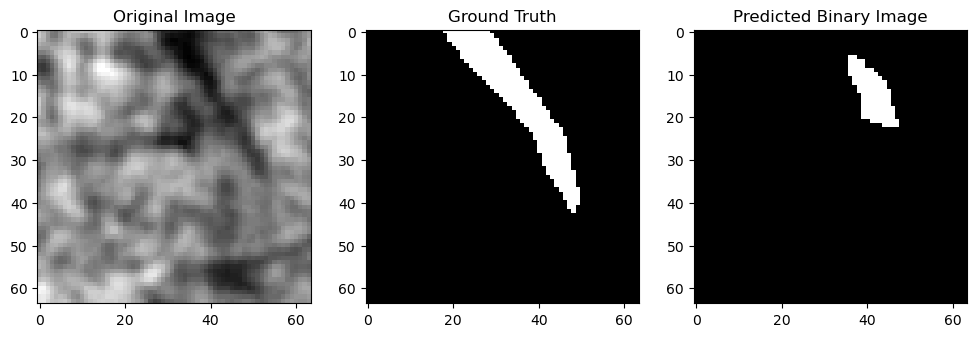

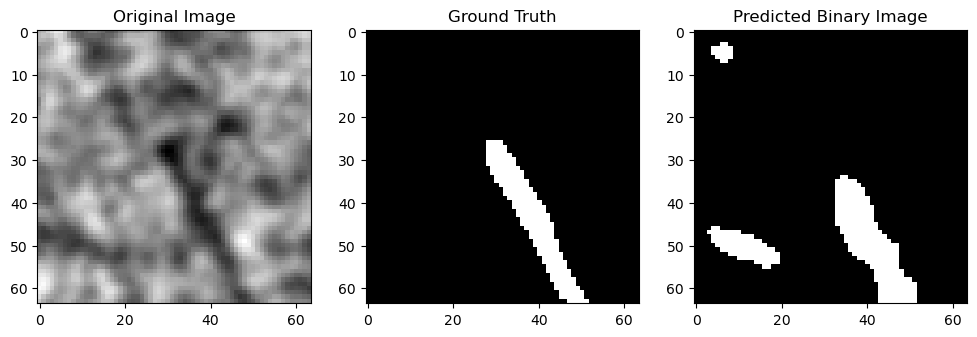

1/1 [==============================] - 0s 10ms/step
Epoch 131: Mean IoU on validation data = 0.5698
25/25 [==============================] - 0s 16ms/step - loss: 0.2847 - accuracy: 0.9524 - val_loss: 0.3115 - val_accuracy: 0.9520 - lr: 1.0000e-04 - val_iou: 0.5698
Epoch 132/1000
1/1 [==============================] - 0s 9ms/step
Epoch 132: Mean IoU on validation data = 0.5424
25/25 [==============================] - 0s 8ms/step - loss: 0.3054 - accuracy: 0.9485 - val_loss: 0.3240 - val_accuracy: 0.9484 - lr: 1.0000e-04 - val_iou: 0.5424
Epoch 133/1000
1/1 [==============================] - 0s 9ms/step
Epoch 133: Mean IoU on validation data = 0.5654
25/25 [==============================] - 0s 7ms/step - loss: 0.2981 - accuracy: 0.9476 - val_loss: 0.3053 - val_accuracy: 0.9522 - lr: 1.0000e-04 - val_iou: 0.5654
Epoch 134/1000
1/1 [==============================] - 0s 10ms/step
Epoch 134: Mean IoU on validation data = 0.5591
25/25 [==============================] - 0s 8ms/step - loss: 0.2

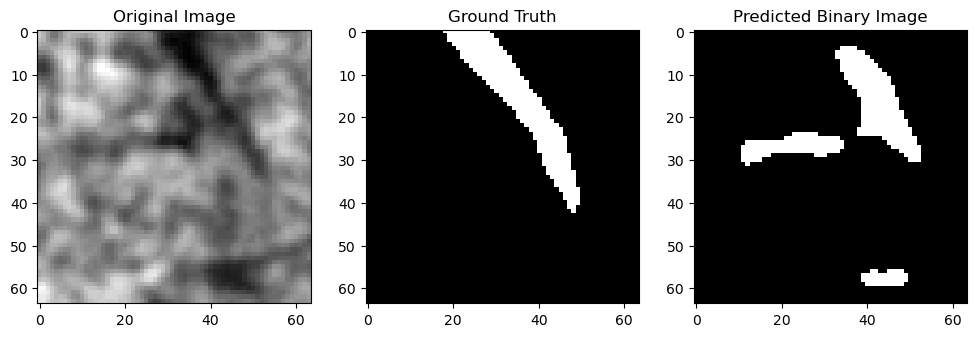

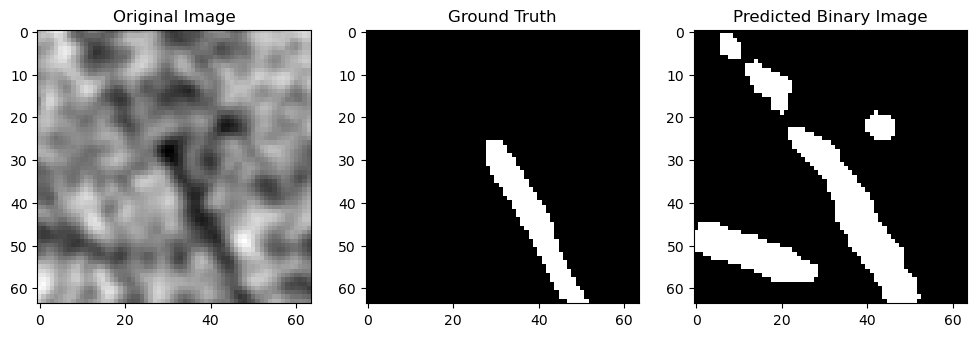

1/1 [==============================] - 0s 10ms/step
Epoch 141: Mean IoU on validation data = 0.6062
25/25 [==============================] - 0s 20ms/step - loss: 0.2795 - accuracy: 0.9496 - val_loss: 0.2684 - val_accuracy: 0.9550 - lr: 1.0000e-04 - val_iou: 0.6062
Epoch 142/1000
1/1 [==============================] - 0s 9ms/step
Epoch 142: Mean IoU on validation data = 0.6006
25/25 [==============================] - 0s 8ms/step - loss: 0.2832 - accuracy: 0.9474 - val_loss: 0.2707 - val_accuracy: 0.9567 - lr: 1.0000e-04 - val_iou: 0.6006
Epoch 143/1000
1/1 [==============================] - 0s 9ms/step
Epoch 143: Mean IoU on validation data = 0.5785
25/25 [==============================] - 0s 7ms/step - loss: 0.2774 - accuracy: 0.9501 - val_loss: 0.2921 - val_accuracy: 0.9554 - lr: 1.0000e-04 - val_iou: 0.5785
Epoch 144/1000
1/1 [==============================] - 0s 10ms/step
Epoch 144: Mean IoU on validation data = 0.6006
25/25 [==============================] - 0s 8ms/step - loss: 0.2

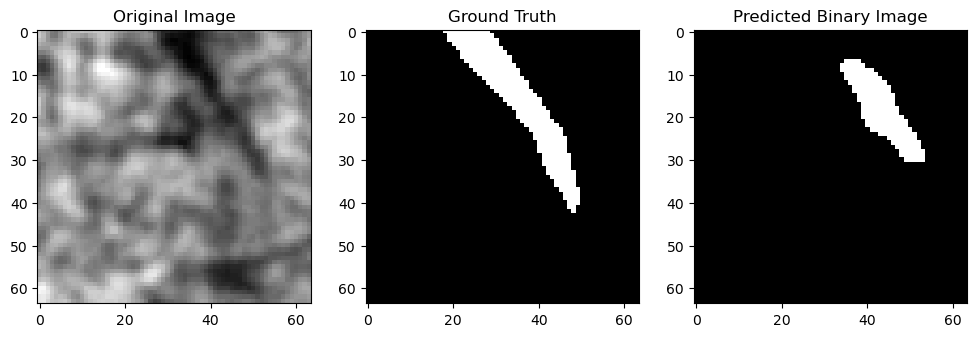

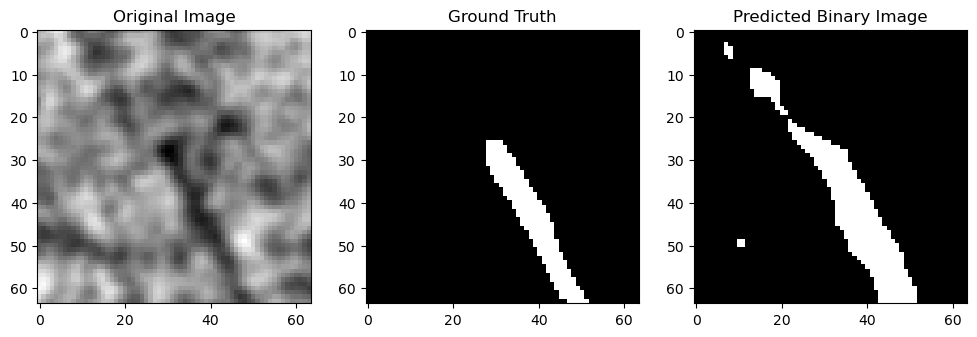

1/1 [==============================] - 0s 11ms/step
Epoch 151: Mean IoU on validation data = 0.5926
25/25 [==============================] - 1s 25ms/step - loss: 0.2720 - accuracy: 0.9507 - val_loss: 0.2756 - val_accuracy: 0.9561 - lr: 1.0000e-04 - val_iou: 0.5926
Epoch 152/1000
1/1 [==============================] - 0s 11ms/step
Epoch 152: Mean IoU on validation data = 0.5962
25/25 [==============================] - 0s 8ms/step - loss: 0.2588 - accuracy: 0.9530 - val_loss: 0.2706 - val_accuracy: 0.9564 - lr: 1.0000e-04 - val_iou: 0.5962
Epoch 153/1000
1/1 [==============================] - 0s 10ms/step
Epoch 153: Mean IoU on validation data = 0.5973
25/25 [==============================] - 0s 8ms/step - loss: 0.2925 - accuracy: 0.9454 - val_loss: 0.2701 - val_accuracy: 0.9580 - lr: 1.0000e-04 - val_iou: 0.5973
Epoch 154/1000
1/1 [==============================] - 0s 10ms/step
Epoch 154: Mean IoU on validation data = 0.5968
25/25 [==============================] - 0s 8ms/step - loss: 0

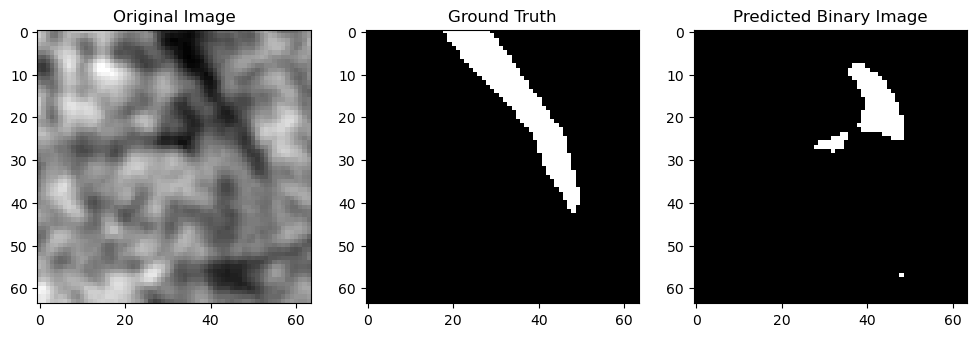

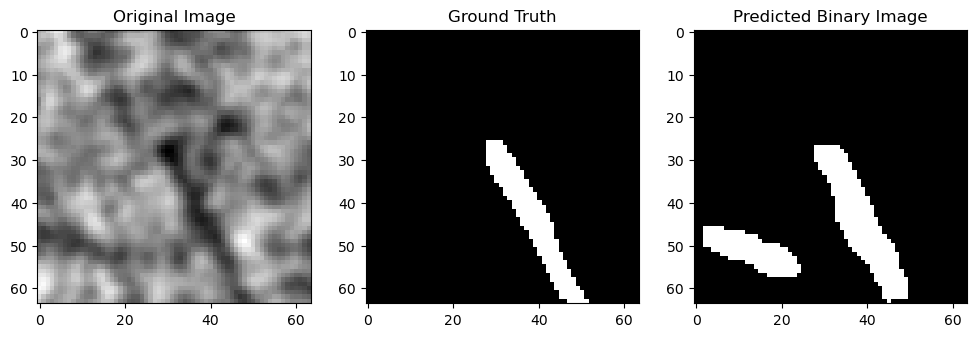

1/1 [==============================] - 0s 11ms/step
Epoch 161: Mean IoU on validation data = 0.5933
25/25 [==============================] - 0s 16ms/step - loss: 0.2812 - accuracy: 0.9497 - val_loss: 0.2675 - val_accuracy: 0.9544 - lr: 1.0000e-04 - val_iou: 0.5933
Epoch 162/1000
1/1 [==============================] - 0s 10ms/step
Epoch 162: Mean IoU on validation data = 0.6204
25/25 [==============================] - 0s 12ms/step - loss: 0.2613 - accuracy: 0.9503 - val_loss: 0.2516 - val_accuracy: 0.9595 - lr: 1.0000e-04 - val_iou: 0.6204
Epoch 163/1000
1/1 [==============================] - 0s 10ms/step
Epoch 163: Mean IoU on validation data = 0.6167
25/25 [==============================] - 0s 8ms/step - loss: 0.2832 - accuracy: 0.9495 - val_loss: 0.2522 - val_accuracy: 0.9576 - lr: 1.0000e-04 - val_iou: 0.6167
Epoch 164/1000
1/1 [==============================] - 0s 10ms/step
Epoch 164: Mean IoU on validation data = 0.5979
25/25 [==============================] - 0s 8ms/step - loss: 

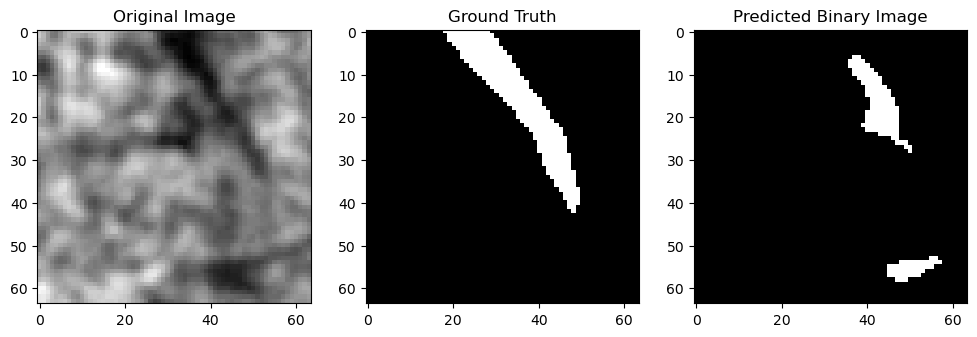

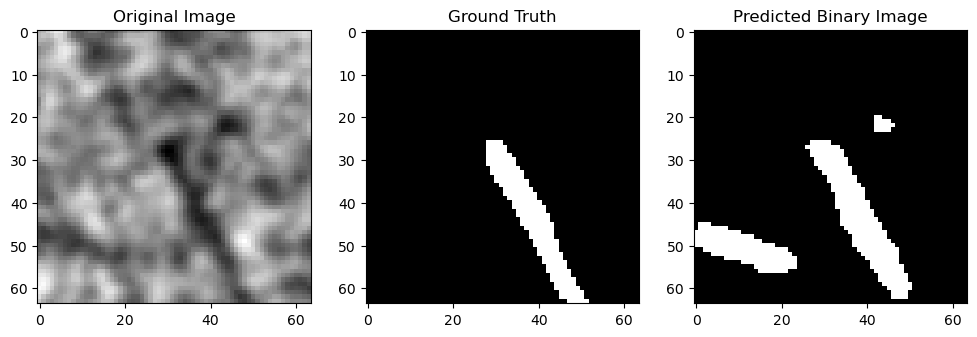

1/1 [==============================] - 0s 11ms/step
Epoch 171: Mean IoU on validation data = 0.6360
25/25 [==============================] - 0s 16ms/step - loss: 0.2902 - accuracy: 0.9485 - val_loss: 0.2359 - val_accuracy: 0.9611 - lr: 1.0000e-04 - val_iou: 0.6360
Epoch 172/1000
1/1 [==============================] - 0s 10ms/step
Epoch 172: Mean IoU on validation data = 0.6008
25/25 [==============================] - 0s 7ms/step - loss: 0.2503 - accuracy: 0.9522 - val_loss: 0.2551 - val_accuracy: 0.9577 - lr: 1.0000e-04 - val_iou: 0.6008
Epoch 173/1000
1/1 [==============================] - 0s 9ms/step
Epoch 173: Mean IoU on validation data = 0.6020
25/25 [==============================] - 0s 7ms/step - loss: 0.2847 - accuracy: 0.9482 - val_loss: 0.2551 - val_accuracy: 0.9546 - lr: 1.0000e-04 - val_iou: 0.6020
Epoch 174/1000
1/1 [==============================] - 0s 11ms/step
Epoch 174: Mean IoU on validation data = 0.6139
25/25 [==============================] - 0s 8ms/step - loss: 0.

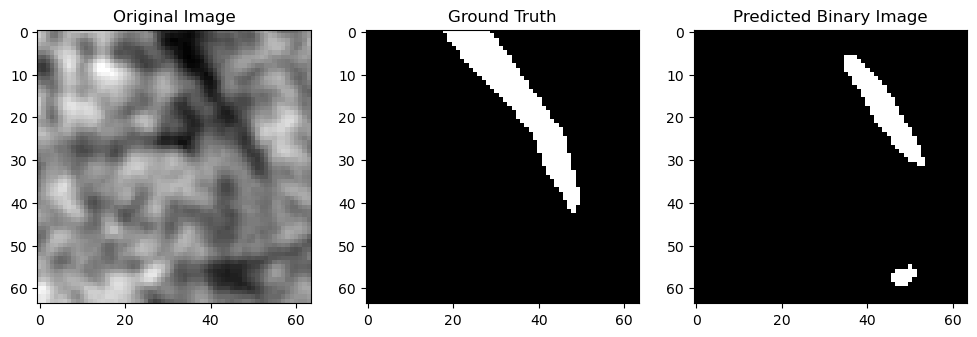

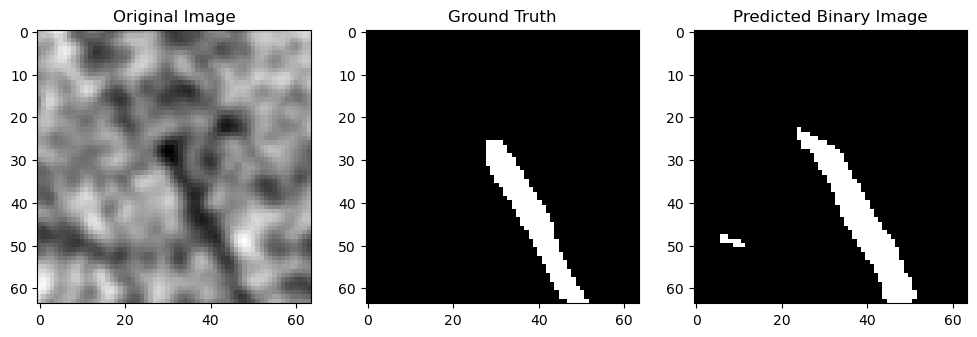

1/1 [==============================] - 0s 11ms/step
Epoch 181: Mean IoU on validation data = 0.5942
25/25 [==============================] - 0s 15ms/step - loss: 0.2641 - accuracy: 0.9533 - val_loss: 0.2639 - val_accuracy: 0.9595 - lr: 1.0000e-04 - val_iou: 0.5942
Epoch 182/1000
1/1 [==============================] - 0s 10ms/step
Epoch 182: Mean IoU on validation data = 0.5785
25/25 [==============================] - 0s 7ms/step - loss: 0.2586 - accuracy: 0.9523 - val_loss: 0.2740 - val_accuracy: 0.9556 - lr: 1.0000e-04 - val_iou: 0.5785
Epoch 183/1000
1/1 [==============================] - 0s 9ms/step
Epoch 183: Mean IoU on validation data = 0.5655
25/25 [==============================] - 0s 7ms/step - loss: 0.2685 - accuracy: 0.9490 - val_loss: 0.2832 - val_accuracy: 0.9514 - lr: 1.0000e-04 - val_iou: 0.5655
Epoch 184/1000
1/1 [==============================] - 0s 9ms/step
Epoch 184: Mean IoU on validation data = 0.5766
25/25 [==============================] - 0s 7ms/step - loss: 0.2

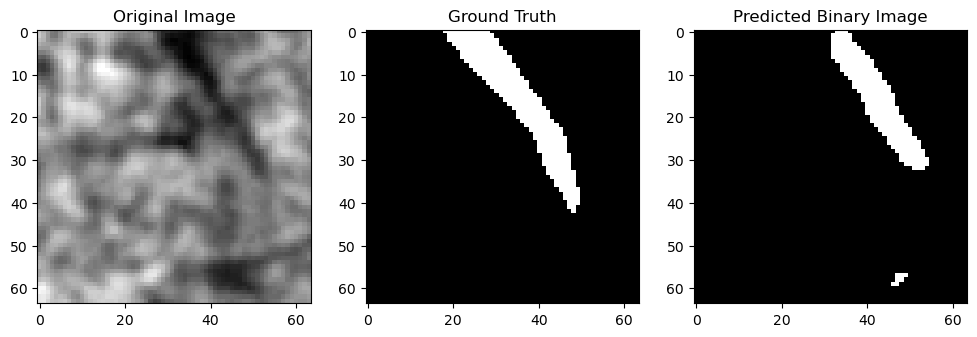

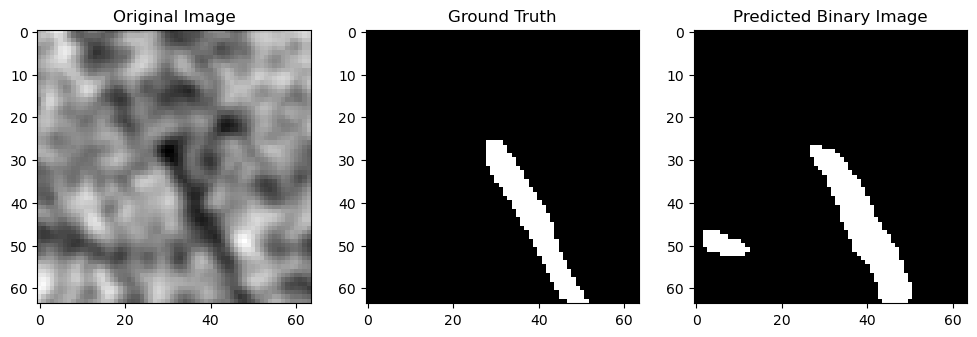

1/1 [==============================] - 0s 10ms/step
Epoch 191: Mean IoU on validation data = 0.6095
25/25 [==============================] - 0s 15ms/step - loss: 0.2566 - accuracy: 0.9513 - val_loss: 0.2534 - val_accuracy: 0.9600 - lr: 1.0000e-04 - val_iou: 0.6095
Epoch 192/1000
1/1 [==============================] - 0s 9ms/step
Epoch 192: Mean IoU on validation data = 0.6099
25/25 [==============================] - 0s 7ms/step - loss: 0.2669 - accuracy: 0.9531 - val_loss: 0.2566 - val_accuracy: 0.9577 - lr: 1.0000e-04 - val_iou: 0.6099
Epoch 193/1000
1/1 [==============================] - 0s 10ms/step
Epoch 193: Mean IoU on validation data = 0.6153
25/25 [==============================] - 0s 8ms/step - loss: 0.2564 - accuracy: 0.9509 - val_loss: 0.2501 - val_accuracy: 0.9583 - lr: 1.0000e-04 - val_iou: 0.6153
Epoch 194/1000
1/1 [==============================] - 0s 9ms/step
Epoch 194: Mean IoU on validation data = 0.6248
25/25 [==============================] - 0s 8ms/step - loss: 0.2

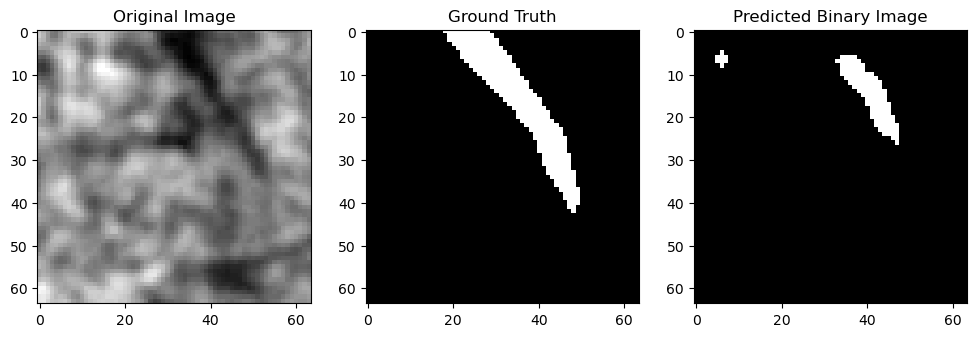

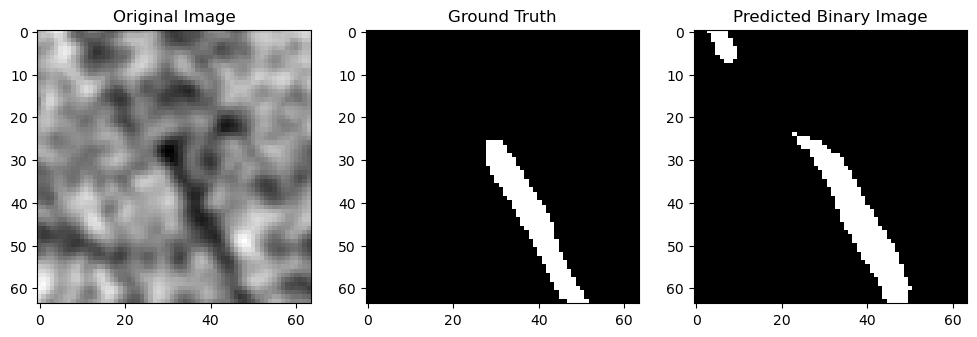

1/1 [==============================] - 0s 10ms/step
Epoch 201: Mean IoU on validation data = 0.5804
25/25 [==============================] - 0s 16ms/step - loss: 0.2419 - accuracy: 0.9542 - val_loss: 0.2687 - val_accuracy: 0.9548 - lr: 1.0000e-04 - val_iou: 0.5804
Epoch 202/1000
1/1 [==============================] - 0s 10ms/step
Epoch 202: Mean IoU on validation data = 0.5953
25/25 [==============================] - 0s 8ms/step - loss: 0.2500 - accuracy: 0.9550 - val_loss: 0.2602 - val_accuracy: 0.9556 - lr: 1.0000e-04 - val_iou: 0.5953
Epoch 203/1000
1/1 [==============================] - 0s 10ms/step
Epoch 203: Mean IoU on validation data = 0.5993
25/25 [==============================] - 0s 7ms/step - loss: 0.2631 - accuracy: 0.9513 - val_loss: 0.2518 - val_accuracy: 0.9575 - lr: 1.0000e-04 - val_iou: 0.5993
Epoch 204/1000
1/1 [==============================] - 0s 10ms/step
Epoch 204: Mean IoU on validation data = 0.6255
25/25 [==============================] - 0s 8ms/step - loss: 0

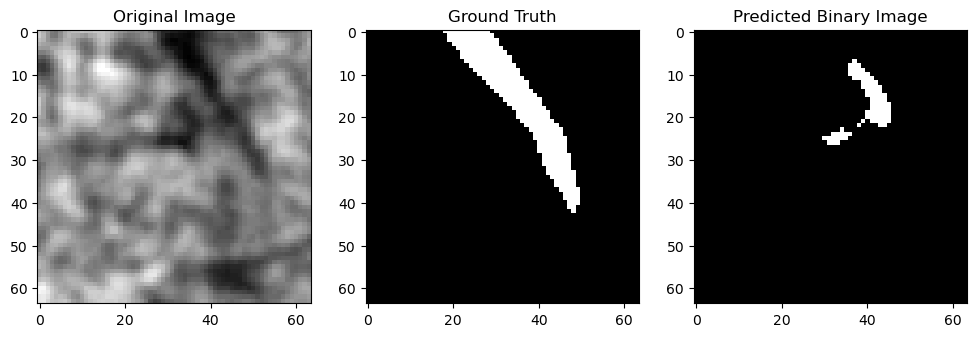

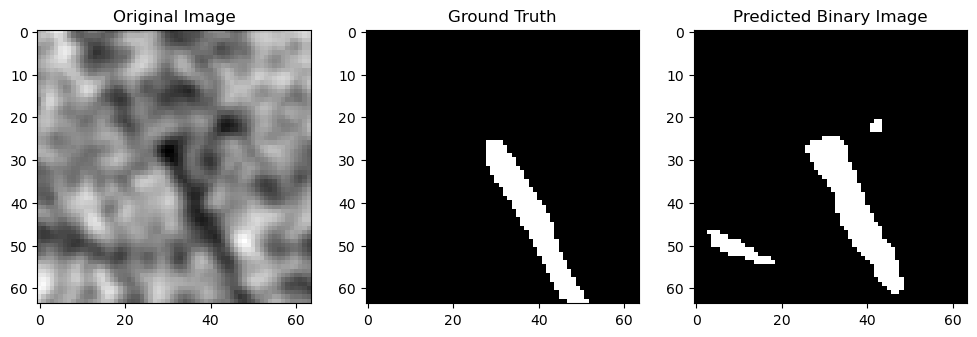

1/1 [==============================] - 0s 10ms/step
Epoch 211: Mean IoU on validation data = 0.6165
25/25 [==============================] - 0s 15ms/step - loss: 0.2569 - accuracy: 0.9519 - val_loss: 0.2446 - val_accuracy: 0.9611 - lr: 1.0000e-04 - val_iou: 0.6165
Epoch 212/1000
1/1 [==============================] - 0s 10ms/step
Epoch 212: Mean IoU on validation data = 0.6157
25/25 [==============================] - 0s 7ms/step - loss: 0.2634 - accuracy: 0.9528 - val_loss: 0.2458 - val_accuracy: 0.9607 - lr: 1.0000e-04 - val_iou: 0.6157
Epoch 213/1000
1/1 [==============================] - 0s 10ms/step
Epoch 213: Mean IoU on validation data = 0.6094
25/25 [==============================] - 0s 7ms/step - loss: 0.2612 - accuracy: 0.9528 - val_loss: 0.2482 - val_accuracy: 0.9605 - lr: 1.0000e-04 - val_iou: 0.6094
Epoch 214/1000
1/1 [==============================] - 0s 9ms/step
Epoch 214: Mean IoU on validation data = 0.6077
25/25 [==============================] - 0s 9ms/step - loss: 0.

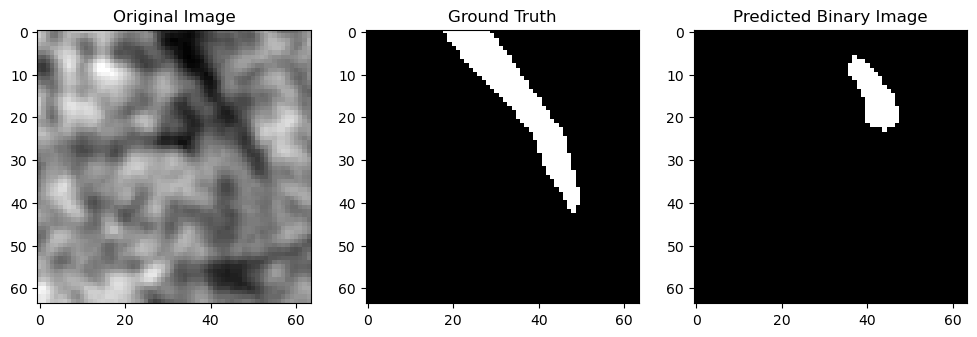

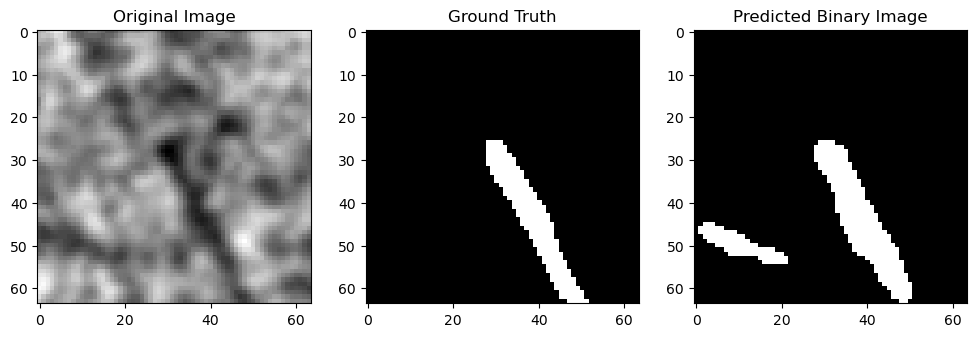

1/1 [==============================] - 0s 12ms/step
Epoch 221: Mean IoU on validation data = 0.6100
25/25 [==============================] - 1s 26ms/step - loss: 0.2930 - accuracy: 0.9443 - val_loss: 0.2404 - val_accuracy: 0.9602 - lr: 1.0000e-04 - val_iou: 0.6100
Epoch 222/1000
1/1 [==============================] - 0s 11ms/step
Epoch 222: Mean IoU on validation data = 0.6086
25/25 [==============================] - 0s 8ms/step - loss: 0.2589 - accuracy: 0.9523 - val_loss: 0.2418 - val_accuracy: 0.9600 - lr: 1.0000e-04 - val_iou: 0.6086
Epoch 223/1000
1/1 [==============================] - 0s 10ms/step
Epoch 223: Mean IoU on validation data = 0.5943
25/25 [==============================] - 0s 8ms/step - loss: 0.2326 - accuracy: 0.9569 - val_loss: 0.2574 - val_accuracy: 0.9606 - lr: 1.0000e-04 - val_iou: 0.5943
Epoch 224/1000
1/1 [==============================] - 0s 11ms/step
Epoch 224: Mean IoU on validation data = 0.6277
25/25 [==============================] - 0s 8ms/step - loss: 0

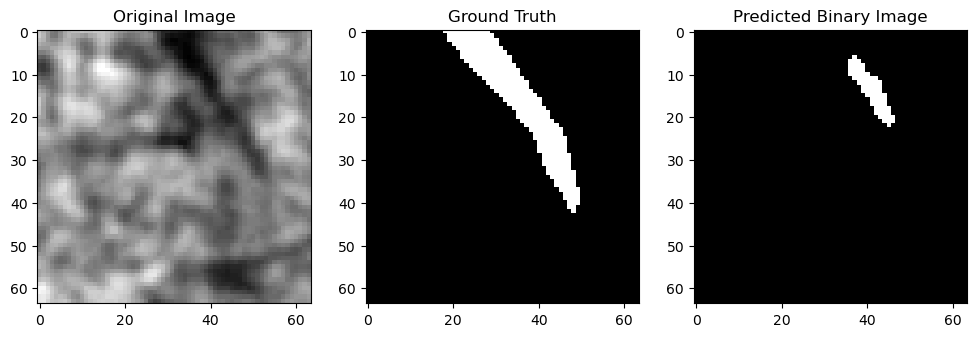

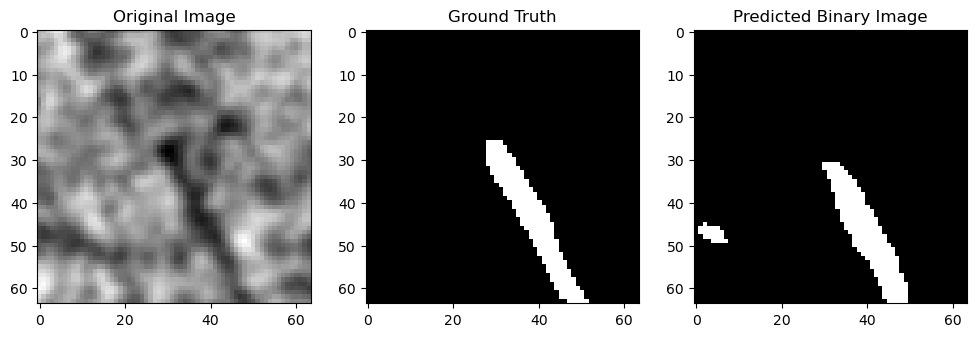

1/1 [==============================] - 0s 11ms/step
Epoch 231: Mean IoU on validation data = 0.6305
25/25 [==============================] - 0s 16ms/step - loss: 0.2604 - accuracy: 0.9528 - val_loss: 0.2315 - val_accuracy: 0.9618 - lr: 1.0000e-04 - val_iou: 0.6305
Epoch 232/1000
1/1 [==============================] - 0s 11ms/step
Epoch 232: Mean IoU on validation data = 0.6212
25/25 [==============================] - 0s 8ms/step - loss: 0.2247 - accuracy: 0.9575 - val_loss: 0.2499 - val_accuracy: 0.9599 - lr: 1.0000e-04 - val_iou: 0.6212
Epoch 233/1000
1/1 [==============================] - 0s 10ms/step
Epoch 233: Mean IoU on validation data = 0.6169
25/25 [==============================] - 0s 8ms/step - loss: 0.2538 - accuracy: 0.9509 - val_loss: 0.2459 - val_accuracy: 0.9595 - lr: 1.0000e-04 - val_iou: 0.6169
Epoch 234/1000
1/1 [==============================] - 0s 10ms/step
Epoch 234: Mean IoU on validation data = 0.6232
25/25 [==============================] - 0s 8ms/step - loss: 0

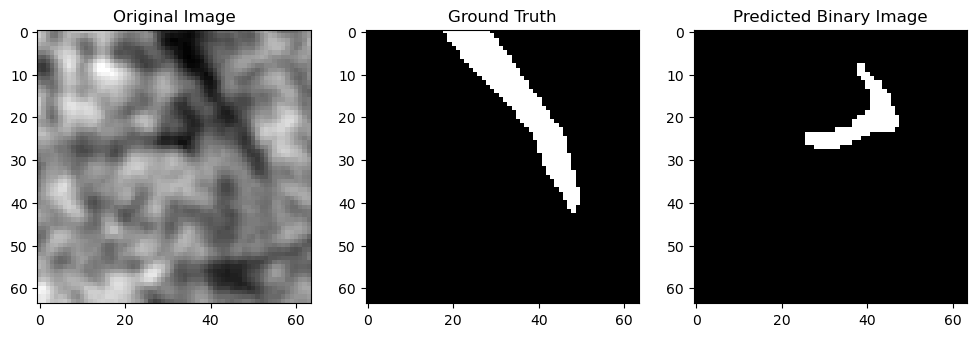

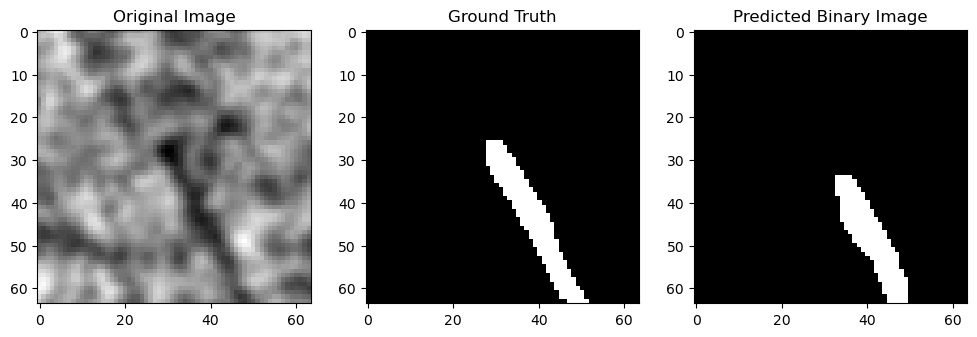

1/1 [==============================] - 0s 11ms/step
Epoch 241: Mean IoU on validation data = 0.6158
25/25 [==============================] - 0s 15ms/step - loss: 0.2524 - accuracy: 0.9497 - val_loss: 0.2344 - val_accuracy: 0.9588 - lr: 1.0000e-04 - val_iou: 0.6158
Epoch 242/1000
1/1 [==============================] - 0s 11ms/step
Epoch 242: Mean IoU on validation data = 0.6393
25/25 [==============================] - 0s 8ms/step - loss: 0.2590 - accuracy: 0.9525 - val_loss: 0.2169 - val_accuracy: 0.9628 - lr: 1.0000e-04 - val_iou: 0.6393
Epoch 243/1000
1/1 [==============================] - 0s 10ms/step
Epoch 243: Mean IoU on validation data = 0.6320
25/25 [==============================] - 0s 8ms/step - loss: 0.2479 - accuracy: 0.9512 - val_loss: 0.2220 - val_accuracy: 0.9619 - lr: 1.0000e-04 - val_iou: 0.6320
Epoch 244/1000
1/1 [==============================] - 0s 10ms/step
Epoch 244: Mean IoU on validation data = 0.6265
25/25 [==============================] - 0s 8ms/step - loss: 0

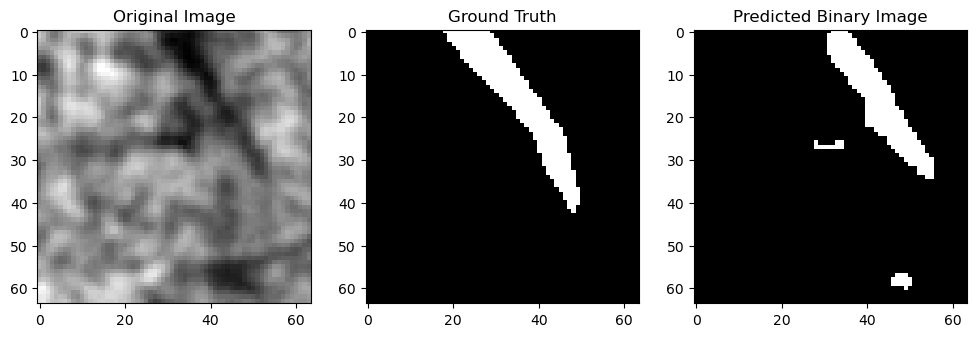

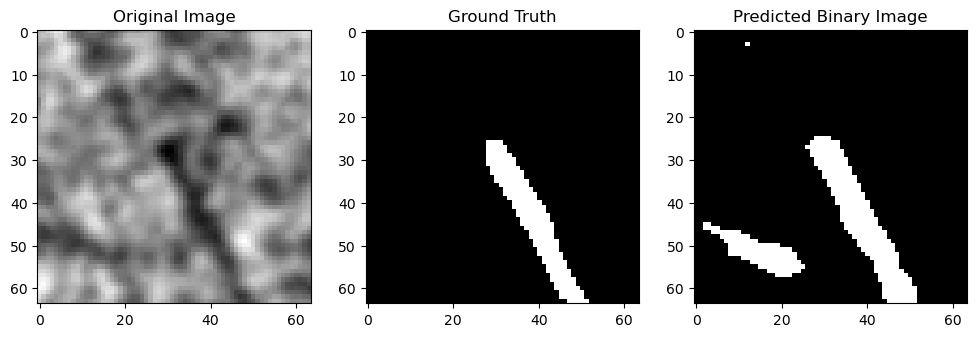

1/1 [==============================] - 0s 10ms/step
Epoch 251: Mean IoU on validation data = 0.6499
25/25 [==============================] - 0s 16ms/step - loss: 0.2346 - accuracy: 0.9525 - val_loss: 0.2118 - val_accuracy: 0.9634 - lr: 1.0000e-04 - val_iou: 0.6499
Epoch 252/1000
1/1 [==============================] - 0s 10ms/step
Epoch 252: Mean IoU on validation data = 0.6349
25/25 [==============================] - 0s 8ms/step - loss: 0.2459 - accuracy: 0.9555 - val_loss: 0.2250 - val_accuracy: 0.9614 - lr: 1.0000e-04 - val_iou: 0.6349
Epoch 253/1000
1/1 [==============================] - 0s 9ms/step
Epoch 253: Mean IoU on validation data = 0.6438
25/25 [==============================] - 0s 8ms/step - loss: 0.2394 - accuracy: 0.9546 - val_loss: 0.2150 - val_accuracy: 0.9623 - lr: 1.0000e-04 - val_iou: 0.6438
Epoch 254/1000
1/1 [==============================] - 0s 9ms/step
Epoch 254: Mean IoU on validation data = 0.6442
25/25 [==============================] - 0s 8ms/step - loss: 0.2

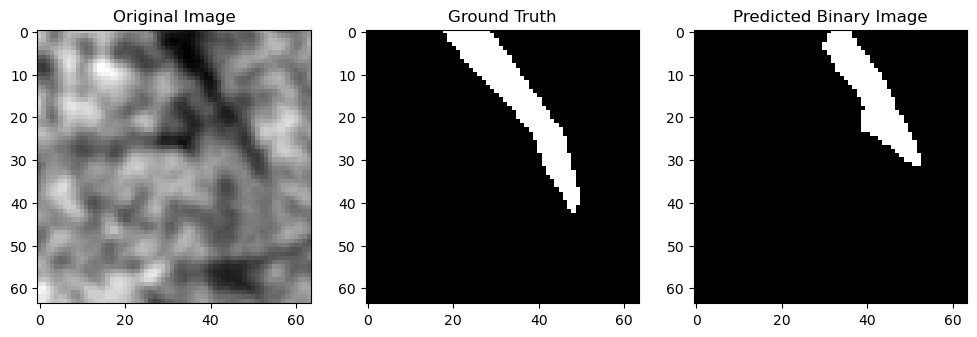

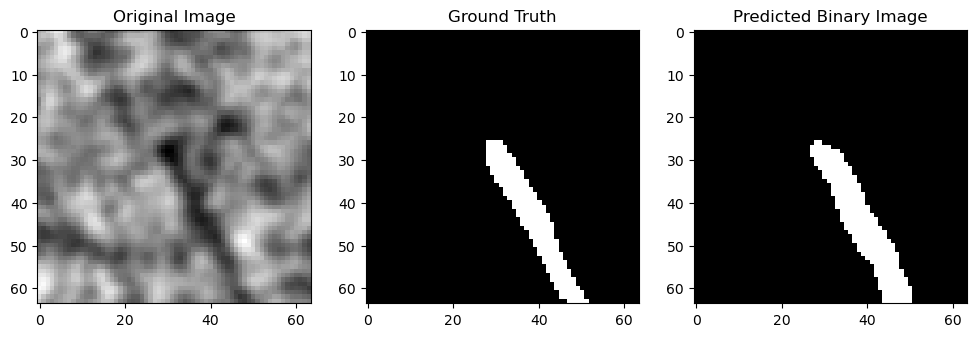

1/1 [==============================] - 0s 10ms/step
Epoch 261: Mean IoU on validation data = 0.6442
25/25 [==============================] - 0s 15ms/step - loss: 0.2457 - accuracy: 0.9534 - val_loss: 0.2177 - val_accuracy: 0.9645 - lr: 1.0000e-04 - val_iou: 0.6442
Epoch 262/1000
1/1 [==============================] - 0s 9ms/step
Epoch 262: Mean IoU on validation data = 0.6435
25/25 [==============================] - 0s 7ms/step - loss: 0.2484 - accuracy: 0.9529 - val_loss: 0.2145 - val_accuracy: 0.9642 - lr: 1.0000e-04 - val_iou: 0.6435
Epoch 263/1000
1/1 [==============================] - 0s 9ms/step
Epoch 263: Mean IoU on validation data = 0.6546
25/25 [==============================] - 0s 7ms/step - loss: 0.2370 - accuracy: 0.9564 - val_loss: 0.2095 - val_accuracy: 0.9658 - lr: 1.0000e-04 - val_iou: 0.6546
Epoch 264/1000
1/1 [==============================] - 0s 9ms/step
Epoch 264: Mean IoU on validation data = 0.6467
25/25 [==============================] - 0s 7ms/step - loss: 0.24

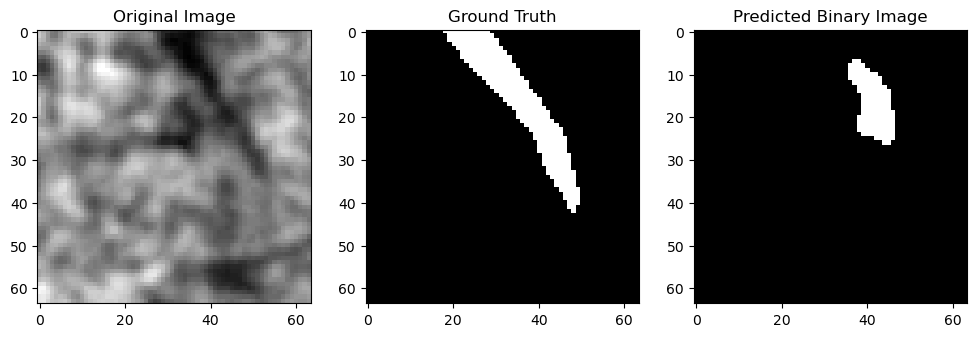

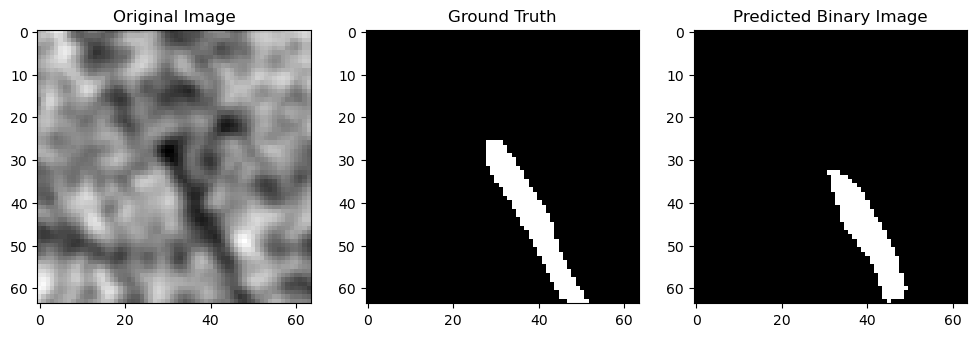

1/1 [==============================] - 0s 11ms/step
Epoch 271: Mean IoU on validation data = 0.6053
25/25 [==============================] - 0s 16ms/step - loss: 0.2441 - accuracy: 0.9524 - val_loss: 0.2389 - val_accuracy: 0.9594 - lr: 1.0000e-04 - val_iou: 0.6053
Epoch 272/1000
1/1 [==============================] - 0s 9ms/step
Epoch 272: Mean IoU on validation data = 0.6139
25/25 [==============================] - 0s 8ms/step - loss: 0.2422 - accuracy: 0.9518 - val_loss: 0.2330 - val_accuracy: 0.9603 - lr: 1.0000e-04 - val_iou: 0.6139
Epoch 273/1000
1/1 [==============================] - 0s 10ms/step
Epoch 273: Mean IoU on validation data = 0.6033
25/25 [==============================] - 0s 7ms/step - loss: 0.2546 - accuracy: 0.9546 - val_loss: 0.2490 - val_accuracy: 0.9580 - lr: 1.0000e-04 - val_iou: 0.6033
Epoch 274/1000
1/1 [==============================] - 0s 10ms/step
Epoch 274: Mean IoU on validation data = 0.6387
25/25 [==============================] - 0s 8ms/step - loss: 0.

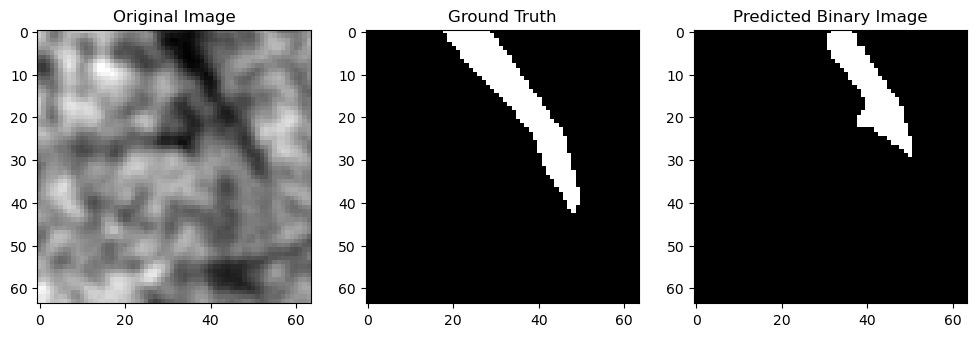

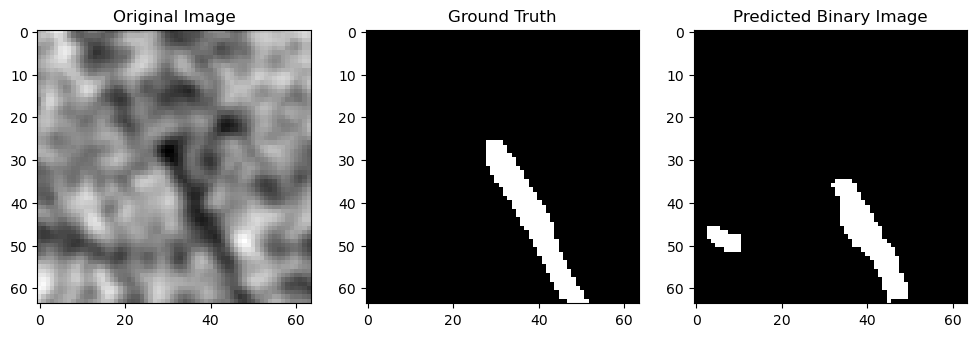

1/1 [==============================] - 0s 10ms/step
Epoch 281: Mean IoU on validation data = 0.6002
25/25 [==============================] - 0s 16ms/step - loss: 0.2499 - accuracy: 0.9517 - val_loss: 0.2518 - val_accuracy: 0.9595 - lr: 1.0000e-04 - val_iou: 0.6002
Epoch 282/1000
1/1 [==============================] - 0s 10ms/step
Epoch 282: Mean IoU on validation data = 0.6081
25/25 [==============================] - 0s 7ms/step - loss: 0.2253 - accuracy: 0.9558 - val_loss: 0.2386 - val_accuracy: 0.9586 - lr: 1.0000e-04 - val_iou: 0.6081
Epoch 283/1000
1/1 [==============================] - 0s 10ms/step
Epoch 283: Mean IoU on validation data = 0.6126
25/25 [==============================] - 0s 8ms/step - loss: 0.2334 - accuracy: 0.9568 - val_loss: 0.2331 - val_accuracy: 0.9595 - lr: 1.0000e-04 - val_iou: 0.6126
Epoch 284/1000
1/1 [==============================] - 0s 10ms/step
Epoch 284: Mean IoU on validation data = 0.6367
25/25 [==============================] - 0s 8ms/step - loss: 0

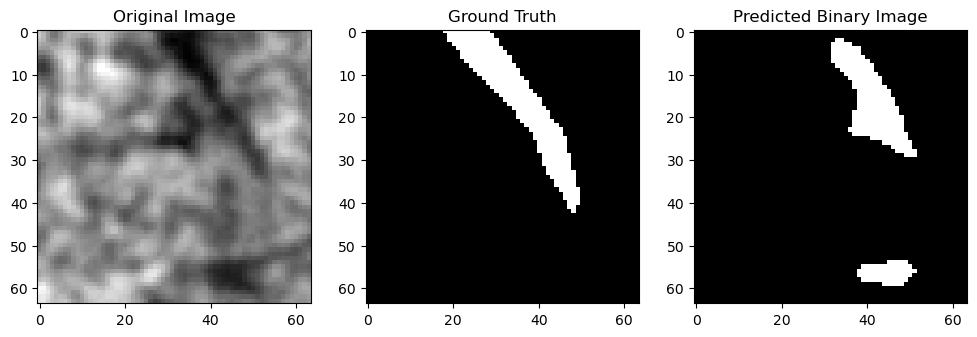

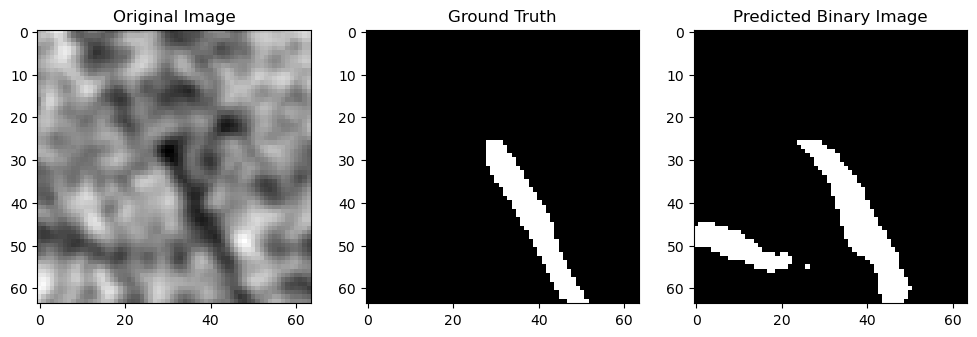

1/1 [==============================] - 0s 11ms/step
Epoch 291: Mean IoU on validation data = 0.6396
25/25 [==============================] - 1s 25ms/step - loss: 0.2321 - accuracy: 0.9570 - val_loss: 0.2199 - val_accuracy: 0.9619 - lr: 1.0000e-04 - val_iou: 0.6396
Epoch 292/1000
1/1 [==============================] - 0s 10ms/step
Epoch 292: Mean IoU on validation data = 0.6230
25/25 [==============================] - 0s 8ms/step - loss: 0.2311 - accuracy: 0.9536 - val_loss: 0.2256 - val_accuracy: 0.9607 - lr: 1.0000e-04 - val_iou: 0.6230
Epoch 293/1000
1/1 [==============================] - 0s 10ms/step
Epoch 293: Mean IoU on validation data = 0.6382
25/25 [==============================] - 0s 8ms/step - loss: 0.2398 - accuracy: 0.9550 - val_loss: 0.2170 - val_accuracy: 0.9644 - lr: 1.0000e-04 - val_iou: 0.6382
Epoch 294/1000
1/1 [==============================] - 0s 11ms/step
Epoch 294: Mean IoU on validation data = 0.6009
25/25 [==============================] - 0s 8ms/step - loss: 0

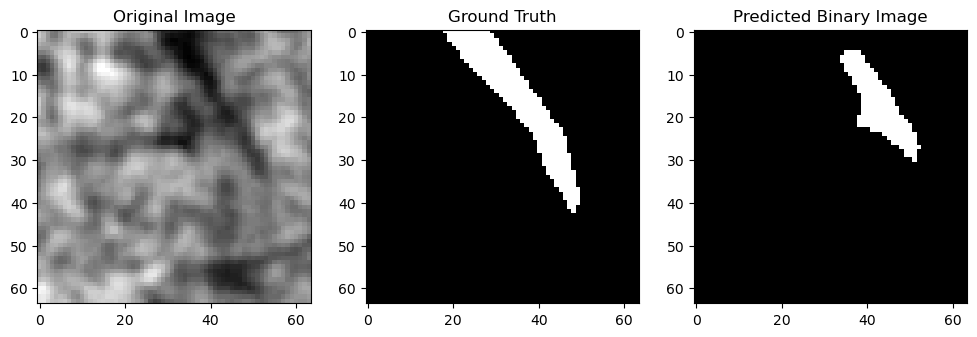

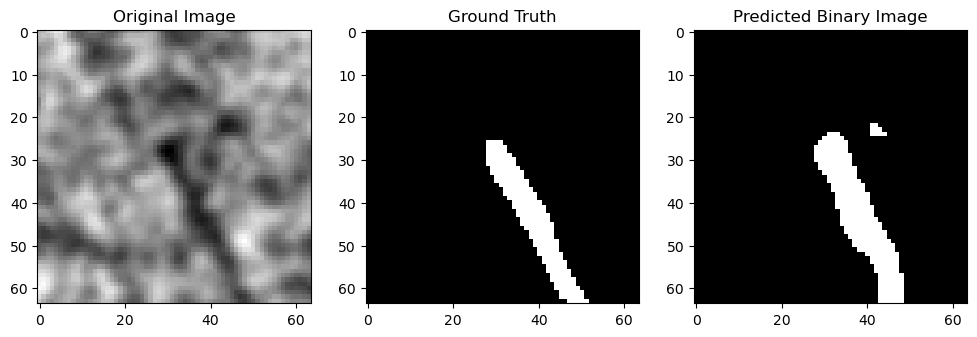

1/1 [==============================] - 0s 11ms/step
Epoch 301: Mean IoU on validation data = 0.6009
25/25 [==============================] - 0s 16ms/step - loss: 0.2463 - accuracy: 0.9535 - val_loss: 0.2463 - val_accuracy: 0.9594 - lr: 1.0000e-04 - val_iou: 0.6009
Epoch 302/1000
1/1 [==============================] - 0s 10ms/step
Epoch 302: Mean IoU on validation data = 0.5679
25/25 [==============================] - 0s 8ms/step - loss: 0.2371 - accuracy: 0.9541 - val_loss: 0.2663 - val_accuracy: 0.9580 - lr: 1.0000e-04 - val_iou: 0.5679
Epoch 303/1000
1/1 [==============================] - 0s 11ms/step
Epoch 303: Mean IoU on validation data = 0.5900
25/25 [==============================] - 0s 8ms/step - loss: 0.2144 - accuracy: 0.9603 - val_loss: 0.2471 - val_accuracy: 0.9592 - lr: 1.0000e-04 - val_iou: 0.5900
Epoch 304/1000
1/1 [==============================] - 0s 10ms/step
Epoch 304: Mean IoU on validation data = 0.6093
25/25 [==============================] - 0s 7ms/step - loss: 0

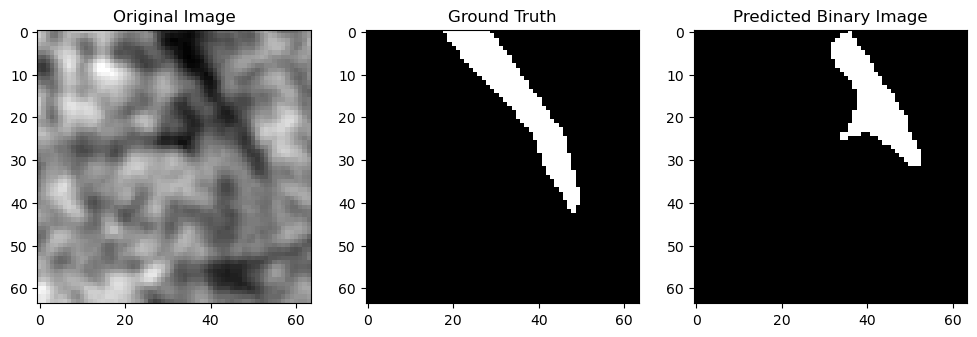

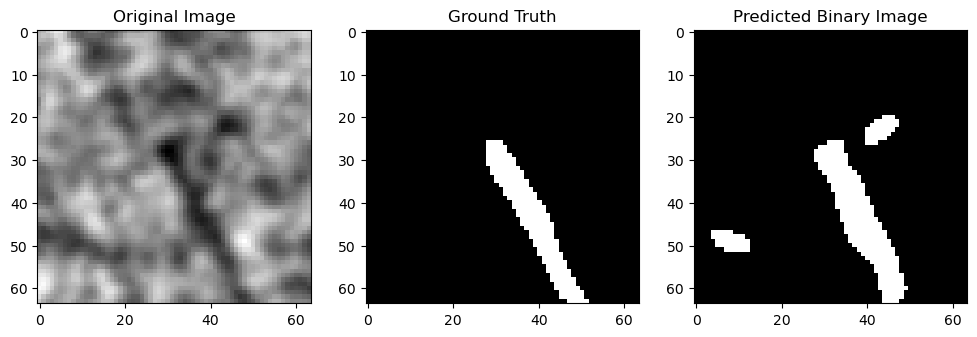

1/1 [==============================] - 0s 11ms/step
Epoch 311: Mean IoU on validation data = 0.6380
25/25 [==============================] - 0s 16ms/step - loss: 0.2463 - accuracy: 0.9508 - val_loss: 0.2176 - val_accuracy: 0.9634 - lr: 1.0000e-04 - val_iou: 0.6380
Epoch 312/1000
1/1 [==============================] - 0s 10ms/step
Epoch 312: Mean IoU on validation data = 0.6159
25/25 [==============================] - 0s 8ms/step - loss: 0.2223 - accuracy: 0.9575 - val_loss: 0.2339 - val_accuracy: 0.9613 - lr: 1.0000e-04 - val_iou: 0.6159
Epoch 313/1000
1/1 [==============================] - 0s 10ms/step
Epoch 313: Mean IoU on validation data = 0.6558
25/25 [==============================] - 0s 8ms/step - loss: 0.2325 - accuracy: 0.9562 - val_loss: 0.2040 - val_accuracy: 0.9650 - lr: 1.0000e-04 - val_iou: 0.6558
Epoch 314/1000
1/1 [==============================] - 0s 10ms/step
Epoch 314: Mean IoU on validation data = 0.6582
25/25 [==============================] - 0s 8ms/step - loss: 0

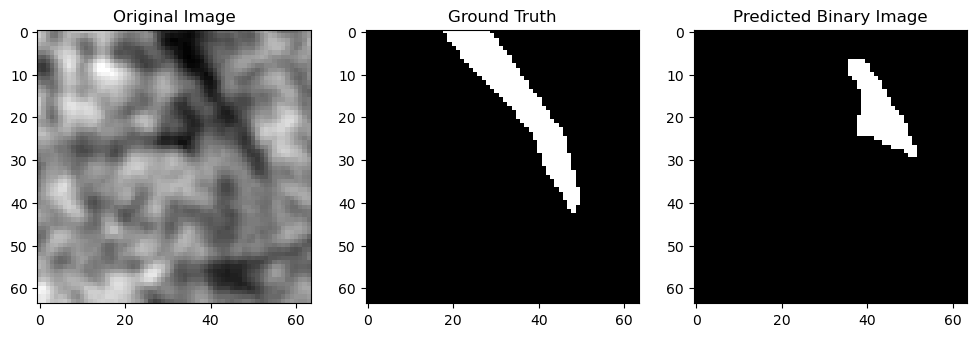

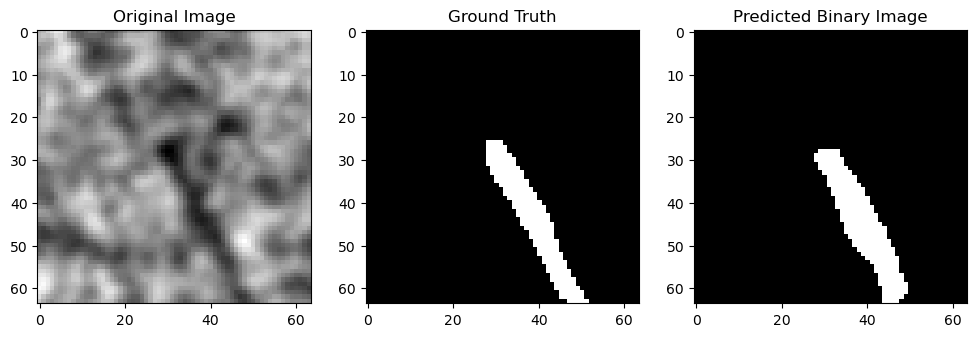

1/1 [==============================] - 0s 11ms/step
Epoch 321: Mean IoU on validation data = 0.6146
25/25 [==============================] - 0s 16ms/step - loss: 0.2398 - accuracy: 0.9528 - val_loss: 0.2314 - val_accuracy: 0.9600 - lr: 1.0000e-04 - val_iou: 0.6146
Epoch 322/1000
1/1 [==============================] - 0s 10ms/step
Epoch 322: Mean IoU on validation data = 0.6070
25/25 [==============================] - 0s 7ms/step - loss: 0.2319 - accuracy: 0.9559 - val_loss: 0.2487 - val_accuracy: 0.9590 - lr: 1.0000e-04 - val_iou: 0.6070
Epoch 323/1000
1/1 [==============================] - 0s 10ms/step
Epoch 323: Mean IoU on validation data = 0.6172
25/25 [==============================] - 0s 7ms/step - loss: 0.2392 - accuracy: 0.9522 - val_loss: 0.2350 - val_accuracy: 0.9618 - lr: 1.0000e-04 - val_iou: 0.6172
Epoch 324/1000
1/1 [==============================] - 0s 10ms/step
Epoch 324: Mean IoU on validation data = 0.5722
25/25 [==============================] - 0s 8ms/step - loss: 0

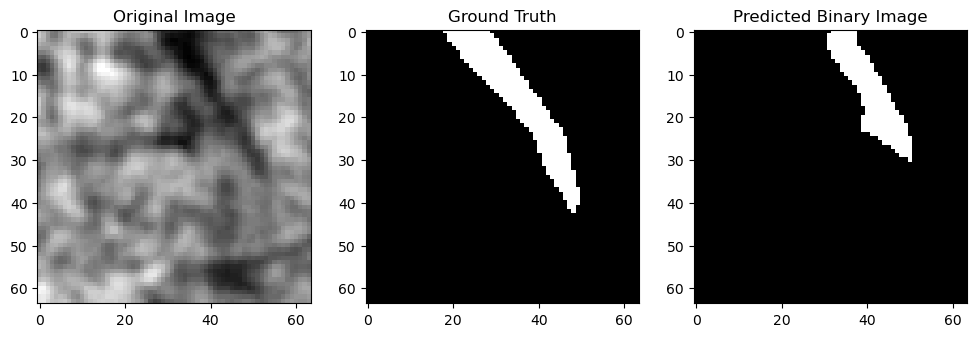

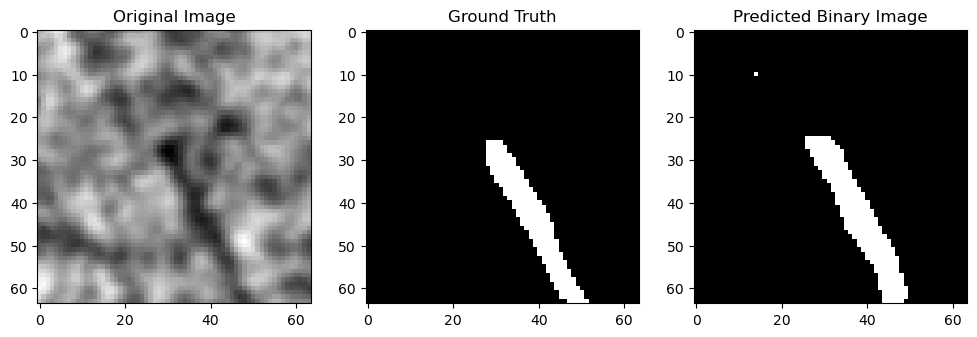

1/1 [==============================] - 0s 10ms/step
Epoch 331: Mean IoU on validation data = 0.6325
25/25 [==============================] - 0s 15ms/step - loss: 0.2157 - accuracy: 0.9584 - val_loss: 0.2187 - val_accuracy: 0.9622 - lr: 1.0000e-04 - val_iou: 0.6325
Epoch 332/1000
1/1 [==============================] - 0s 9ms/step
Epoch 332: Mean IoU on validation data = 0.6370
25/25 [==============================] - 0s 7ms/step - loss: 0.2184 - accuracy: 0.9559 - val_loss: 0.2191 - val_accuracy: 0.9637 - lr: 1.0000e-04 - val_iou: 0.6370
Epoch 333/1000
1/1 [==============================] - 0s 10ms/step
Epoch 333: Mean IoU on validation data = 0.6335
25/25 [==============================] - 0s 7ms/step - loss: 0.2102 - accuracy: 0.9619 - val_loss: 0.2256 - val_accuracy: 0.9634 - lr: 1.0000e-04 - val_iou: 0.6335
Epoch 334/1000
1/1 [==============================] - 0s 10ms/step
Epoch 334: Mean IoU on validation data = 0.6324
25/25 [==============================] - 0s 7ms/step - loss: 0.

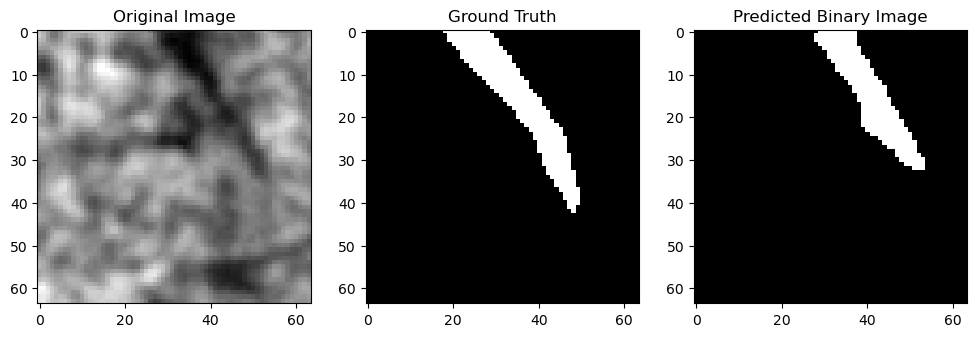

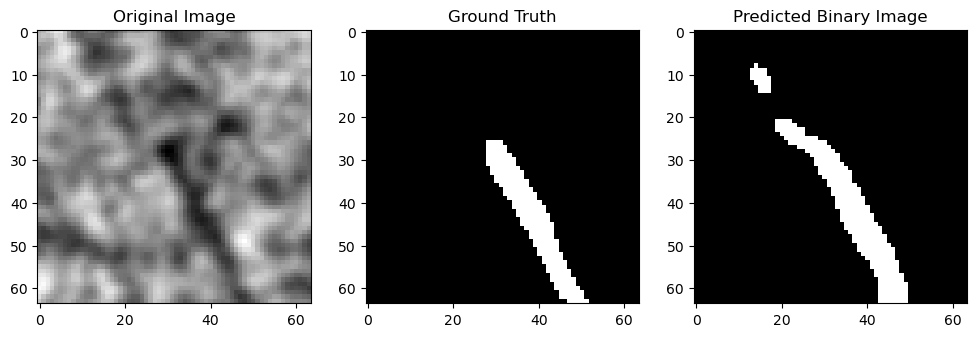

1/1 [==============================] - 0s 10ms/step
Epoch 341: Mean IoU on validation data = 0.6549
25/25 [==============================] - 0s 16ms/step - loss: 0.2277 - accuracy: 0.9552 - val_loss: 0.2035 - val_accuracy: 0.9661 - lr: 5.0000e-05 - val_iou: 0.6549
Epoch 342/1000
1/1 [==============================] - 0s 10ms/step
Epoch 342: Mean IoU on validation data = 0.6802
25/25 [==============================] - 0s 12ms/step - loss: 0.2176 - accuracy: 0.9577 - val_loss: 0.1873 - val_accuracy: 0.9679 - lr: 5.0000e-05 - val_iou: 0.6802
Epoch 343/1000
1/1 [==============================] - 0s 9ms/step
Epoch 343: Mean IoU on validation data = 0.6642
25/25 [==============================] - 0s 8ms/step - loss: 0.2251 - accuracy: 0.9563 - val_loss: 0.1971 - val_accuracy: 0.9663 - lr: 5.0000e-05 - val_iou: 0.6642
Epoch 344/1000
1/1 [==============================] - 0s 10ms/step
Epoch 344: Mean IoU on validation data = 0.6626
25/25 [==============================] - 0s 8ms/step - loss: 0

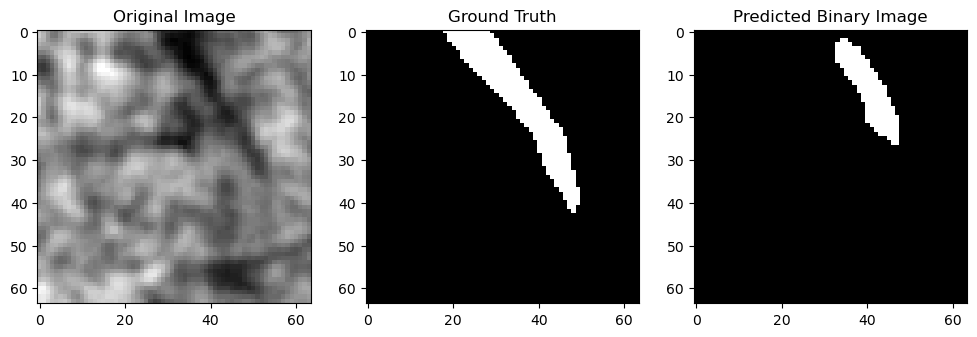

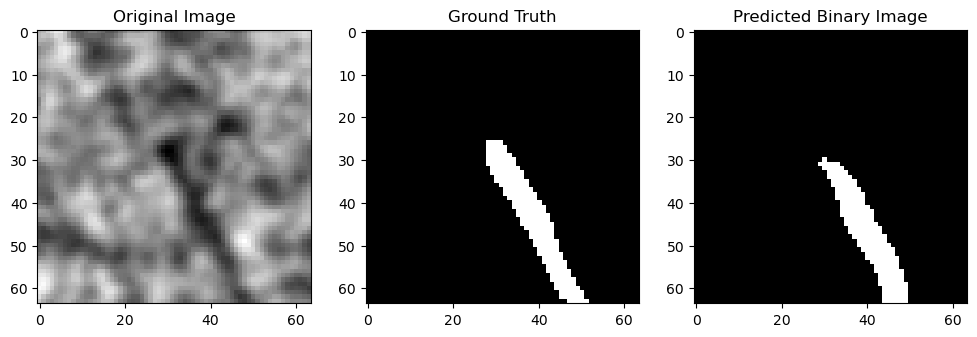

1/1 [==============================] - 0s 11ms/step
Epoch 351: Mean IoU on validation data = 0.6664
25/25 [==============================] - 0s 16ms/step - loss: 0.2394 - accuracy: 0.9529 - val_loss: 0.1976 - val_accuracy: 0.9665 - lr: 5.0000e-05 - val_iou: 0.6664
Epoch 352/1000
1/1 [==============================] - 0s 10ms/step
Epoch 352: Mean IoU on validation data = 0.6607
25/25 [==============================] - 0s 8ms/step - loss: 0.2136 - accuracy: 0.9581 - val_loss: 0.2009 - val_accuracy: 0.9662 - lr: 5.0000e-05 - val_iou: 0.6607
Epoch 353/1000
1/1 [==============================] - 0s 10ms/step
Epoch 353: Mean IoU on validation data = 0.6765
25/25 [==============================] - 0s 8ms/step - loss: 0.2229 - accuracy: 0.9579 - val_loss: 0.1900 - val_accuracy: 0.9675 - lr: 5.0000e-05 - val_iou: 0.6765
Epoch 354/1000
1/1 [==============================] - 0s 10ms/step
Epoch 354: Mean IoU on validation data = 0.6703
25/25 [==============================] - 0s 7ms/step - loss: 0

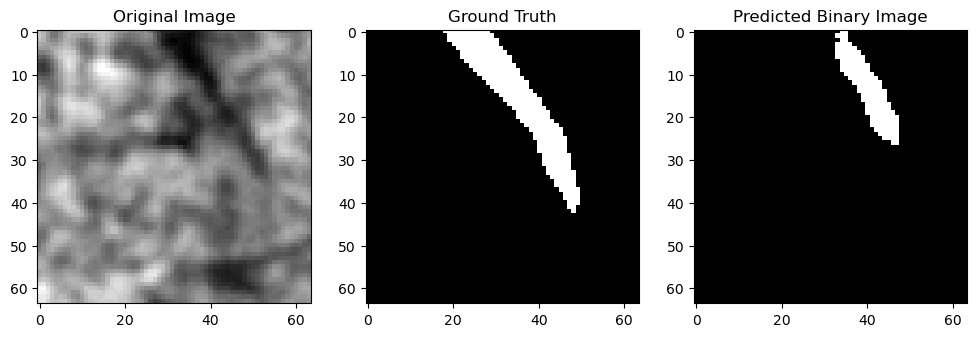

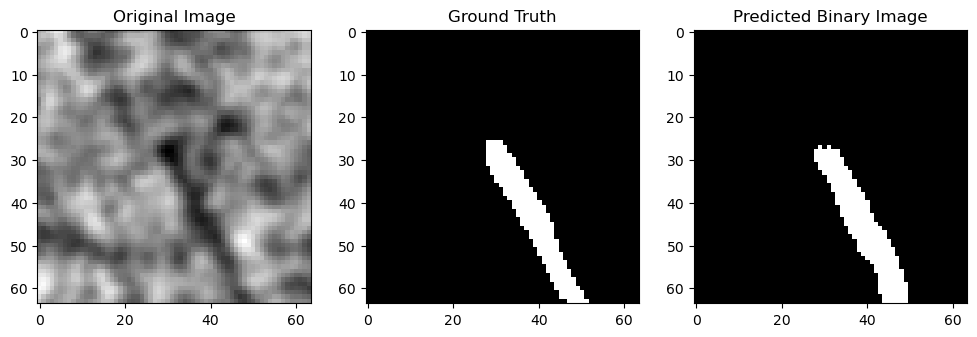

1/1 [==============================] - 0s 12ms/step
Epoch 361: Mean IoU on validation data = 0.6578
25/25 [==============================] - 1s 26ms/step - loss: 0.2386 - accuracy: 0.9543 - val_loss: 0.2040 - val_accuracy: 0.9658 - lr: 5.0000e-05 - val_iou: 0.6578
Epoch 362/1000
1/1 [==============================] - 0s 11ms/step
Epoch 362: Mean IoU on validation data = 0.6747
25/25 [==============================] - 0s 8ms/step - loss: 0.2056 - accuracy: 0.9617 - val_loss: 0.1904 - val_accuracy: 0.9674 - lr: 5.0000e-05 - val_iou: 0.6747
Epoch 363/1000
1/1 [==============================] - 0s 10ms/step
Epoch 363: Mean IoU on validation data = 0.6670
25/25 [==============================] - 0s 8ms/step - loss: 0.2185 - accuracy: 0.9566 - val_loss: 0.1965 - val_accuracy: 0.9661 - lr: 5.0000e-05 - val_iou: 0.6670
Epoch 364/1000
1/1 [==============================] - 0s 10ms/step
Epoch 364: Mean IoU on validation data = 0.6552
25/25 [==============================] - 0s 8ms/step - loss: 0

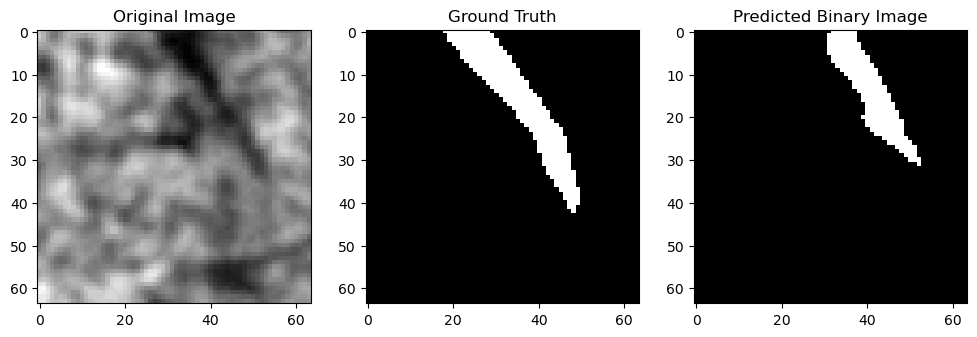

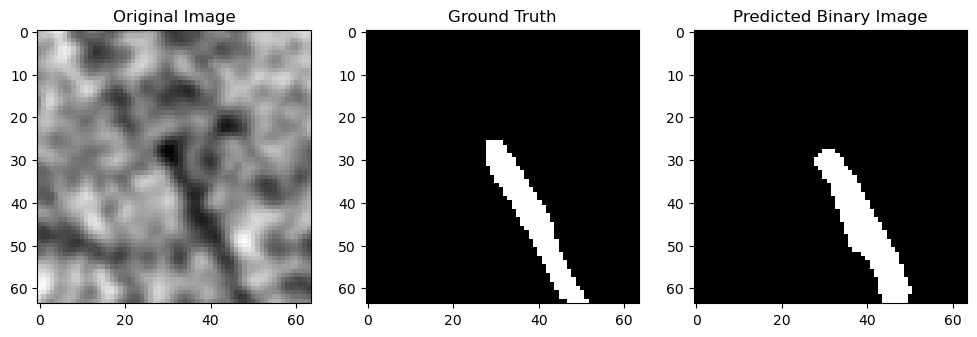

1/1 [==============================] - 0s 11ms/step
Epoch 371: Mean IoU on validation data = 0.6592
25/25 [==============================] - 0s 16ms/step - loss: 0.2085 - accuracy: 0.9593 - val_loss: 0.1970 - val_accuracy: 0.9651 - lr: 5.0000e-05 - val_iou: 0.6592
Epoch 372/1000
1/1 [==============================] - 0s 10ms/step
Epoch 372: Mean IoU on validation data = 0.6551
25/25 [==============================] - 0s 8ms/step - loss: 0.2139 - accuracy: 0.9578 - val_loss: 0.2004 - val_accuracy: 0.9644 - lr: 5.0000e-05 - val_iou: 0.6551
Epoch 373/1000
1/1 [==============================] - 0s 10ms/step
Epoch 373: Mean IoU on validation data = 0.6641
25/25 [==============================] - 0s 8ms/step - loss: 0.2433 - accuracy: 0.9530 - val_loss: 0.1958 - val_accuracy: 0.9650 - lr: 5.0000e-05 - val_iou: 0.6641
Epoch 374/1000
1/1 [==============================] - 0s 9ms/step
Epoch 374: Mean IoU on validation data = 0.6385
25/25 [==============================] - 0s 8ms/step - loss: 0.

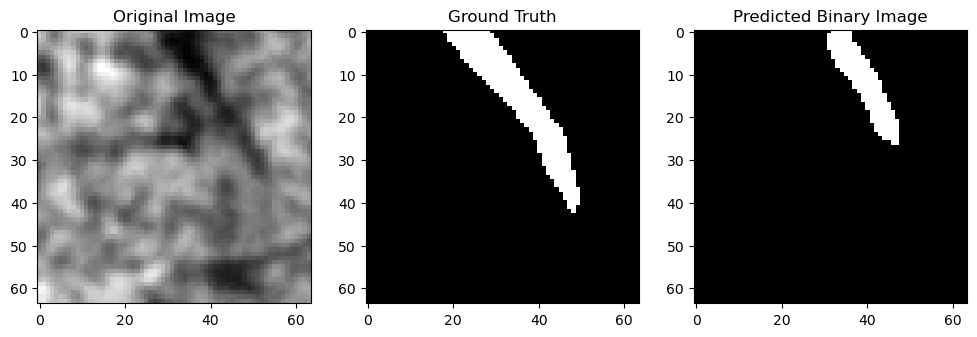

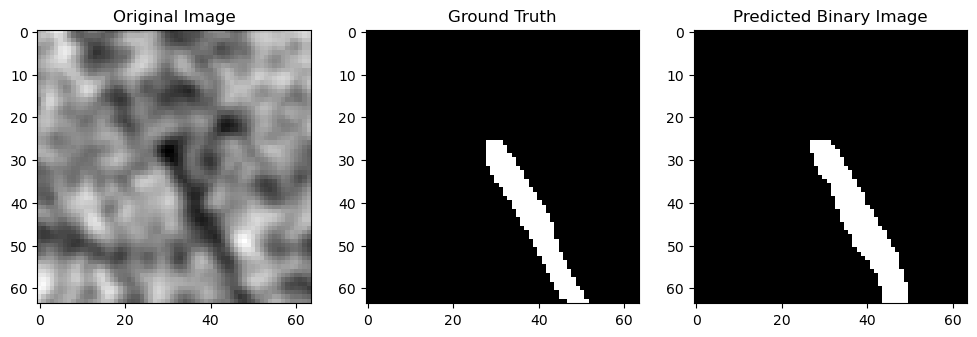

1/1 [==============================] - 0s 11ms/step
Epoch 381: Mean IoU on validation data = 0.6581
25/25 [==============================] - 0s 16ms/step - loss: 0.2138 - accuracy: 0.9601 - val_loss: 0.2040 - val_accuracy: 0.9659 - lr: 5.0000e-05 - val_iou: 0.6581
Epoch 382/1000
1/1 [==============================] - 0s 11ms/step
Epoch 382: Mean IoU on validation data = 0.6458
25/25 [==============================] - 0s 8ms/step - loss: 0.2095 - accuracy: 0.9594 - val_loss: 0.2110 - val_accuracy: 0.9637 - lr: 5.0000e-05 - val_iou: 0.6458
Epoch 383/1000
1/1 [==============================] - 0s 10ms/step
Epoch 383: Mean IoU on validation data = 0.6628
25/25 [==============================] - 0s 8ms/step - loss: 0.2130 - accuracy: 0.9595 - val_loss: 0.1989 - val_accuracy: 0.9654 - lr: 5.0000e-05 - val_iou: 0.6628
Epoch 384/1000
1/1 [==============================] - 0s 10ms/step
Epoch 384: Mean IoU on validation data = 0.6368
25/25 [==============================] - 0s 8ms/step - loss: 0

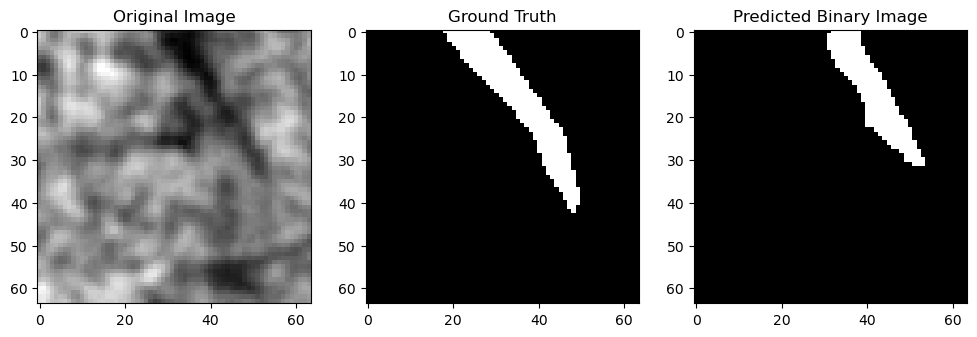

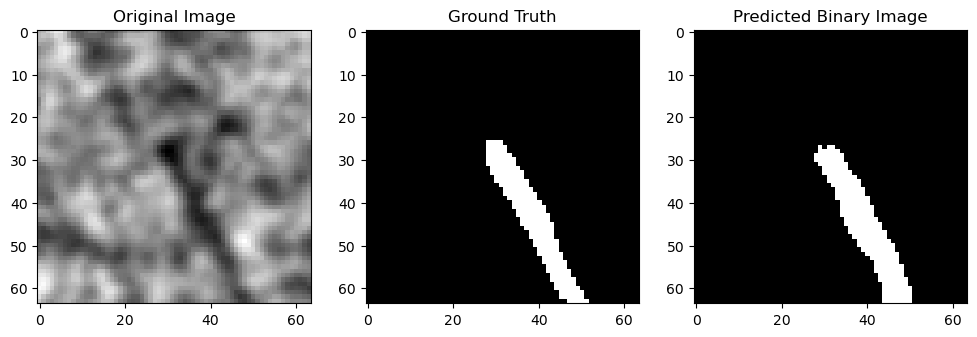

1/1 [==============================] - 0s 11ms/step
Epoch 391: Mean IoU on validation data = 0.6726
25/25 [==============================] - 0s 16ms/step - loss: 0.2399 - accuracy: 0.9562 - val_loss: 0.1898 - val_accuracy: 0.9681 - lr: 5.0000e-05 - val_iou: 0.6726
Epoch 392/1000
1/1 [==============================] - 0s 10ms/step
Epoch 392: Mean IoU on validation data = 0.6592
25/25 [==============================] - 0s 8ms/step - loss: 0.2066 - accuracy: 0.9601 - val_loss: 0.2007 - val_accuracy: 0.9671 - lr: 5.0000e-05 - val_iou: 0.6592
Epoch 393/1000
1/1 [==============================] - 0s 10ms/step
Epoch 393: Mean IoU on validation data = 0.6302
25/25 [==============================] - 0s 8ms/step - loss: 0.2323 - accuracy: 0.9573 - val_loss: 0.2197 - val_accuracy: 0.9645 - lr: 5.0000e-05 - val_iou: 0.6302
Epoch 394/1000
1/1 [==============================] - 0s 10ms/step
Epoch 394: Mean IoU on validation data = 0.6733
25/25 [==============================] - 0s 8ms/step - loss: 0

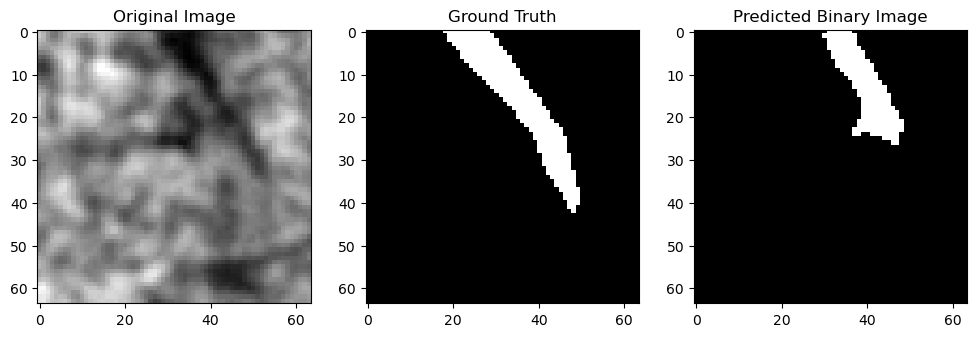

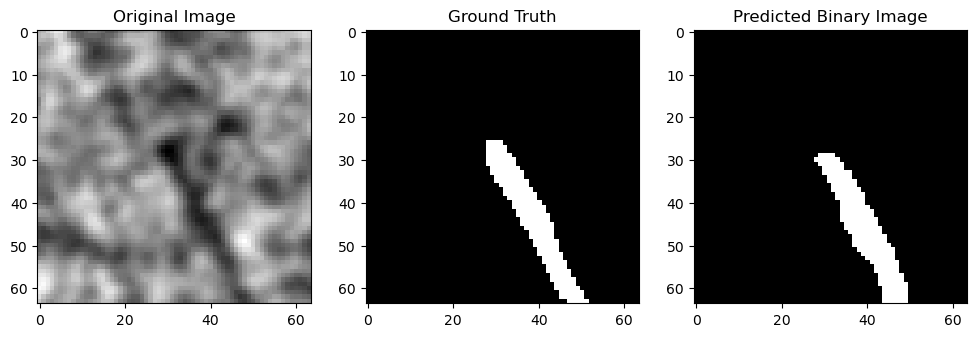

1/1 [==============================] - 0s 11ms/step
Epoch 401: Mean IoU on validation data = 0.6485
25/25 [==============================] - 0s 16ms/step - loss: 0.2264 - accuracy: 0.9557 - val_loss: 0.2078 - val_accuracy: 0.9648 - lr: 5.0000e-05 - val_iou: 0.6485
Epoch 402/1000
1/1 [==============================] - 0s 10ms/step
Epoch 402: Mean IoU on validation data = 0.6417
25/25 [==============================] - 0s 8ms/step - loss: 0.2334 - accuracy: 0.9559 - val_loss: 0.2124 - val_accuracy: 0.9640 - lr: 5.0000e-05 - val_iou: 0.6417
Epoch 403/1000
1/1 [==============================] - 0s 9ms/step
Epoch 403: Mean IoU on validation data = 0.6491
25/25 [==============================] - 0s 8ms/step - loss: 0.1940 - accuracy: 0.9624 - val_loss: 0.2084 - val_accuracy: 0.9647 - lr: 5.0000e-05 - val_iou: 0.6491
Epoch 404/1000
1/1 [==============================] - 0s 10ms/step
Epoch 404: Mean IoU on validation data = 0.6490
25/25 [==============================] - 0s 8ms/step - loss: 0.

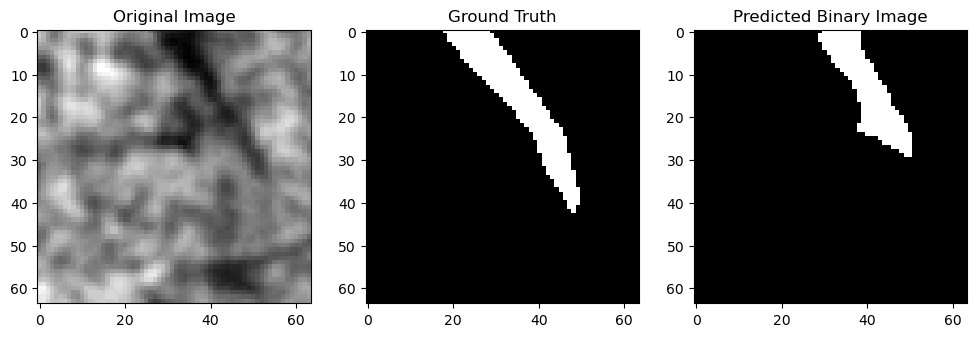

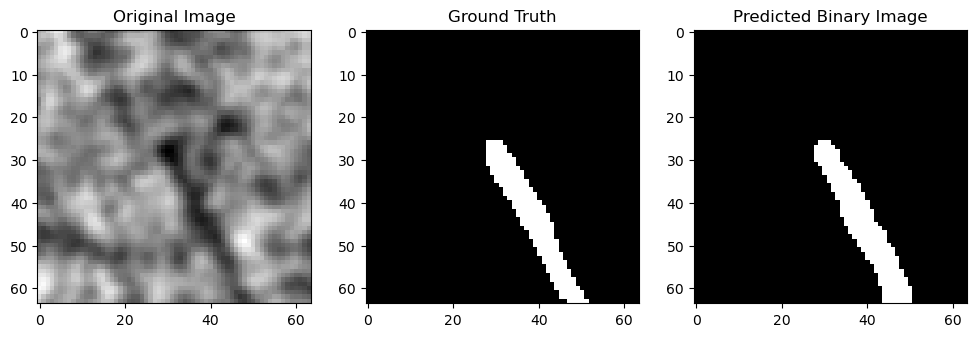

1/1 [==============================] - 0s 10ms/step
Epoch 411: Mean IoU on validation data = 0.6642
25/25 [==============================] - 0s 15ms/step - loss: 0.2216 - accuracy: 0.9557 - val_loss: 0.1995 - val_accuracy: 0.9656 - lr: 5.0000e-05 - val_iou: 0.6642
Epoch 412/1000
1/1 [==============================] - 0s 9ms/step
Epoch 412: Mean IoU on validation data = 0.6704
25/25 [==============================] - 0s 7ms/step - loss: 0.2006 - accuracy: 0.9601 - val_loss: 0.1937 - val_accuracy: 0.9668 - lr: 5.0000e-05 - val_iou: 0.6704
Epoch 413/1000
1/1 [==============================] - 0s 9ms/step
Epoch 413: Mean IoU on validation data = 0.6772
25/25 [==============================] - 0s 7ms/step - loss: 0.2384 - accuracy: 0.9538 - val_loss: 0.1903 - val_accuracy: 0.9670 - lr: 5.0000e-05 - val_iou: 0.6772
Epoch 414/1000
1/1 [==============================] - 0s 10ms/step
Epoch 414: Mean IoU on validation data = 0.6619
25/25 [==============================] - 0s 7ms/step - loss: 0.2

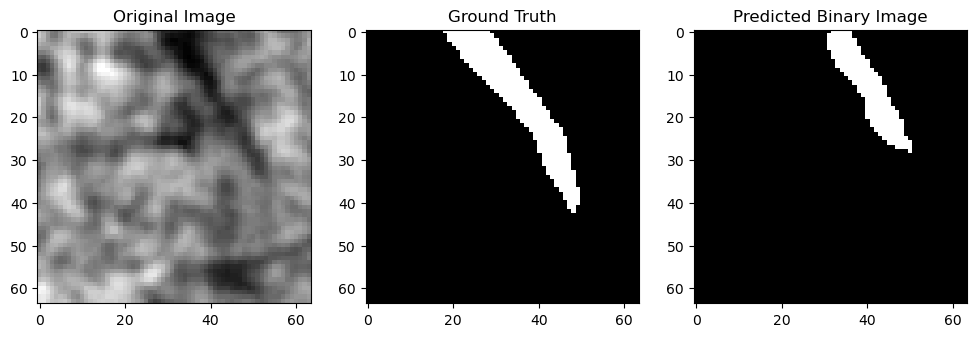

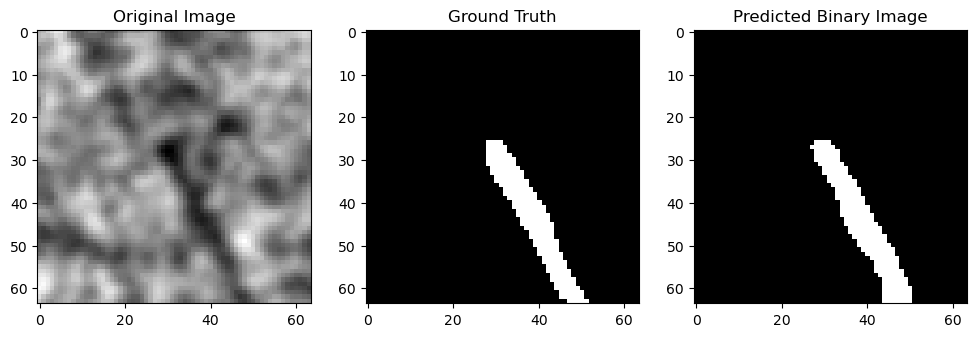

1/1 [==============================] - 0s 10ms/step
Epoch 421: Mean IoU on validation data = 0.6583
25/25 [==============================] - 0s 16ms/step - loss: 0.2237 - accuracy: 0.9576 - val_loss: 0.2020 - val_accuracy: 0.9661 - lr: 2.5000e-05 - val_iou: 0.6583
Epoch 422/1000
1/1 [==============================] - 0s 10ms/step
Epoch 422: Mean IoU on validation data = 0.6624
25/25 [==============================] - 0s 8ms/step - loss: 0.2153 - accuracy: 0.9589 - val_loss: 0.1985 - val_accuracy: 0.9660 - lr: 2.5000e-05 - val_iou: 0.6624
Epoch 423/1000
1/1 [==============================] - 0s 10ms/step
Epoch 423: Mean IoU on validation data = 0.6574
25/25 [==============================] - 0s 8ms/step - loss: 0.2328 - accuracy: 0.9554 - val_loss: 0.2019 - val_accuracy: 0.9650 - lr: 2.5000e-05 - val_iou: 0.6574
Epoch 424/1000
1/1 [==============================] - 0s 10ms/step
Epoch 424: Mean IoU on validation data = 0.6490
25/25 [==============================] - 0s 7ms/step - loss: 0

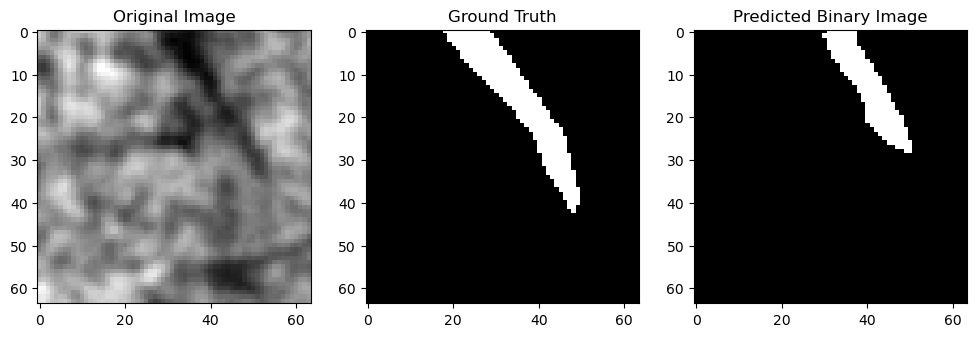

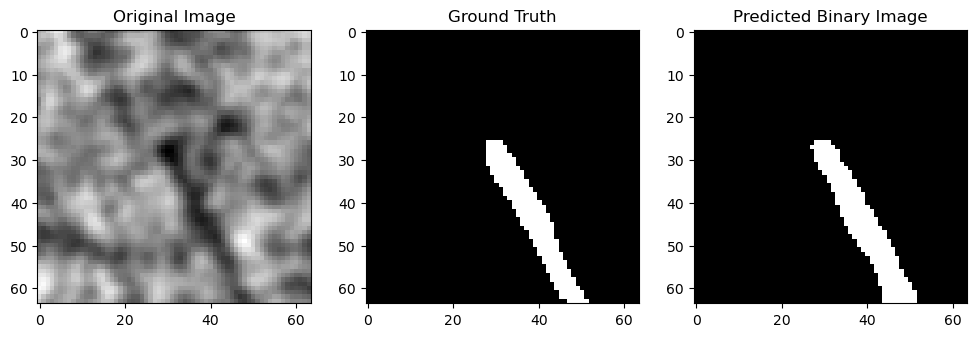

1/1 [==============================] - 0s 12ms/step
Epoch 431: Mean IoU on validation data = 0.6434
25/25 [==============================] - 1s 26ms/step - loss: 0.2412 - accuracy: 0.9555 - val_loss: 0.2118 - val_accuracy: 0.9645 - lr: 2.5000e-05 - val_iou: 0.6434
Epoch 432/1000
1/1 [==============================] - 0s 11ms/step
Epoch 432: Mean IoU on validation data = 0.6470
25/25 [==============================] - 0s 8ms/step - loss: 0.1945 - accuracy: 0.9626 - val_loss: 0.2088 - val_accuracy: 0.9647 - lr: 2.5000e-05 - val_iou: 0.6470
Epoch 433/1000
1/1 [==============================] - 0s 11ms/step
Epoch 433: Mean IoU on validation data = 0.6445
25/25 [==============================] - 0s 8ms/step - loss: 0.2071 - accuracy: 0.9598 - val_loss: 0.2115 - val_accuracy: 0.9645 - lr: 2.5000e-05 - val_iou: 0.6445
Epoch 434/1000
1/1 [==============================] - 0s 11ms/step
Epoch 434: Mean IoU on validation data = 0.6381
25/25 [==============================] - 0s 8ms/step - loss: 0

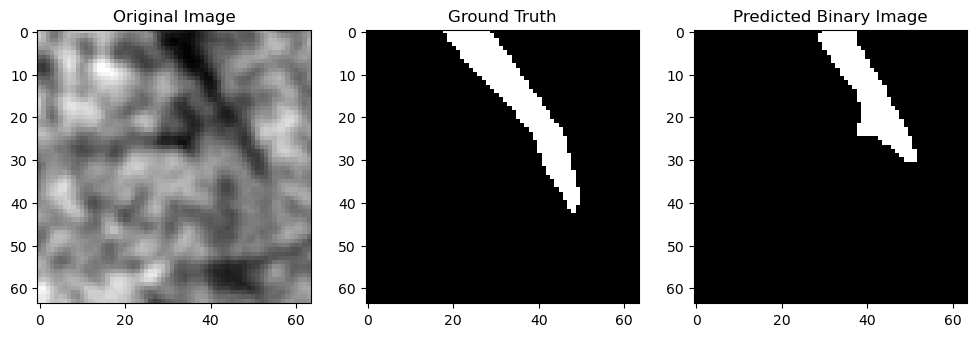

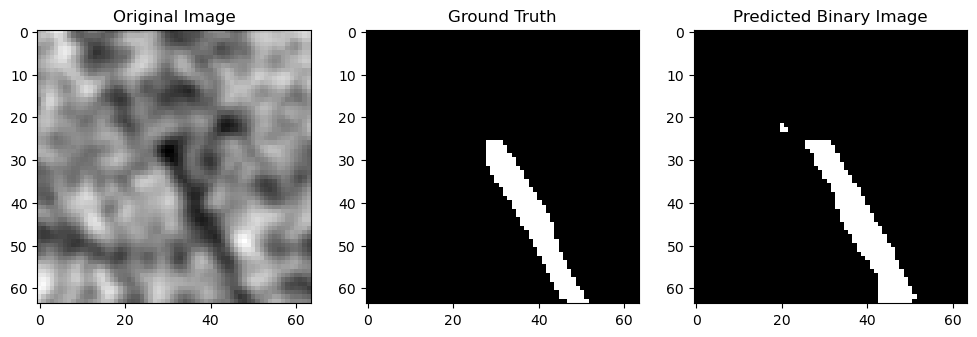

1/1 [==============================] - 0s 11ms/step
Epoch 441: Mean IoU on validation data = 0.6468
25/25 [==============================] - 0s 16ms/step - loss: 0.1913 - accuracy: 0.9637 - val_loss: 0.2098 - val_accuracy: 0.9650 - lr: 2.5000e-05 - val_iou: 0.6468
Epoch 442/1000
1/1 [==============================] - 0s 10ms/step
Epoch 442: Mean IoU on validation data = 0.6384
25/25 [==============================] - 0s 8ms/step - loss: 0.1925 - accuracy: 0.9619 - val_loss: 0.2149 - val_accuracy: 0.9641 - lr: 2.5000e-05 - val_iou: 0.6384
Epoch 443/1000
1/1 [==============================] - 0s 10ms/step
Epoch 443: Mean IoU on validation data = 0.6319
25/25 [==============================] - 0s 8ms/step - loss: 0.2200 - accuracy: 0.9569 - val_loss: 0.2194 - val_accuracy: 0.9636 - lr: 2.5000e-05 - val_iou: 0.6319
Epoch 444/1000
1/1 [==============================] - 0s 10ms/step
Epoch 444: Mean IoU on validation data = 0.6346
25/25 [==============================] - 0s 8ms/step - loss: 0

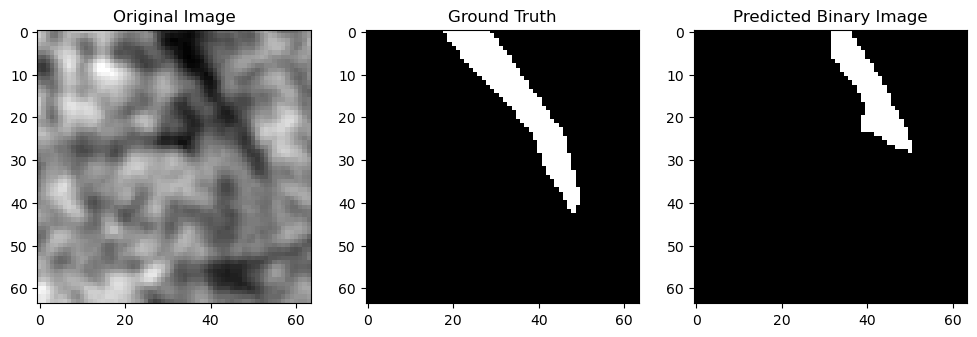

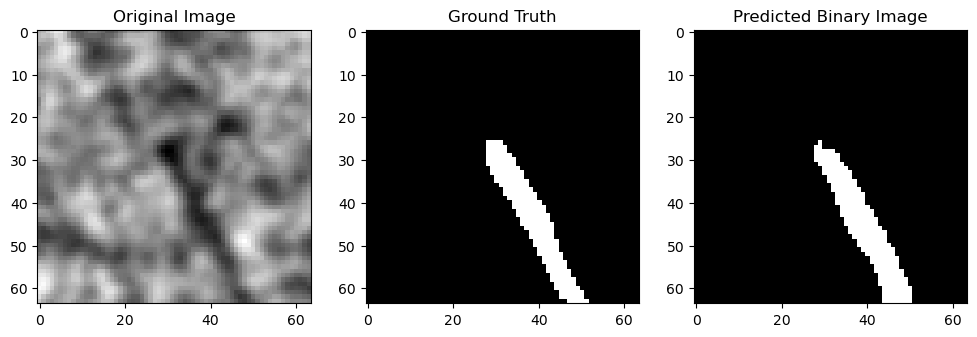

1/1 [==============================] - 0s 11ms/step
Epoch 451: Mean IoU on validation data = 0.6441
25/25 [==============================] - 0s 16ms/step - loss: 0.2304 - accuracy: 0.9559 - val_loss: 0.2126 - val_accuracy: 0.9639 - lr: 2.5000e-05 - val_iou: 0.6441
Epoch 452/1000
1/1 [==============================] - 0s 10ms/step
Epoch 452: Mean IoU on validation data = 0.6499
25/25 [==============================] - 0s 8ms/step - loss: 0.2005 - accuracy: 0.9614 - val_loss: 0.2093 - val_accuracy: 0.9647 - lr: 2.5000e-05 - val_iou: 0.6499
Epoch 453/1000
1/1 [==============================] - 0s 10ms/step
Epoch 453: Mean IoU on validation data = 0.6466
25/25 [==============================] - 0s 8ms/step - loss: 0.2473 - accuracy: 0.9523 - val_loss: 0.2102 - val_accuracy: 0.9644 - lr: 2.5000e-05 - val_iou: 0.6466
Epoch 454/1000
1/1 [==============================] - 0s 11ms/step
Epoch 454: Mean IoU on validation data = 0.6396
25/25 [==============================] - 0s 8ms/step - loss: 0

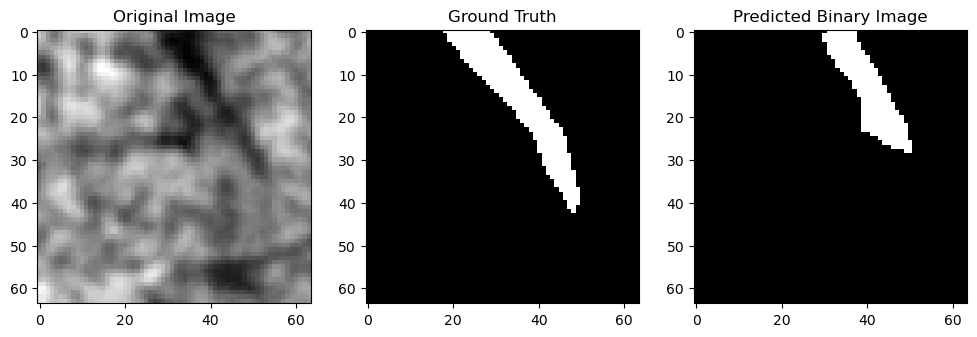

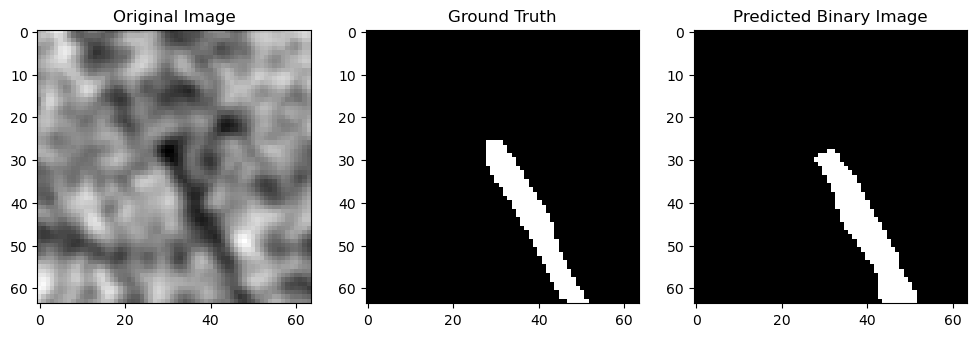

1/1 [==============================] - 0s 11ms/step
Epoch 461: Mean IoU on validation data = 0.6649
25/25 [==============================] - 0s 16ms/step - loss: 0.2183 - accuracy: 0.9563 - val_loss: 0.1964 - val_accuracy: 0.9665 - lr: 2.5000e-05 - val_iou: 0.6649
Epoch 462/1000
1/1 [==============================] - 0s 10ms/step
Epoch 462: Mean IoU on validation data = 0.6635
25/25 [==============================] - 0s 7ms/step - loss: 0.2096 - accuracy: 0.9603 - val_loss: 0.1965 - val_accuracy: 0.9661 - lr: 2.5000e-05 - val_iou: 0.6635
Epoch 463/1000
1/1 [==============================] - 0s 10ms/step
Epoch 463: Mean IoU on validation data = 0.6665
25/25 [==============================] - 0s 8ms/step - loss: 0.2129 - accuracy: 0.9579 - val_loss: 0.1943 - val_accuracy: 0.9664 - lr: 2.5000e-05 - val_iou: 0.6665
Epoch 464/1000
1/1 [==============================] - 0s 10ms/step
Epoch 464: Mean IoU on validation data = 0.6604
25/25 [==============================] - 0s 8ms/step - loss: 0

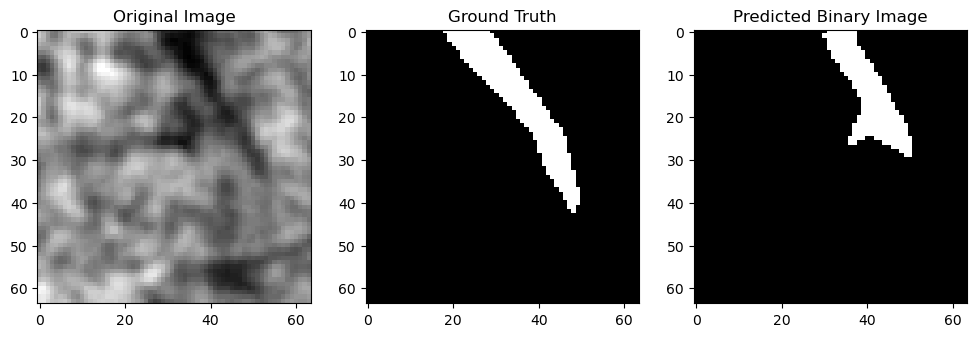

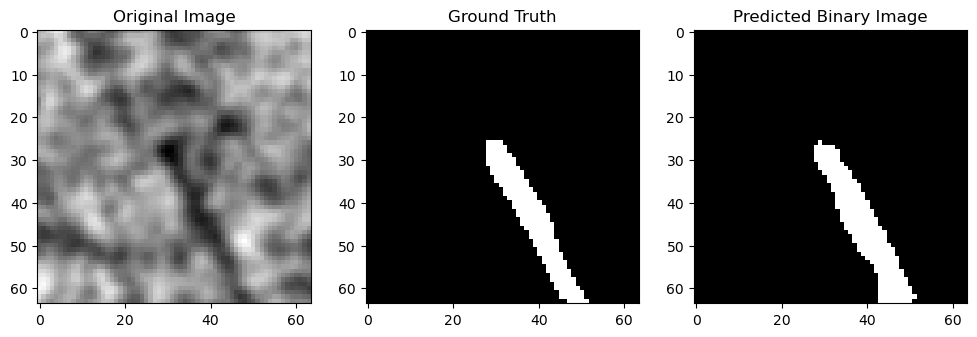

1/1 [==============================] - 0s 11ms/step
Epoch 471: Mean IoU on validation data = 0.6542
25/25 [==============================] - 0s 16ms/step - loss: 0.2188 - accuracy: 0.9576 - val_loss: 0.2039 - val_accuracy: 0.9651 - lr: 1.2500e-05 - val_iou: 0.6542
Epoch 472/1000
1/1 [==============================] - 0s 10ms/step
Epoch 472: Mean IoU on validation data = 0.6562
25/25 [==============================] - 0s 7ms/step - loss: 0.2083 - accuracy: 0.9584 - val_loss: 0.2026 - val_accuracy: 0.9655 - lr: 1.2500e-05 - val_iou: 0.6562
Epoch 473/1000
1/1 [==============================] - 0s 10ms/step
Epoch 473: Mean IoU on validation data = 0.6505
25/25 [==============================] - 0s 8ms/step - loss: 0.2072 - accuracy: 0.9612 - val_loss: 0.2064 - val_accuracy: 0.9649 - lr: 1.2500e-05 - val_iou: 0.6505
Epoch 474/1000
1/1 [==============================] - 0s 10ms/step
Epoch 474: Mean IoU on validation data = 0.6565
25/25 [==============================] - 0s 8ms/step - loss: 0

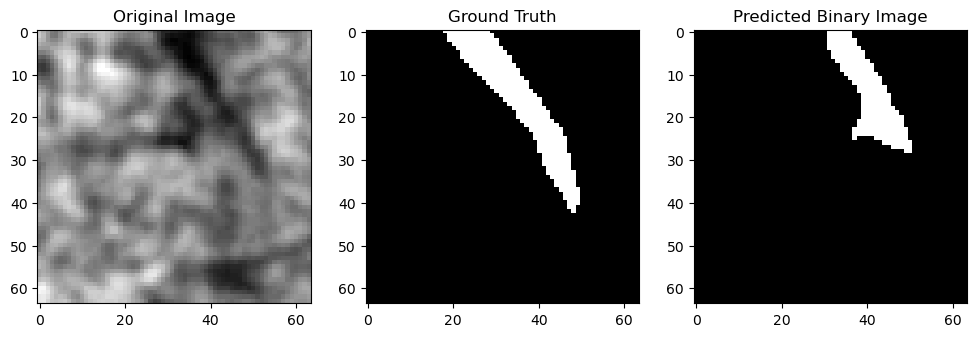

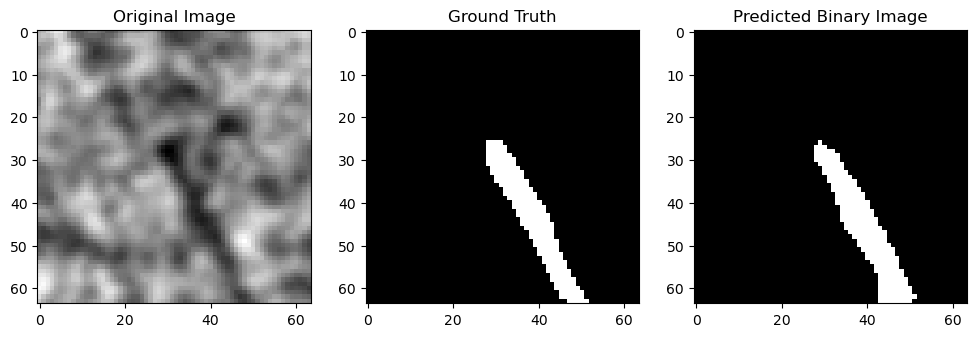

1/1 [==============================] - 0s 10ms/step
Epoch 481: Mean IoU on validation data = 0.6545
25/25 [==============================] - 0s 15ms/step - loss: 0.2167 - accuracy: 0.9557 - val_loss: 0.2045 - val_accuracy: 0.9654 - lr: 1.2500e-05 - val_iou: 0.6545
Epoch 482/1000
1/1 [==============================] - 0s 9ms/step
Epoch 482: Mean IoU on validation data = 0.6548
25/25 [==============================] - 0s 7ms/step - loss: 0.2051 - accuracy: 0.9589 - val_loss: 0.2042 - val_accuracy: 0.9655 - lr: 1.2500e-05 - val_iou: 0.6548
Epoch 483/1000
1/1 [==============================] - 0s 9ms/step
Epoch 483: Mean IoU on validation data = 0.6624
25/25 [==============================] - 0s 8ms/step - loss: 0.2143 - accuracy: 0.9585 - val_loss: 0.1987 - val_accuracy: 0.9660 - lr: 1.2500e-05 - val_iou: 0.6624
Epoch 484/1000
1/1 [==============================] - 0s 10ms/step
Epoch 484: Mean IoU on validation data = 0.6550
25/25 [==============================] - 0s 7ms/step - loss: 0.2

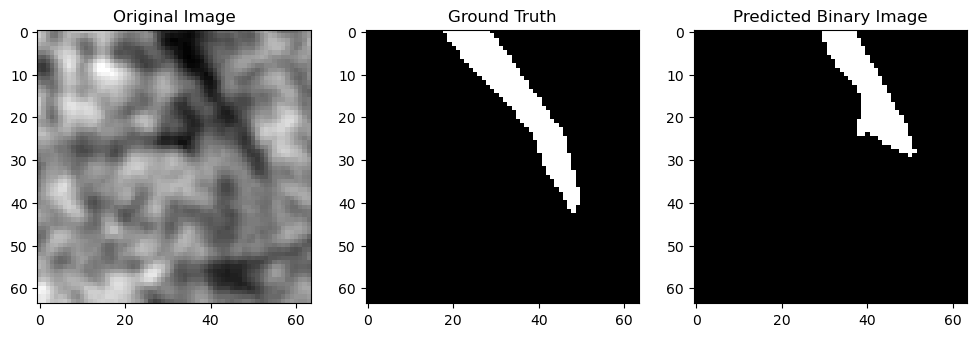

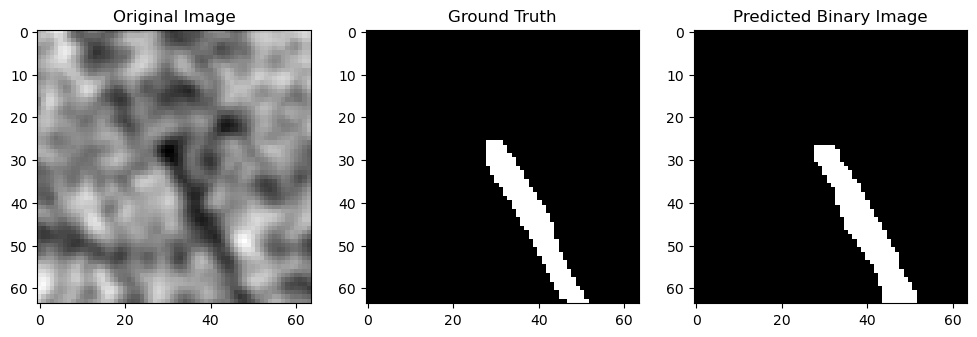

1/1 [==============================] - 0s 10ms/step
Epoch 491: Mean IoU on validation data = 0.6717
25/25 [==============================] - 0s 15ms/step - loss: 0.2130 - accuracy: 0.9604 - val_loss: 0.1925 - val_accuracy: 0.9670 - lr: 1.2500e-05 - val_iou: 0.6717
Epoch 492/1000
1/1 [==============================] - 0s 9ms/step
Epoch 492: Mean IoU on validation data = 0.6668
25/25 [==============================] - 0s 7ms/step - loss: 0.1997 - accuracy: 0.9604 - val_loss: 0.1945 - val_accuracy: 0.9668 - lr: 1.2500e-05 - val_iou: 0.6668
Epoch 493/1000
1/1 [==============================] - 0s 9ms/step
Epoch 493: Mean IoU on validation data = 0.6657
25/25 [==============================] - 0s 7ms/step - loss: 0.2199 - accuracy: 0.9574 - val_loss: 0.1955 - val_accuracy: 0.9667 - lr: 1.2500e-05 - val_iou: 0.6657
Epoch 494/1000
1/1 [==============================] - 0s 9ms/step
Epoch 494: Mean IoU on validation data = 0.6738
25/25 [==============================] - 0s 7ms/step - loss: 0.20

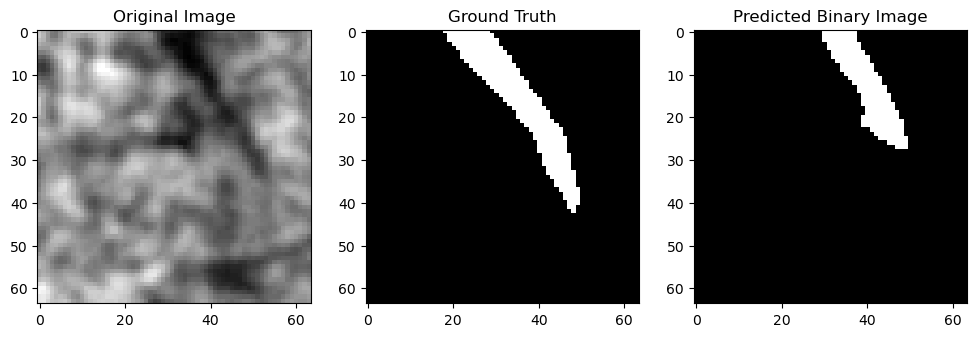

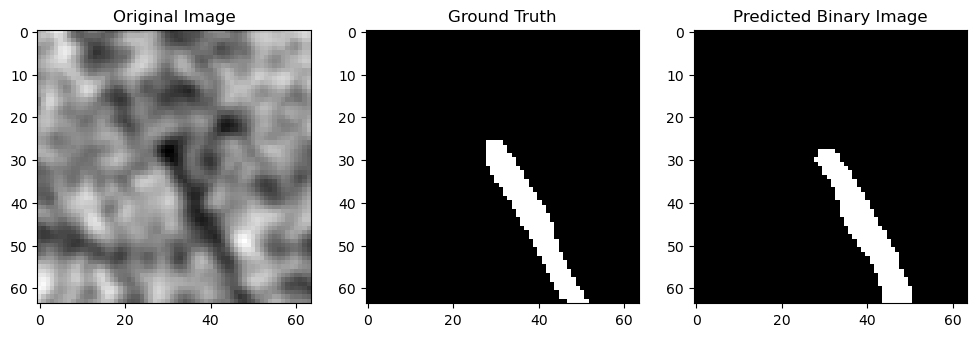

1/1 [==============================] - 0s 10ms/step
Epoch 501: Mean IoU on validation data = 0.6557
25/25 [==============================] - 0s 15ms/step - loss: 0.2102 - accuracy: 0.9591 - val_loss: 0.2036 - val_accuracy: 0.9660 - lr: 1.2500e-05 - val_iou: 0.6557
Epoch 502/1000
1/1 [==============================] - 0s 9ms/step
Epoch 502: Mean IoU on validation data = 0.6631
25/25 [==============================] - 0s 7ms/step - loss: 0.2103 - accuracy: 0.9580 - val_loss: 0.1993 - val_accuracy: 0.9669 - lr: 1.2500e-05 - val_iou: 0.6631
Epoch 503/1000
1/1 [==============================] - 0s 9ms/step
Epoch 503: Mean IoU on validation data = 0.6648
25/25 [==============================] - 0s 7ms/step - loss: 0.1985 - accuracy: 0.9603 - val_loss: 0.1976 - val_accuracy: 0.9668 - lr: 1.2500e-05 - val_iou: 0.6648
Epoch 504/1000
1/1 [==============================] - 0s 9ms/step
Epoch 504: Mean IoU on validation data = 0.6681
25/25 [==============================] - 0s 8ms/step - loss: 0.21

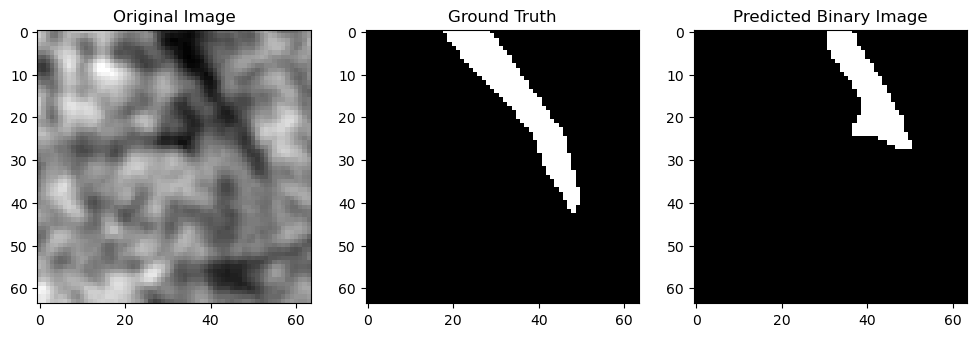

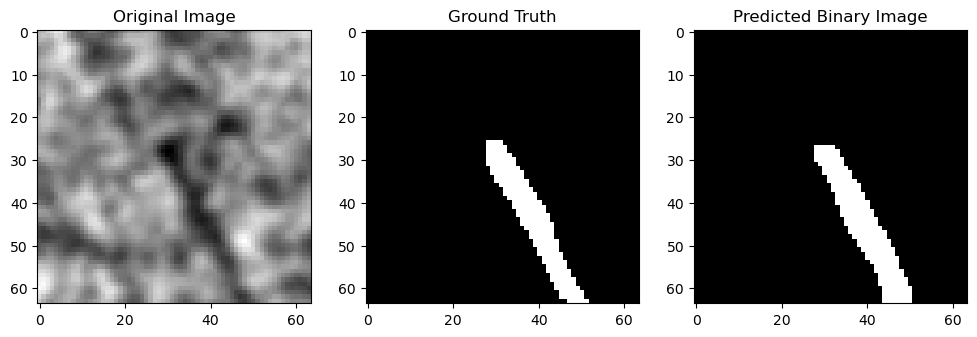

1/1 [==============================] - 0s 12ms/step
Epoch 511: Mean IoU on validation data = 0.6582
25/25 [==============================] - 1s 26ms/step - loss: 0.2224 - accuracy: 0.9565 - val_loss: 0.2032 - val_accuracy: 0.9653 - lr: 1.2500e-05 - val_iou: 0.6582
Epoch 512/1000
1/1 [==============================] - 0s 11ms/step
Epoch 512: Mean IoU on validation data = 0.6602
25/25 [==============================] - 0s 8ms/step - loss: 0.2064 - accuracy: 0.9592 - val_loss: 0.2020 - val_accuracy: 0.9651 - lr: 1.2500e-05 - val_iou: 0.6602
Epoch 513/1000
1/1 [==============================] - 0s 11ms/step
Epoch 513: Mean IoU on validation data = 0.6539
25/25 [==============================] - 0s 8ms/step - loss: 0.2201 - accuracy: 0.9593 - val_loss: 0.2039 - val_accuracy: 0.9649 - lr: 1.2500e-05 - val_iou: 0.6539
Epoch 514/1000
1/1 [==============================] - 0s 10ms/step
Epoch 514: Mean IoU on validation data = 0.6545
25/25 [==============================] - 0s 8ms/step - loss: 0

In [133]:
visualization_callback = VisualizationCallback(X_train, y_train)
iou_callback = IoUCallback(X_test, y_test)
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
earlyStopping = EarlyStopping(monitor='val_loss', patience=150, verbose=0, mode='min')
mcp_save = ModelCheckpoint('./models/AttentionUnet.keras', save_best_only=True, monitor='val_loss', mode='min')
reduce_lr_loss = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=50, verbose=1, epsilon=1e-4, mode='min')

# history = model.fit(X_train, y_train, 
#                     batch_size = 4, 
#                     verbose=1, 
#                     epochs=20, 
#                     validation_data=(X_test, y_test), 
#                     shuffle=False,
#                     callbacks=[earlyStopping, mcp_save, reduce_lr_loss, visualization_callback])

history = model.fit(train_generator,
                    steps_per_epoch=len(X_train) // 4,
                    epochs=1000,
                    validation_data=(X_test, y_test),
                    callbacks=[earlyStopping, mcp_save, reduce_lr_loss, visualization_callback, iou_callback])

In [134]:
img, msk = next(train_generator)

# print(msk)

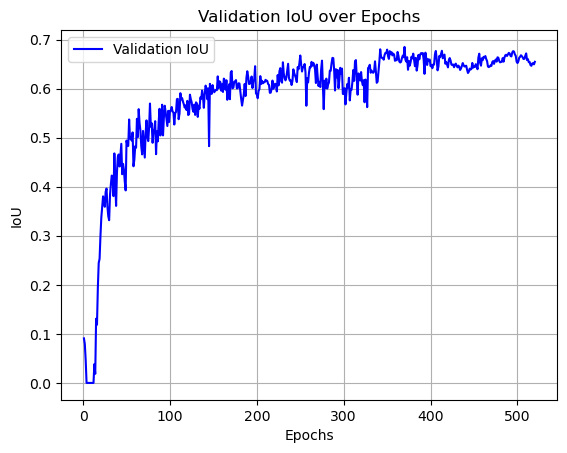

In [135]:
import matplotlib.pyplot as plt

# 提取 IoU 和其他歷史數據
epochs = range(1, len(history.history['val_iou']) + 1)
val_iou = history.history['val_iou']

# 繪製 IoU 隨著 epoch 變化的折線圖
plt.plot(epochs, val_iou, 'b', label='Validation IoU')
plt.title('Validation IoU over Epochs')
plt.xlabel('Epochs')
plt.ylabel('IoU')
plt.legend()
plt.grid(True)

# 顯示圖表
plt.show()


In [136]:
#Save the model for future use
# model.save('/kaggle/working/segment_Unet.hdf5')

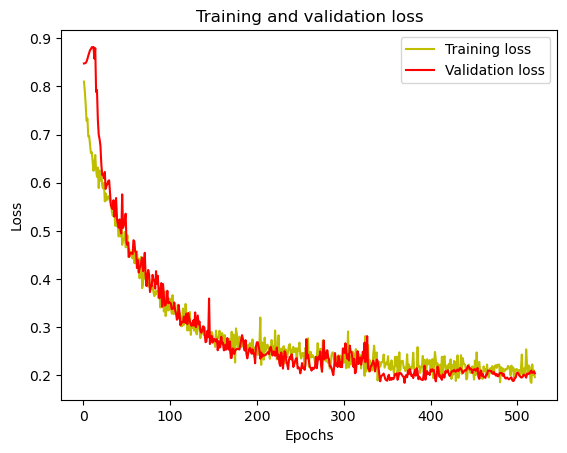

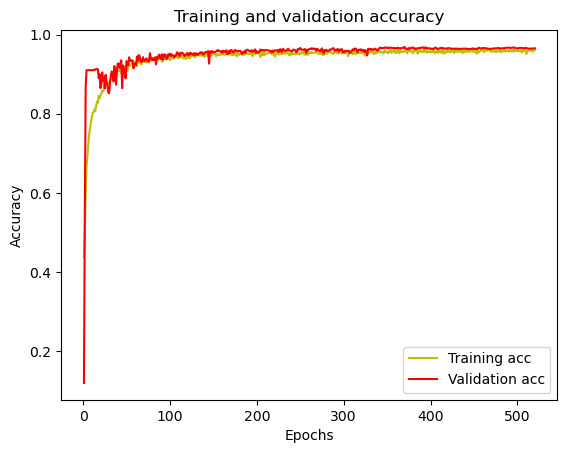

In [137]:
#plot the training and validation accuracy and loss at each epoch
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [138]:
#Load previously saved model
from keras.models import load_model
model = load_model("./models/AttentionUnet.keras", compile=False)
        

In [139]:
#IOU
y_pred=model.predict(X_test)
y_pred_thresholded = y_pred > 0.5
print(y_pred.max())
print(y_pred.min())

1/1 [==============================] - 0s 153ms/step
1.0
1.3688039e-07


In [140]:
from tensorflow.keras.metrics import MeanIoU

In [141]:
n_classes = 2
IOU_keras = MeanIoU(num_classes=n_classes)  
IOU_keras.update_state(y_pred_thresholded, y_test)
print("Mean IoU =", IOU_keras.result().numpy())

Mean IoU = 0.8302268


(1, 64, 64, 1)
1/1 [==============================] - 0s 11ms/step
(64, 64)


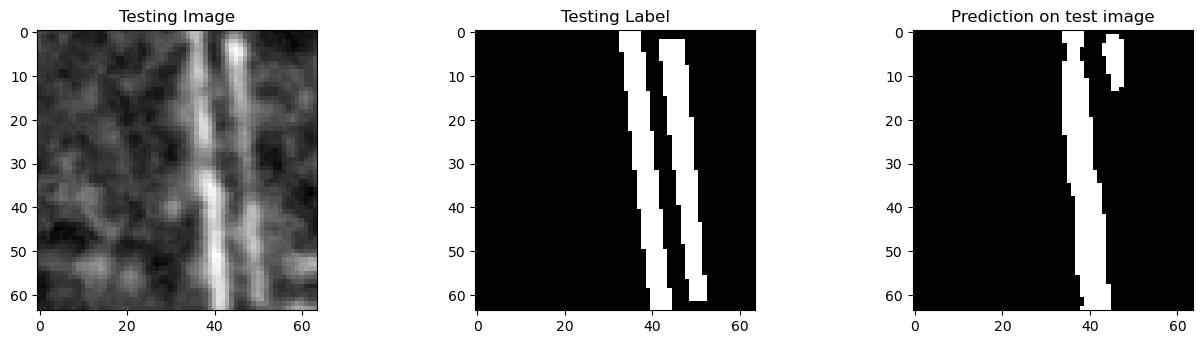

(1, 64, 64, 1)
1/1 [==============================] - 0s 11ms/step
(64, 64)


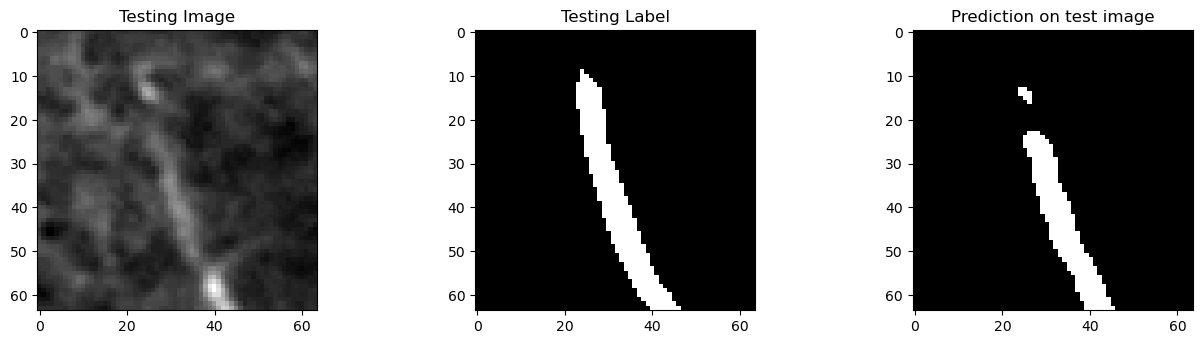

(1, 64, 64, 1)
1/1 [==============================] - 0s 10ms/step
(64, 64)


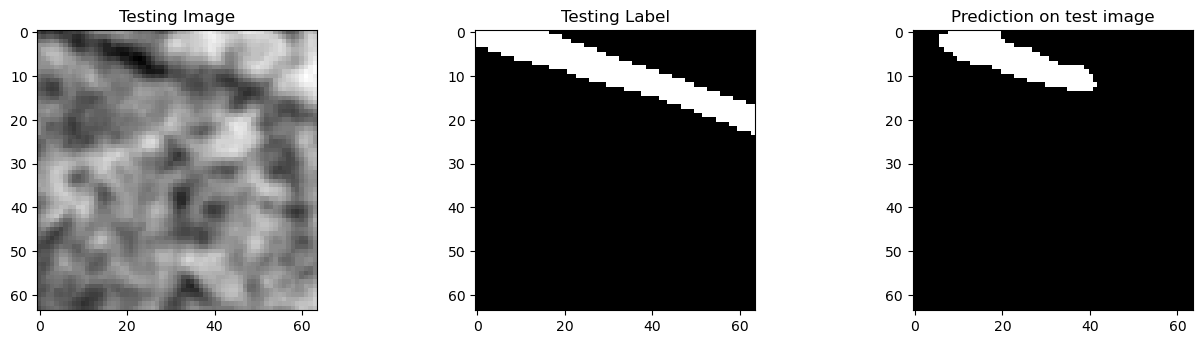

(1, 64, 64, 1)
1/1 [==============================] - 0s 11ms/step
(64, 64)


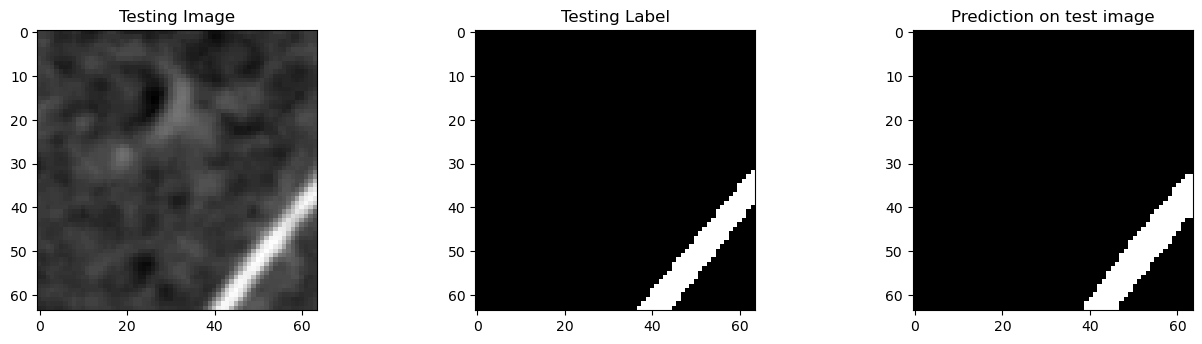

(1, 64, 64, 1)
1/1 [==============================] - 0s 10ms/step
(64, 64)


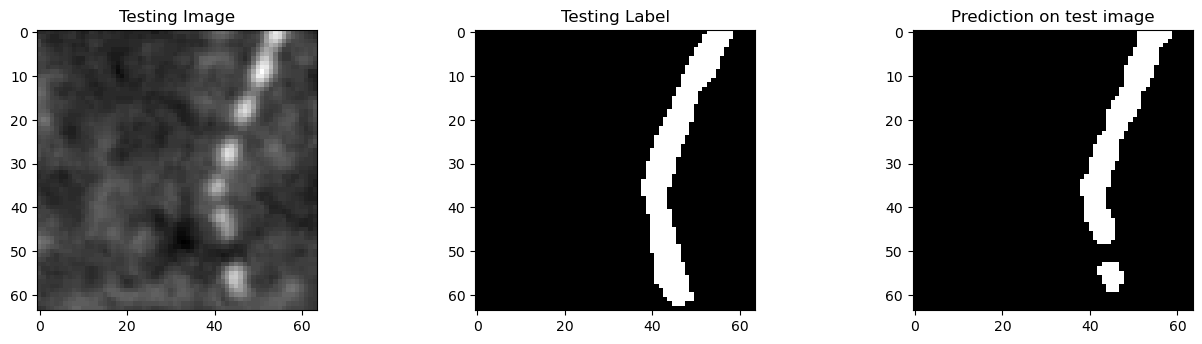

(1, 64, 64, 1)
1/1 [==============================] - 0s 10ms/step
(64, 64)


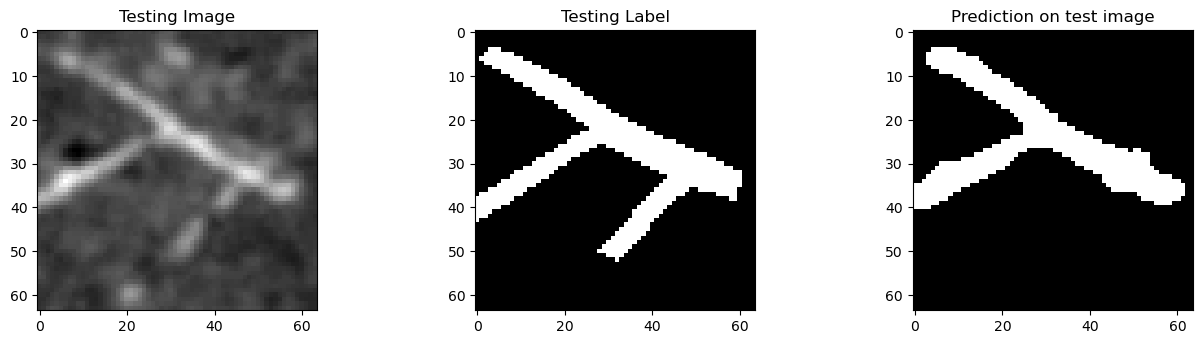

(1, 64, 64, 1)
1/1 [==============================] - 0s 10ms/step
(64, 64)


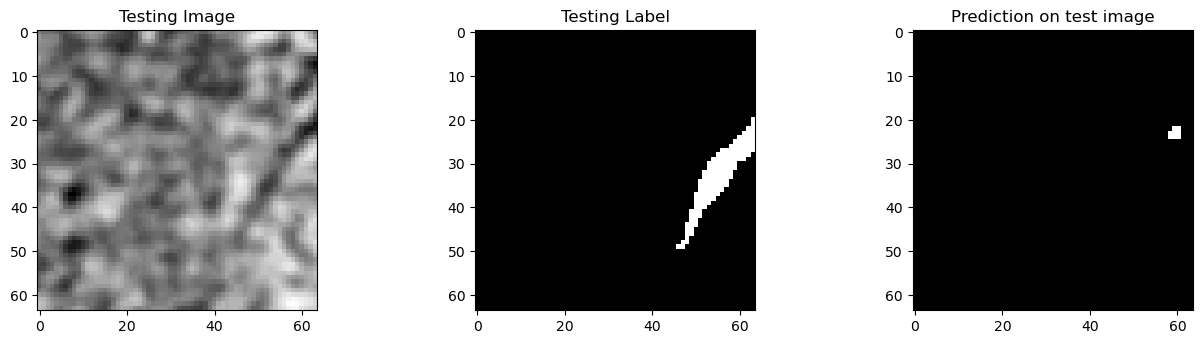

(1, 64, 64, 1)
1/1 [==============================] - 0s 10ms/step
(64, 64)


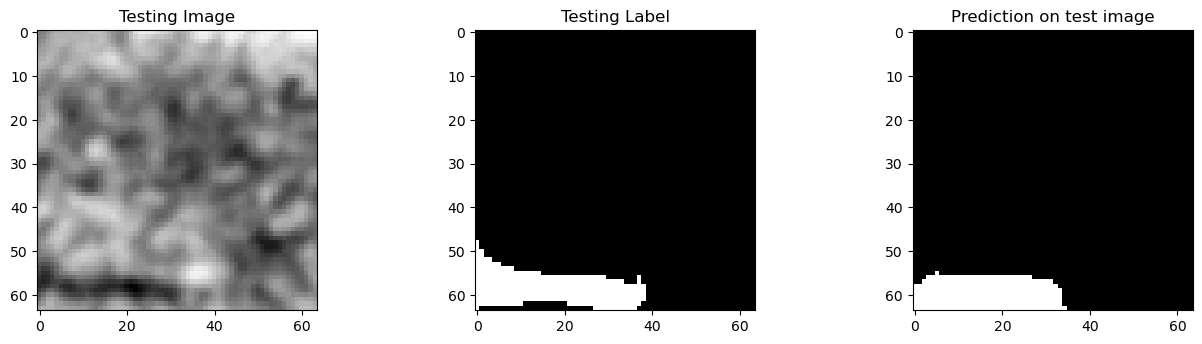

(1, 64, 64, 1)
1/1 [==============================] - 0s 10ms/step
(64, 64)


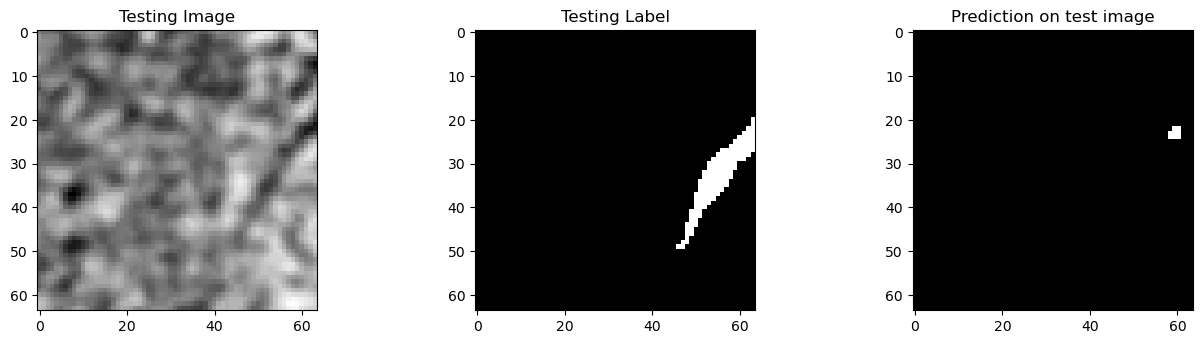

(1, 64, 64, 1)
1/1 [==============================] - 0s 10ms/step
(64, 64)


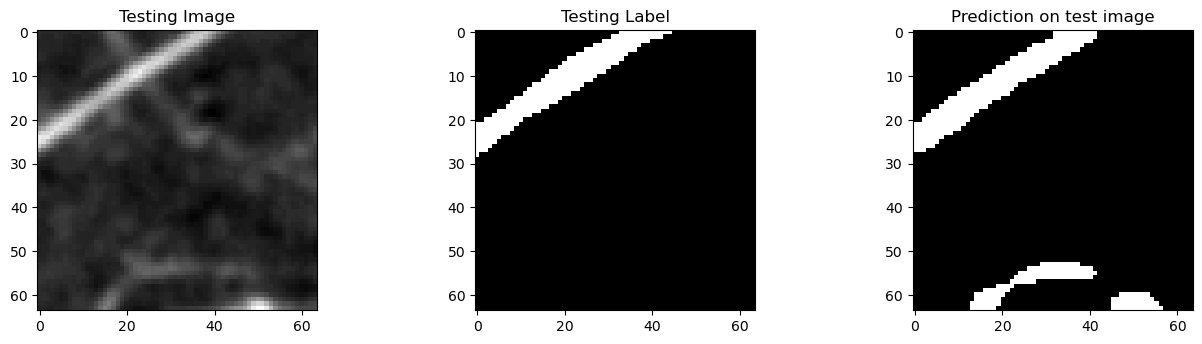

In [142]:
threshold = 0.5
test_img_list = [random.randint(0, len(X_test)-1) for _ in range(10)]
for test_img_number in test_img_list:
    img = X_test[test_img_number]
    ground_truth=y_test[test_img_number]
    test_img_input=np.expand_dims(img, 0)
    print(test_img_input.shape)
    prediction = (model.predict(test_img_input)[0,:,:,0] > threshold).astype(np.uint8)
    print(prediction.shape)

    plt.figure(figsize=(16, 8))
    plt.subplot(231)
    plt.title('Testing Image')
    plt.imshow(img[:,:,0], cmap='gray')
    plt.subplot(232)
    plt.title('Testing Label')
    plt.imshow(ground_truth[:,:,0], cmap='gray')
    plt.subplot(233)
    plt.title('Prediction on test image')
    plt.imshow(prediction, cmap='gray')

    plt.show()

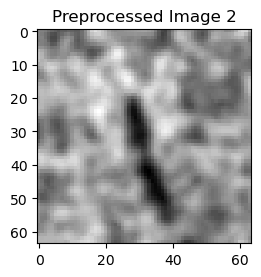

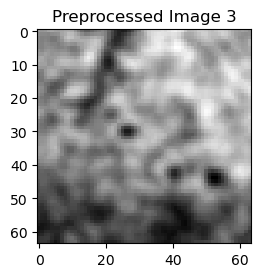

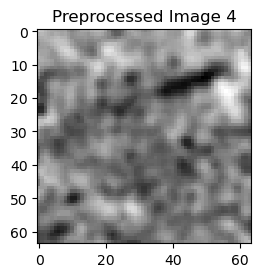

In [143]:
test_image_names = glob.glob(f"{test_directory}/*.png")
test_image = image_preprocessing(test_image_names, 'png')
tst_image_dataset = np.array(test_image)
tst_image_dataset = np.expand_dims(tst_image_dataset, axis=3)
tst_image_dataset = tst_image_dataset/255.0
test_img_list = [random.randint(0, len(tst_image_dataset)-1) for _ in range(20)]


(1, 64, 64, 1)
1/1 [==============================] - 0s 10ms/step
(64, 64)


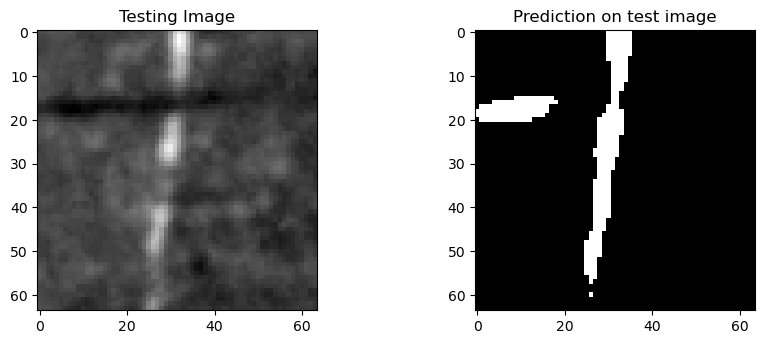

(1, 64, 64, 1)
1/1 [==============================] - 0s 10ms/step
(64, 64)


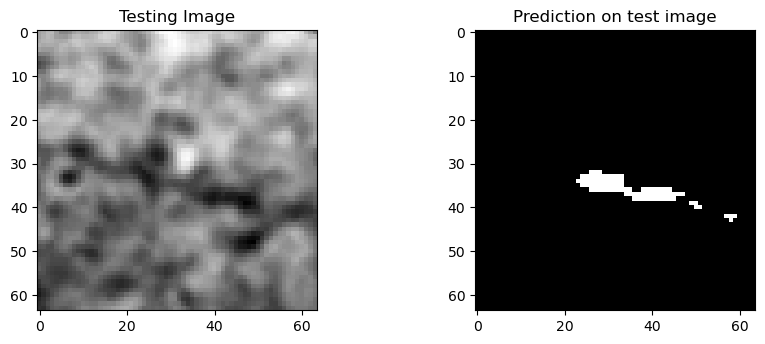

(1, 64, 64, 1)
1/1 [==============================] - 0s 10ms/step
(64, 64)


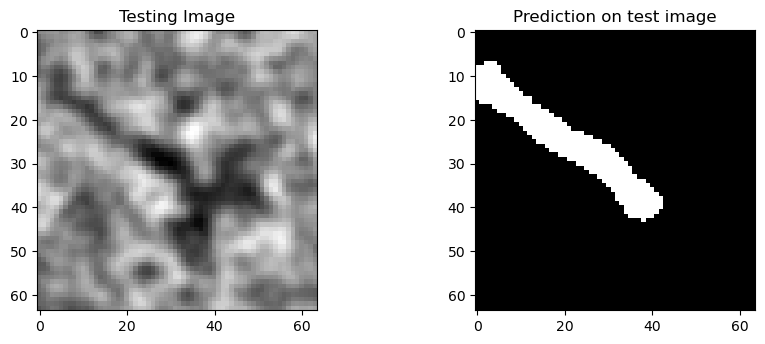

(1, 64, 64, 1)
1/1 [==============================] - 0s 12ms/step
(64, 64)


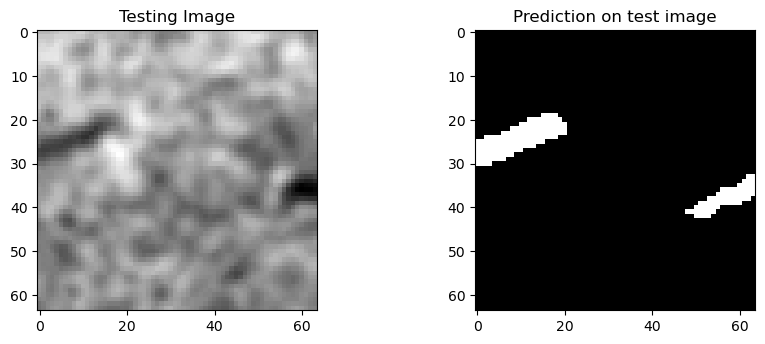

(1, 64, 64, 1)
1/1 [==============================] - 0s 12ms/step
(64, 64)


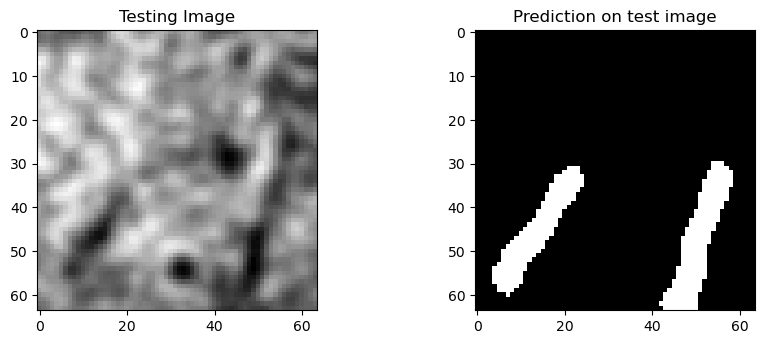

(1, 64, 64, 1)
1/1 [==============================] - 0s 12ms/step
(64, 64)


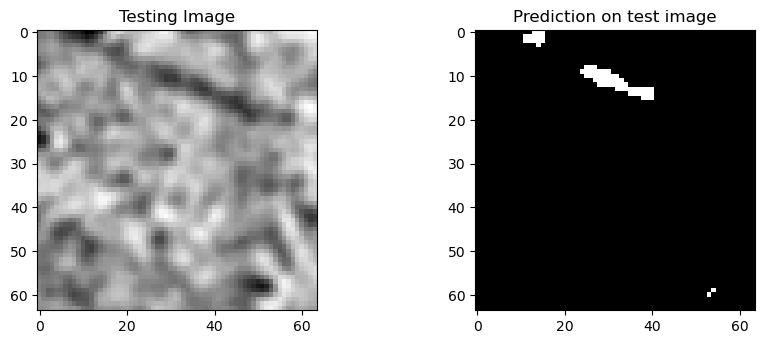

(1, 64, 64, 1)
1/1 [==============================] - 0s 11ms/step
(64, 64)


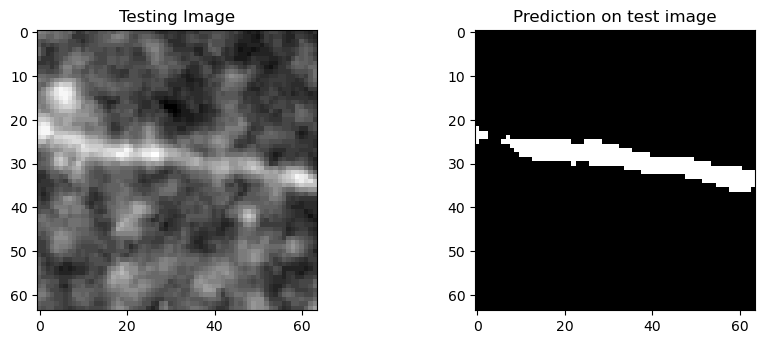

(1, 64, 64, 1)
1/1 [==============================] - 0s 11ms/step
(64, 64)


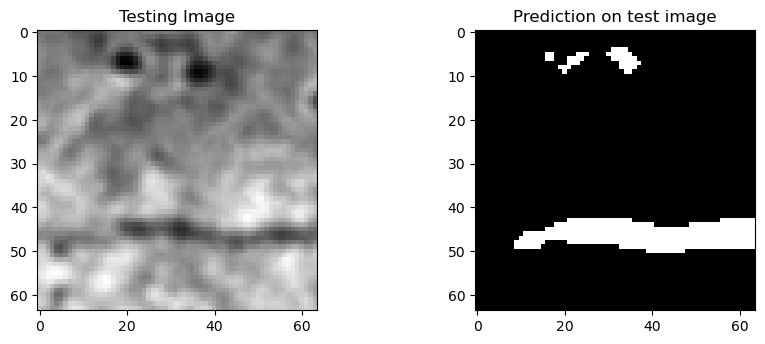

(1, 64, 64, 1)
1/1 [==============================] - 0s 11ms/step
(64, 64)


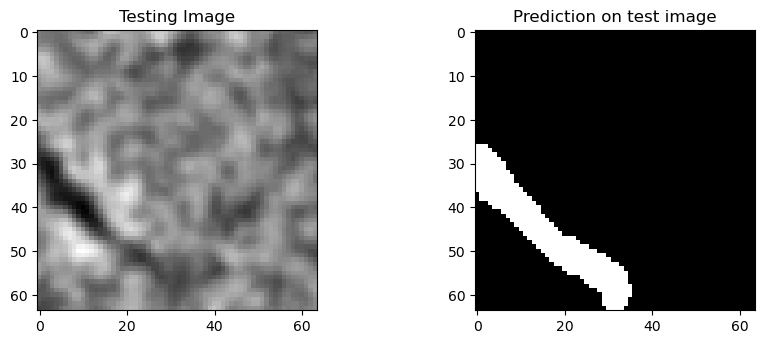

(1, 64, 64, 1)
1/1 [==============================] - 0s 11ms/step
(64, 64)


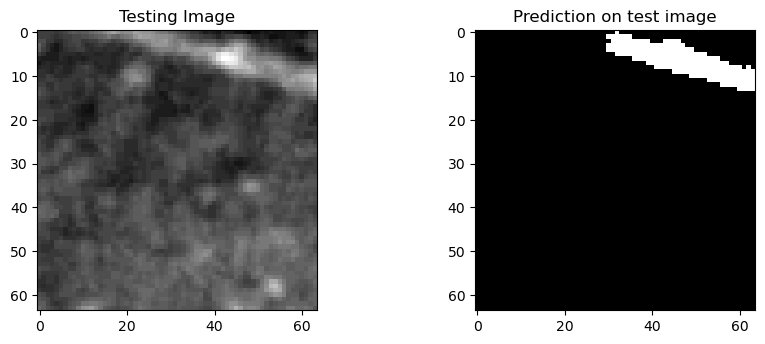

(1, 64, 64, 1)
1/1 [==============================] - 0s 11ms/step
(64, 64)


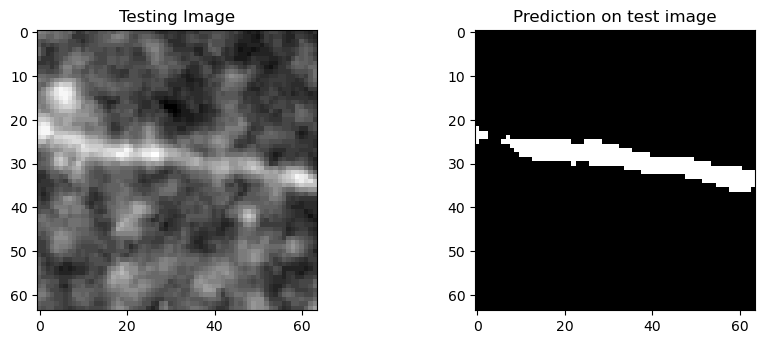

(1, 64, 64, 1)
1/1 [==============================] - 0s 10ms/step
(64, 64)


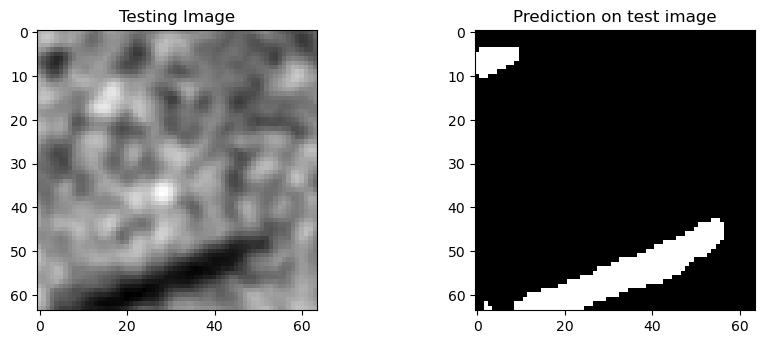

(1, 64, 64, 1)
1/1 [==============================] - 0s 11ms/step
(64, 64)


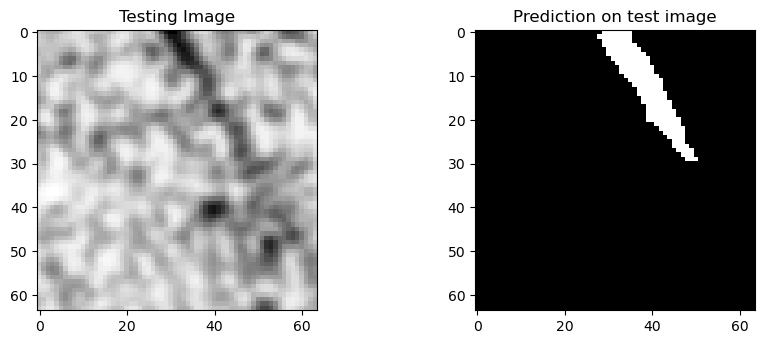

(1, 64, 64, 1)
1/1 [==============================] - 0s 11ms/step
(64, 64)


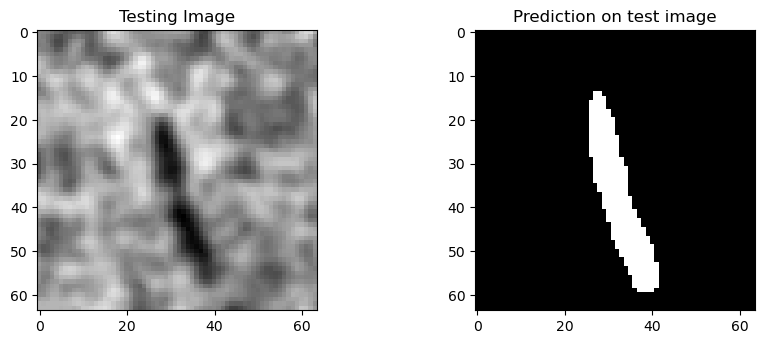

(1, 64, 64, 1)
1/1 [==============================] - 0s 11ms/step
(64, 64)


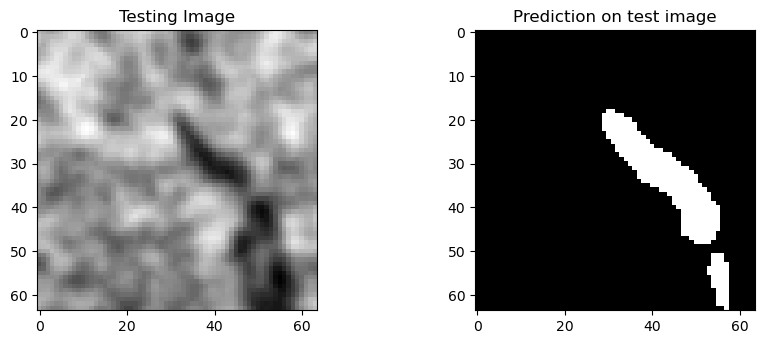

(1, 64, 64, 1)
1/1 [==============================] - 0s 10ms/step
(64, 64)


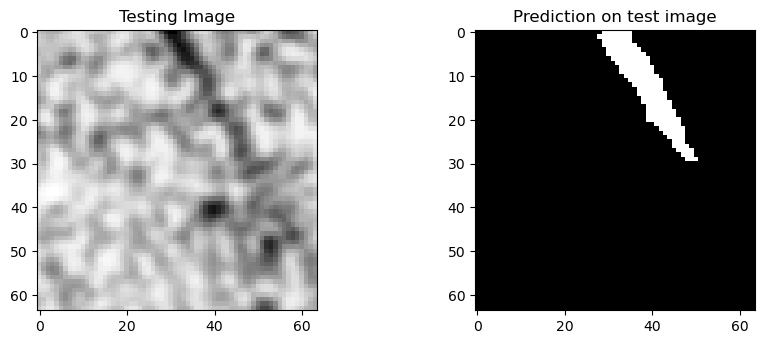

(1, 64, 64, 1)
1/1 [==============================] - 0s 10ms/step
(64, 64)


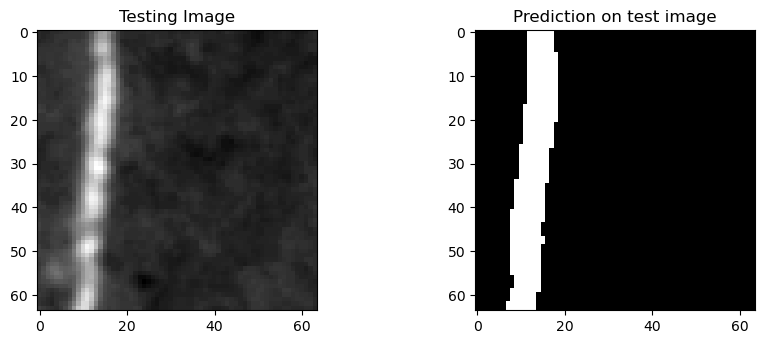

(1, 64, 64, 1)
1/1 [==============================] - 0s 11ms/step
(64, 64)


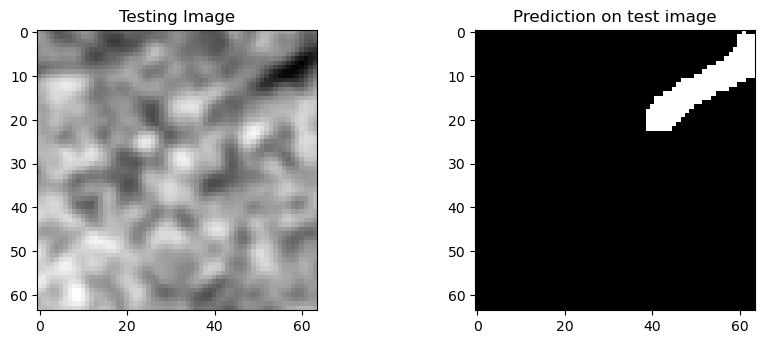

(1, 64, 64, 1)
1/1 [==============================] - 0s 11ms/step
(64, 64)


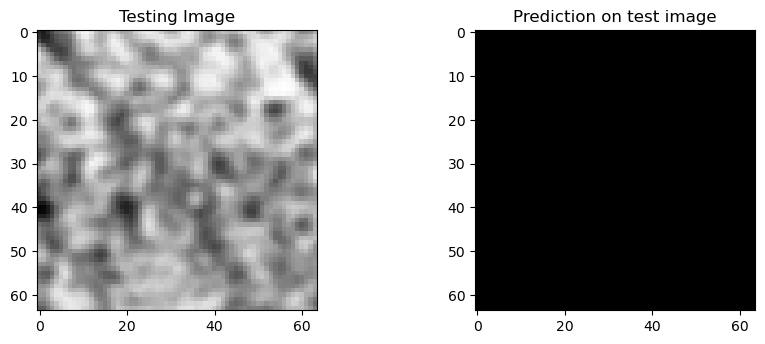

(1, 64, 64, 1)
1/1 [==============================] - 0s 10ms/step
(64, 64)


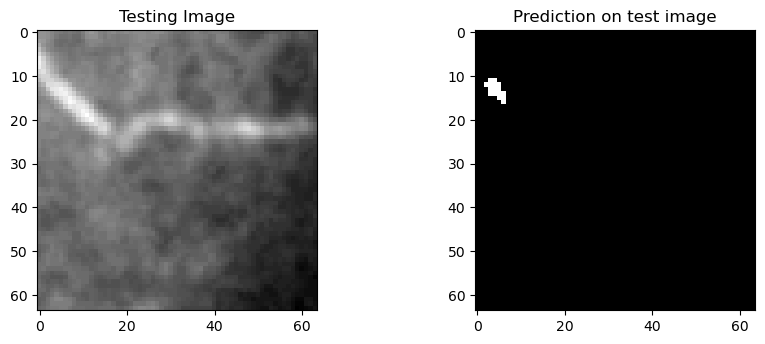

In [144]:
for test_img_number in test_img_list:
    
    img = tst_image_dataset[test_img_number]
    test_img_input=np.expand_dims(img, 0)
    print(test_img_input.shape)
    prediction = (model.predict(test_img_input)[0,:,:,0] > 0.9).astype(np.uint8)
    print(prediction.shape)

    plt.figure(figsize=(16, 8))
    plt.subplot(231)
    plt.title('Testing Image')
    plt.imshow(img[:,:,0], cmap='gray')
    plt.subplot(232)
    plt.title('Prediction on test image')
    plt.imshow(prediction, cmap='gray')

    plt.show()

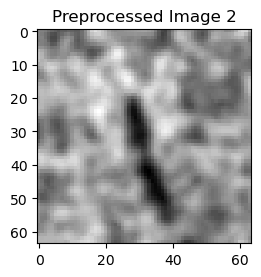

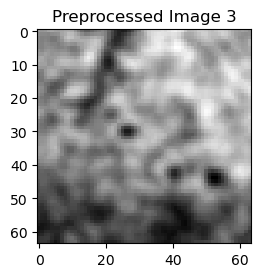

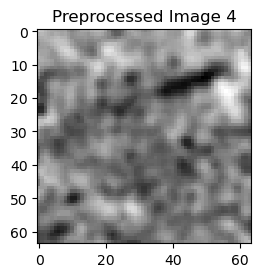

In [145]:
test_image_names = glob.glob(f"{test_directory2}/*.png")
test_image = image_preprocessing(test_image_names, 'png')
tst_image_dataset2 = np.array(test_image)
tst_image_dataset2 = np.expand_dims(tst_image_dataset2, axis=3)
tst_image_dataset2 = tst_image_dataset2/255.0
test_img_list = [random.randint(0, len(tst_image_dataset2)-1) for _ in range(10)]


(1, 64, 64, 1)
1/1 [==============================] - 0s 10ms/step
(64, 64)


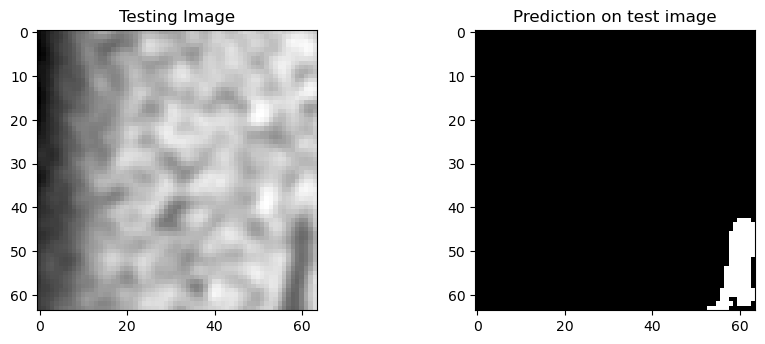

(1, 64, 64, 1)
1/1 [==============================] - 0s 10ms/step
(64, 64)


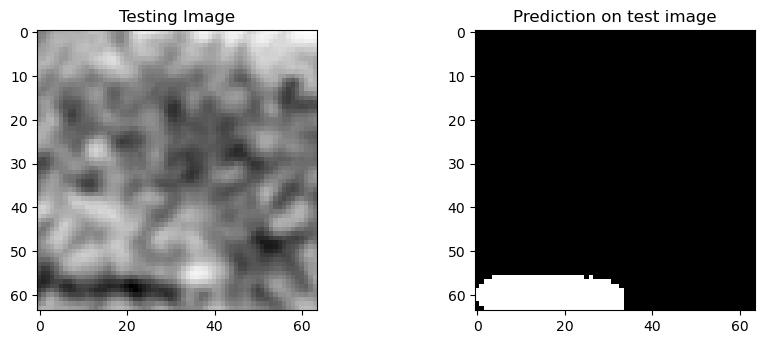

(1, 64, 64, 1)
1/1 [==============================] - 0s 10ms/step
(64, 64)


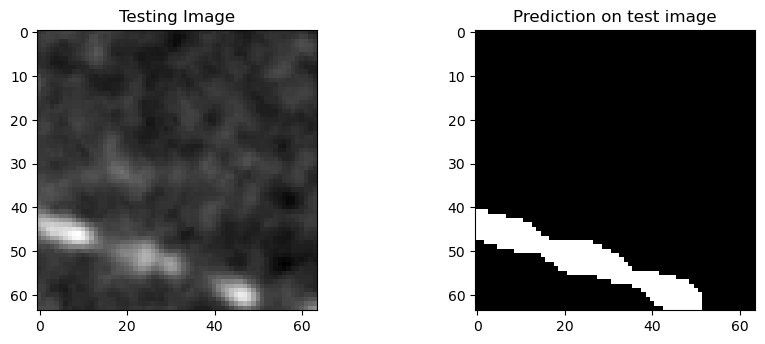

(1, 64, 64, 1)
1/1 [==============================] - 0s 10ms/step
(64, 64)


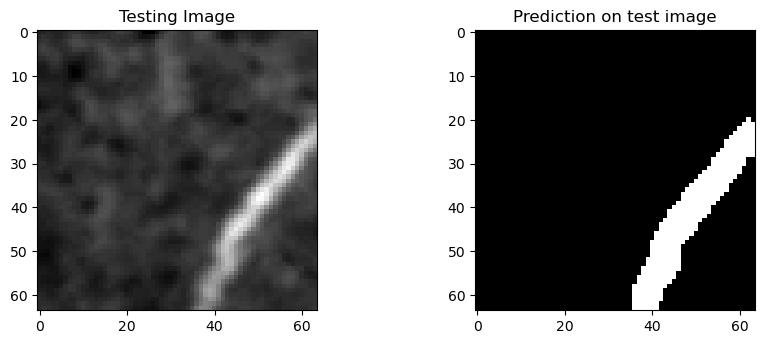

(1, 64, 64, 1)
1/1 [==============================] - 0s 10ms/step
(64, 64)


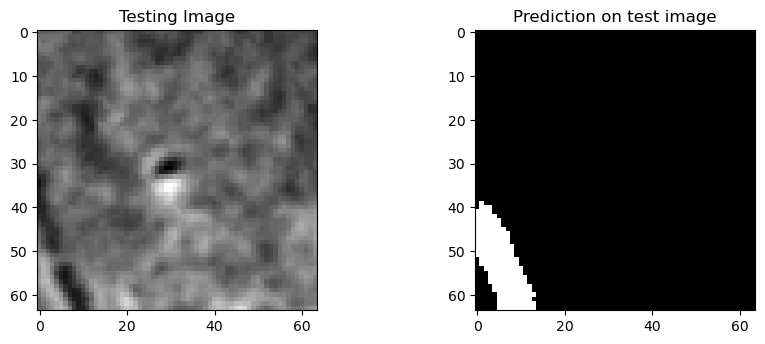

(1, 64, 64, 1)
1/1 [==============================] - 0s 10ms/step
(64, 64)


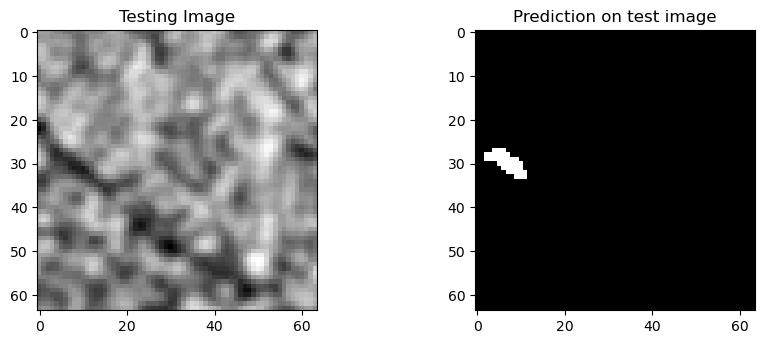

(1, 64, 64, 1)
1/1 [==============================] - 0s 10ms/step
(64, 64)


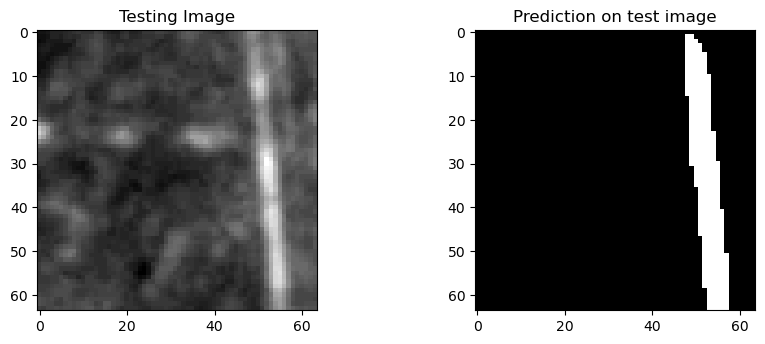

(1, 64, 64, 1)
1/1 [==============================] - 0s 12ms/step
(64, 64)


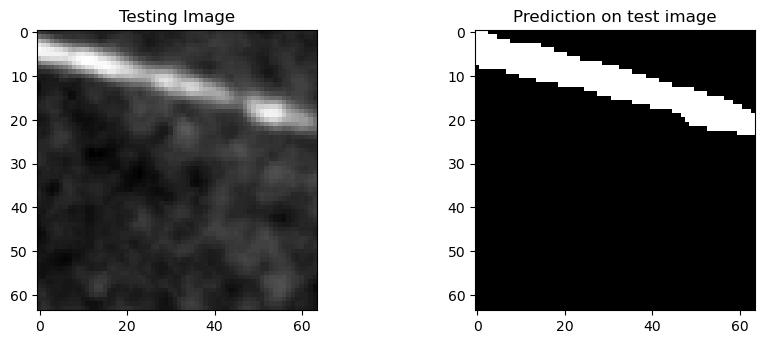

(1, 64, 64, 1)
1/1 [==============================] - 0s 11ms/step
(64, 64)


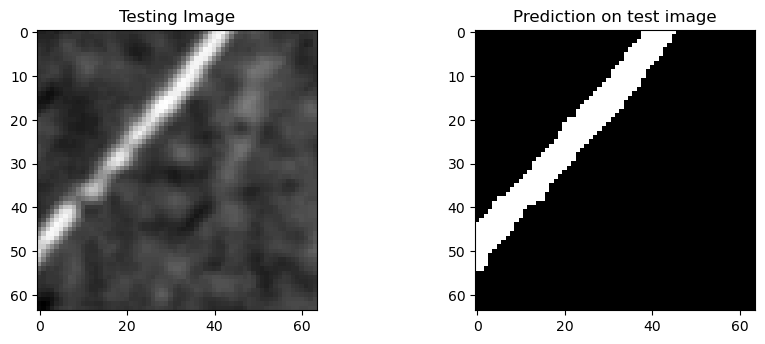

(1, 64, 64, 1)
1/1 [==============================] - 0s 11ms/step
(64, 64)


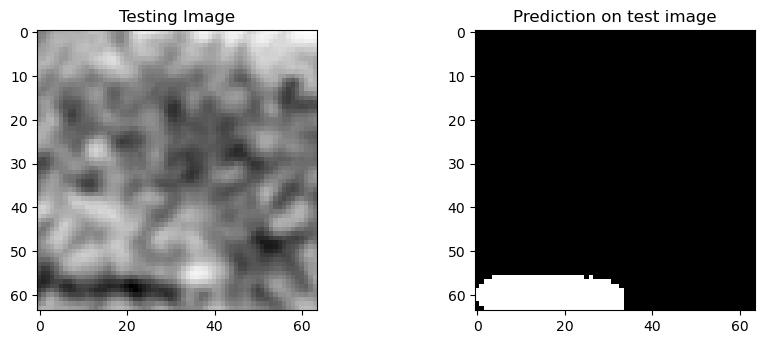

In [146]:
for test_img_number in test_img_list:
    img = image_dataset[test_img_number]
    test_img_input=np.expand_dims(img, 0)
    print(test_img_input.shape)
    prediction = (model.predict(test_img_input)[0,:,:,0] > 0.9).astype(np.uint8)
    print(prediction.shape)

    plt.figure(figsize=(16, 8))
    plt.subplot(231)
    plt.title('Testing Image')
    plt.imshow(img[:,:,0], cmap='gray')
    plt.subplot(232)
    plt.title('Prediction on test image')
    plt.imshow(prediction, cmap='gray')

    plt.show()

In [147]:
print(defect_image_names)

['./data/scratch_choosed/img/NR02-P394-01-bv1.png_img_patch_1536_3008.png', './data/scratch_choosed/img/NR02-P394-01-bv1.png_img_patch_1600_3008.png', './data/scratch_choosed/img/NR02-P394-01-bv1.png_img_patch_1664_3008.png', './data/scratch_choosed/img/NR02-P394-01-bv1.png_img_patch_1728_3008.png', './data/scratch_choosed/img/NR02-P394-01-bv1.png_img_patch_2240_2176.png', './data/scratch_choosed/img/NR02-P394-01-bv1.png_img_patch_2304_2176.png', './data/scratch_choosed/img/NR02-P394-03-bv1.png_img_patch_1344_2304.png', './data/scratch_choosed/img/NR02-P394-03-bv1.png_img_patch_2240_2240.png', './data/scratch_choosed/img/NR02-P394-04-bv1.png_img_patch_1984_2304.png', './data/scratch_choosed/img/NR02-P394-04-bv1.png_img_patch_2048_2368.png', './data/scratch_choosed/img/NR02-P394-04-bv1.png_img_patch_2048_3008.png', './data/scratch_choosed/img/NR02-P394-04-bv1.png_img_patch_2048_3072.png', './data/scratch_choosed/img/NR02-P394-04-bv1.png_img_patch_2112_3392.png', './data/scratch_choosed/

In [148]:
print(image_dataset.shape)
print(mask_dataset.shape)

(127, 64, 64, 1)
(127, 64, 64, 1)


In [149]:
# save the predict mask image and compare with the ground truth

def save_predict_mask_image(model, image_dataset, image_mask_dataset , defect_image_names,save_path, threshold=0.5):
    if not os.path.exists(save_path):
        os.makedirs(save_path)
    if not os.path.exists(f"{save_path}/img"):
        os.makedirs(f"{save_path}/img")
    if not os.path.exists(f"{save_path}/gt"):
        os.makedirs(f"{save_path}/gt")
    if not os.path.exists(f"{save_path}/pred"):
        os.makedirs(f"{save_path}/pred")
    if not os.path.exists(f"{save_path}/overlay"):
        os.makedirs(f"{save_path}/overlay")
    print(len(image_dataset))
    for i in range(len(image_dataset)):
        img = image_dataset[i]
        mask = image_mask_dataset[i]
        img_name = defect_image_names[i].split('/')[-1].split('.')[0]
        expand_img = np.expand_dims(img, 0)
        prediction = (model.predict(expand_img)[0,:,:,0] > threshold).astype(np.uint8)
        cv2.imwrite(f"{save_path}/img/img_{i}.png", img*255)
        cv2.imwrite(f"{save_path}/gt/ground_truth_mask_{i}.png", mask*255)
        cv2.imwrite(f"{save_path}/pred/predict_mask_{i}.png", prediction*255)
        img_pred = overlay_mask_on_image(img.squeeze(), prediction.squeeze())
        img_gt = overlay_mask_on_image(img.squeeze(), mask.squeeze())
        plt.figure(figsize=(16, 8))
        plt.subplot(2,2,1)
        plt.title('img_on_predict_mask')
        plt.imshow(img_pred)
        plt.subplot(2,2,2)
        plt.title('img_on_ground_truth')
        plt.imshow(img_gt)
        plt.savefig(f"{save_path}/overlay/{img_name}_{i}.png")
        plt.close()
# cover the mask on the original image
def overlay_mask_on_image(image, mask, alpha=0.8):
    image_255 = (image * 255).astype(np.uint8)
    mask_255 = (mask * 255).astype(np.uint8)

    # Convert to BGR for color representation
    image_bgr = cv2.cvtColor(image_255, cv2.COLOR_GRAY2BGR)
    mask_bgr = cv2.cvtColor(mask_255, cv2.COLOR_GRAY2BGR)
    return cv2.addWeighted(image_bgr, alpha, mask_bgr, 1-alpha, 0)
    
    

In [150]:
output_path = './result/scratch'
save_predict_mask_image(model, image_dataset, mask_dataset, defect_image_names, output_path, threshold=0.5)

127
1/1 [==============================] - 0s 10ms/step
